# Analyzing my Amazon Halo Workout Data

I try to consolidate the number of times I have to import packages. Everything I need should be in the first code block.

In [265]:
import pandas as pd
import numpy as np
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings 
warnings.filterwarnings('ignore')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
from scipy import stats
sns.set()

rs = 123

I need to read my halo workout data in as a pandas dataframe

In [266]:
amazon_data = pd.read_csv(r'C:\Users\coleb\OneDrive\Corel\Datasets\Amazon Health Data\Activity\Activity_Workouts_1970-01-01--2022-04-24_a4815fda-80a6-4513-bfe3-638c2c6acf13.csv')

In [267]:
amazon_data.head(5)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),Average Heart Rate (bpm),Steps,Calories,Software Version,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,242484.0,145.0,134.0,4585.0,470.0,1.0.107826,ios,15.4,1886214.0,1886214.0,Not Applicable
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,221491.0,144.0,130.0,4626.0,455.0,1.0.107826,ios,15.4,1914907.0,1914907.0,Not Applicable
2,2022-04-21T12:59:00.000Z,2022-04-21T13:27:00.000Z,WORKOUT,OTHER,Automatic,-5.0,23.2,No Data,1380000.0,115.0,98.0,1124.0,176.0,1.0.107826,ios,15.4,1680000.0,1680000.0,Not Applicable
3,2022-04-21T12:23:29.044Z,2022-04-21T12:58:35.262Z,WORKOUT,RUNNING,Automatic,-5.0,63.713496666666664,1860000.0,95262.0,173.0,150.0,4952.0,616.0,1.0.107826,ios,15.4,2106218.0,2106218.0,Not Applicable
4,2022-04-19T13:13:00.000Z,2022-04-19T13:46:00.000Z,WORKOUT,OTHER,Automatic,-5.0,12.85,No Data,720000.0,120.0,93.0,1510.0,177.0,1.0.107826,ios,15.4,1980000.0,1980000.0,Not Applicable


In [268]:
#create a workable copy of the dataset
df = amazon_data

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Start Time                231 non-null    object 
 1   End Time                  231 non-null    object 
 2   Session Type              231 non-null    object 
 3   Session Subtype           231 non-null    object 
 4   Creation Method           231 non-null    object 
 5   Local Time Zone Offset    231 non-null    float64
 6   Activity Score            231 non-null    object 
 7   Intense Duration (ms)     231 non-null    object 
 8   Moderate Duration (ms)    231 non-null    object 
 9   Max Heart Rate (bpm)      231 non-null    float64
 10  Average Heart Rate (bpm)  231 non-null    float64
 11  Steps                     231 non-null    float64
 12  Calories                  231 non-null    float64
 13  Software Version          231 non-null    object 
 14  Software O

<AxesSubplot:xlabel='Start Time'>

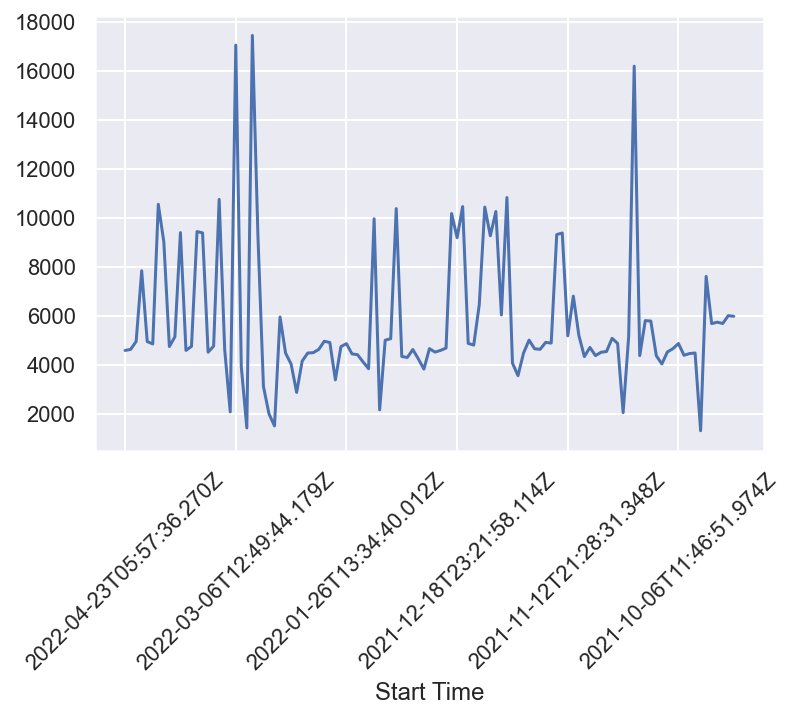

In [270]:
# show data with a mask filter (running only)
#I want to plot the old time to check my work later
mask1 = df['Session Subtype'] == 'RUNNING'
(
    df[mask1]
    .set_index('Start Time')
    ['Steps']
    .plot(rot = 45)
)

In [271]:
df.head(4)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),Average Heart Rate (bpm),Steps,Calories,Software Version,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,242484.0,145.0,134.0,4585.0,470.0,1.0.107826,ios,15.4,1886214.0,1886214.0,Not Applicable
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,221491.0,144.0,130.0,4626.0,455.0,1.0.107826,ios,15.4,1914907.0,1914907.0,Not Applicable
2,2022-04-21T12:59:00.000Z,2022-04-21T13:27:00.000Z,WORKOUT,OTHER,Automatic,-5.0,23.2,No Data,1380000.0,115.0,98.0,1124.0,176.0,1.0.107826,ios,15.4,1680000.0,1680000.0,Not Applicable
3,2022-04-21T12:23:29.044Z,2022-04-21T12:58:35.262Z,WORKOUT,RUNNING,Automatic,-5.0,63.713496666666664,1860000.0,95262.0,173.0,150.0,4952.0,616.0,1.0.107826,ios,15.4,2106218.0,2106218.0,Not Applicable


## Converting Time

In [272]:
#I will use the datetime and pytz packages to convert my time/dates
from datetime import datetime
from pytz import timezone
import pytz
central = timezone('US/Central')
time_stamp = '2022-04-23T05:57:36.270Z'
published_time = datetime.strptime(time_stamp, '%Y-%m-%dT%H:%M:%S.%f%z')
published_cst = published_time.astimezone(central)
actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

print(time_stamp)
print(published_time)
print(published_cst)
print(actual_time_published)

2022-04-23T05:57:36.270Z
2022-04-23 05:57:36.270000+00:00
2022-04-23 00:57:36.270000-05:00
Sat, Apr 23 2022 at 12:57:36 AM CDT


In [273]:
list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z'), df['Start Time']))
pd.to_datetime(df['Start Time'], format='%Y-%m-%dT%H:%M:%S.%f%z')


def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert,
                                       '%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

df['Start Time DTG'] = df['Start Time'].apply(date_convert)
df['End Time DTG'] = df['End Time'].apply(date_convert)
df.head(2)

,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),Moderate Duration (ms),Max Heart Rate (bpm),...,Steps,Calories,Software Version,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause,Start Time DTG,End Time DTG
0,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,242484.0,145.0,...,4585.0,470.0,1.0.107826,ios,15.4,1886214.0,1886214.0,Not Applicable,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC"
1,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,221491.0,144.0,...,4626.0,455.0,1.0.107826,ios,15.4,1914907.0,1914907.0,Not Applicable,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC"


In [274]:
# df['Local Start Time DTG'] = df['Local Start Time'].dt.tz_localize('CET').dt.tz_convert('US/Central')


In [275]:
df.set_index(pd.DatetimeIndex(df['Start Time DTG']).tz_convert('US/Central'), inplace = True, drop = True)
df.index.names = ['Local Start Time DTG']
df = df.reset_index()
df.set_index(pd.DatetimeIndex(df['End Time DTG']).tz_convert('US/Central'), inplace = True, drop = True)
df.index.names = ['Local End Time DTG']
df = df.reset_index()

In [276]:
df.head(2)

,Local End Time DTG,Local Start Time DTG,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),...,Steps,Calories,Software Version,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause,Start Time DTG,End Time DTG
0,2022-04-23 01:29:02-05:00,2022-04-23 00:57:36-05:00,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,...,4585.0,470.0,1.0.107826,ios,15.4,1886214.0,1886214.0,Not Applicable,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC"
1,2022-04-21 23:57:41-05:00,2022-04-21 23:25:46-05:00,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,...,4626.0,455.0,1.0.107826,ios,15.4,1914907.0,1914907.0,Not Applicable,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC"


In [277]:
list(map(lambda x: datetime.strptime(x,'%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z'), df['End Time']))
pd.to_datetime(df['End Time'], format='%Y-%m-%dT%H:%M:%S.%f%z')


def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert,
                                       '%Y-%m-%dT%H:%M:%S.%f%z').strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

In [278]:
df.head(3)

,Local End Time DTG,Local Start Time DTG,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),...,Steps,Calories,Software Version,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause,Start Time DTG,End Time DTG
0,2022-04-23 01:29:02-05:00,2022-04-23 00:57:36-05:00,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,...,4585.0,470.0,1.0.107826,ios,15.4,1886214.0,1886214.0,Not Applicable,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC"
1,2022-04-21 23:57:41-05:00,2022-04-21 23:25:46-05:00,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74151666666666,1620000.0,...,4626.0,455.0,1.0.107826,ios,15.4,1914907.0,1914907.0,Not Applicable,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC"
2,2022-04-21 08:27:00-05:00,2022-04-21 07:59:00-05:00,2022-04-21T12:59:00.000Z,2022-04-21T13:27:00.000Z,WORKOUT,OTHER,Automatic,-5.0,23.2,No Data,...,1124.0,176.0,1.0.107826,ios,15.4,1680000.0,1680000.0,Not Applicable,"Thu, Apr 21 2022 at 12:59:00 PM UTC","Thu, Apr 21 2022 at 01:27:00 PM UTC"


In [279]:
# #create a for loop with the updated timezone instructions. This will add a new column.\n",
# central = timezone('US/Central')
# time_stamp = '2022-04-23T05:57:36.270Z'
# published_time = datetime.strptime(df['Start Time'], '%Y-%m-%dT%H:%M:%S.%f%z')
# published_cst = published_time.astimezone(central)
# actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')
# df['Local Start Time'] = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')
    
# for item in df['End Time']:
#     central = timezone('US/Central'),
#     time_stamp = '2022-04-23T05:57:36.270Z',
#     published_time = datetime.strptime(time_stamp, '%Y-%m-%dT%H:%M:%S.%f%z'),
#     published_cst = published_time.astimezone(central),
#     actual_time_published = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z'),
#     df['Local End Time'] = published_cst.strftime('%a, %b %d %Y at %I:%M:%S %p %Z')

In [280]:
# import pytz
# df['Local_Time'] = df.apply(lambda x: pytz.timezone("US/Central" if df['Time_Zone'] == 'CST' else x['Time_Zone']).normalize(x['CREATED_DT']), axis = 1)

In [281]:
#I want to pull just the day out of the start/end times
#df['Local Start Time DTG Only'] = pd.to_datetime(df['Local Start Time DTG'])
df['day_of_week_start']=df['Local Start Time DTG'].dt.day_name()
#df['Local End Time DTG Only'] = pd.to_datetime(df['Local End Time DTG'])
df['day_of_week_end']=df['Local End Time DTG'].dt.day_name()

In [282]:
#I plan on joining this with my Map My Run Data to get the mileage, so I will pull just the date
df['Workout_Date'] = df['Local Start Time DTG'].dt.date

In [283]:
df.head(1)

,Local End Time DTG,Local Start Time DTG,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),...,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause,Start Time DTG,End Time DTG,day_of_week_start,day_of_week_end,Workout_Date
0,2022-04-23 01:29:02-05:00,2022-04-23 00:57:36-05:00,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.061175000000006,1620000.0,...,ios,15.4,1886214.0,1886214.0,Not Applicable,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",Saturday,Saturday,2022-04-23


In [284]:
# df.info()

In [285]:
#some of my numbers are string objects so I need to convert them to floats
df['Activity Score'] = pd.to_numeric(df['Activity Score'],errors='coerce')
df['Intense Duration (ms)'] = pd.to_numeric(df['Intense Duration (ms)'],errors='coerce')
df['Moderate Duration (ms)'] = pd.to_numeric(df['Moderate Duration (ms)'],errors='coerce')

In [286]:
#I want the entire dataframe to be rounded to 2 places
df = df.round(2)

In [287]:
#check my work
df.head(2)

,Local End Time DTG,Local Start Time DTG,Start Time,End Time,Session Type,Session Subtype,Creation Method,Local Time Zone Offset,Activity Score,Intense Duration (ms),...,Software OS,Software OS Version,Active Time (ms),Total Duration (ms),Activity Pause,Start Time DTG,End Time DTG,day_of_week_start,day_of_week_end,Workout_Date
0,2022-04-23 01:29:02-05:00,2022-04-23 00:57:36-05:00,2022-04-23T05:57:36.270Z,2022-04-23T06:29:02.484Z,WORKOUT,RUNNING,Automatic,-5.0,58.06,1620000.0,...,ios,15.4,1886214.0,1886214.0,Not Applicable,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",Saturday,Saturday,2022-04-23
1,2022-04-21 23:57:41-05:00,2022-04-21 23:25:46-05:00,2022-04-22T04:25:46.584Z,2022-04-22T04:57:41.491Z,WORKOUT,RUNNING,Automatic,-5.0,57.74,1620000.0,...,ios,15.4,1914907.0,1914907.0,Not Applicable,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC",Thursday,Thursday,2022-04-21


In [288]:
df.columns

Index(['Local End Time DTG', 'Local Start Time DTG', 'Start Time', 'End Time',
       'Session Type', 'Session Subtype', 'Creation Method',
       'Local Time Zone Offset', 'Activity Score', 'Intense Duration (ms)',
       'Moderate Duration (ms)', 'Max Heart Rate (bpm)',
       'Average Heart Rate (bpm)', 'Steps', 'Calories', 'Software Version',
       'Software OS', 'Software OS Version', 'Active Time (ms)',
       'Total Duration (ms)', 'Activity Pause', 'Start Time DTG',
       'End Time DTG', 'day_of_week_start', 'day_of_week_end', 'Workout_Date'],
      dtype='object')

In [289]:
#I want to add month categories
import datetime
import calendar
df['Workout_Month'] = df['Local Start Time DTG'].dt.month
df['Workout_Month'] = df['Local Start Time DTG'].dt.month
df['Workout_Month_Name'] = df['Workout_Month'].apply(lambda x: calendar.month_name[x])


In [290]:
df.head(1)
df.columns

Index(['Local End Time DTG', 'Local Start Time DTG', 'Start Time', 'End Time',
       'Session Type', 'Session Subtype', 'Creation Method',
       'Local Time Zone Offset', 'Activity Score', 'Intense Duration (ms)',
       'Moderate Duration (ms)', 'Max Heart Rate (bpm)',
       'Average Heart Rate (bpm)', 'Steps', 'Calories', 'Software Version',
       'Software OS', 'Software OS Version', 'Active Time (ms)',
       'Total Duration (ms)', 'Activity Pause', 'Start Time DTG',
       'End Time DTG', 'day_of_week_start', 'day_of_week_end', 'Workout_Date',
       'Workout_Month', 'Workout_Month_Name'],
      dtype='object')

In [291]:
#I want to re-arrange my columns so I can focus on the important items.
df = df[['Workout_Date', 'Session Subtype', 'Activity Score', 'Intense Duration (ms)',
         'Moderate Duration (ms)','Active Time (ms)', 'Average Heart Rate (bpm)',
         'Max Heart Rate (bpm)','Steps', 'Calories',
         'Total Duration (ms)', 'Start Time DTG',
       'End Time DTG', 'day_of_week_start',
       'Workout_Month', 'Workout_Month_Name']]

In [292]:
#double check that I have all my columns still
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              231 non-null    object 
 1   Session Subtype           231 non-null    object 
 2   Activity Score            230 non-null    float64
 3   Intense Duration (ms)     124 non-null    float64
 4   Moderate Duration (ms)    206 non-null    float64
 5   Active Time (ms)          231 non-null    float64
 6   Average Heart Rate (bpm)  231 non-null    float64
 7   Max Heart Rate (bpm)      231 non-null    float64
 8   Steps                     231 non-null    float64
 9   Calories                  231 non-null    float64
 10  Total Duration (ms)       231 non-null    float64
 11  Start Time DTG            231 non-null    object 
 12  End Time DTG              231 non-null    object 
 13  day_of_week_start         231 non-null    object 
 14  Workout_Mo

## MS to Minutes and Seconds

In [293]:
df.head(2)

,Workout_Date,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),Start Time DTG,End Time DTG,day_of_week_start,Workout_Month,Workout_Month_Name
0,2022-04-23,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,470.0,1886214.0,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",Saturday,4,April
1,2022-04-21,RUNNING,57.74,1620000.0,221491.0,1914907.0,130.0,144.0,4626.0,455.0,1914907.0,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC",Thursday,4,April


In [294]:
#seconds = (milliseconds / 1000) % 60 ;
#minutes = ((milliseconds / (1000*60)) % 60);
#hours   = ((milliseconds / (1000*60*60)) % 24);
df['Active Time (sec)'] = (df['Active Time (ms)'] / 1000) % 60
df['Active Time (min)'] = (df['Active Time (ms)'] / (1000*60)) % 60
df['Active Time (hour)'] = (df['Active Time (ms)'] / (1000*60*60) % 24)
df['Active Time (total min)'] = (df['Active Time (ms)'] / (1000*60))    

In [295]:
df = df.round(2)
df.info()
df.head(18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              231 non-null    object 
 1   Session Subtype           231 non-null    object 
 2   Activity Score            230 non-null    float64
 3   Intense Duration (ms)     124 non-null    float64
 4   Moderate Duration (ms)    206 non-null    float64
 5   Active Time (ms)          231 non-null    float64
 6   Average Heart Rate (bpm)  231 non-null    float64
 7   Max Heart Rate (bpm)      231 non-null    float64
 8   Steps                     231 non-null    float64
 9   Calories                  231 non-null    float64
 10  Total Duration (ms)       231 non-null    float64
 11  Start Time DTG            231 non-null    object 
 12  End Time DTG              231 non-null    object 
 13  day_of_week_start         231 non-null    object 
 14  Workout_Mo

,Workout_Date,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),Start Time DTG,End Time DTG,day_of_week_start,Workout_Month,Workout_Month_Name,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min)
0,2022-04-23,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,470.0,1886214.0,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",Saturday,4,April,26.21,31.44,0.52,31.44
1,2022-04-21,RUNNING,57.74,1620000.0,221491.0,1914907.0,130.0,144.0,4626.0,455.0,1914907.0,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC",Thursday,4,April,54.91,31.92,0.53,31.92
2,2022-04-21,OTHER,23.20,NaN,1380000.0,1680000.0,98.0,115.0,1124.0,176.0,1680000.0,"Thu, Apr 21 2022 at 12:59:00 PM UTC","Thu, Apr 21 2022 at 01:27:00 PM UTC",Thursday,4,April,0.00,28.00,0.47,28.00
3,2022-04-21,RUNNING,63.71,1860000.0,95262.0,2106218.0,150.0,173.0,4952.0,616.0,2106218.0,"Thu, Apr 21 2022 at 12:23:29 PM UTC","Thu, Apr 21 2022 at 12:58:35 PM UTC",Thursday,4,April,6.22,35.10,0.59,35.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,2022-04-02,WALKING,3.08,NaN,60000.0,2960136.0,77.0,101.0,3131.0,283.0,2960136.0,"Sun, Apr 03 2022 at 01:06:29 AM UTC","Sun, Apr 03 2022 at 01:55:50 AM UTC",Saturday,4,April,20.14,49.34,0.82,49.34
15,2022-04-02,WALKING,1.27,NaN,NaN,1739493.0,65.0,96.0,2315.0,122.0,1739493.0,"Sun, Apr 03 2022 at 12:25:30 AM UTC","Sun, Apr 03 2022 at 12:54:29 AM UTC",Saturday,4,April,59.49,28.99,0.48,28.99
16,2022-04-02,WALKING,0.53,NaN,NaN,694057.0,72.0,87.0,723.0,47.0,694057.0,"Sat, Apr 02 2022 at 10:52:51 PM UTC","Sat, Apr 02 2022 at 11:04:25 PM UTC",Saturday,4,April,34.06,11.57,0.19,11.57
17,2022-04-02,RUNNING,113.87,3240000.0,347738.0,3674029.0,138.0,148.0,9022.0,968.0,3674029.0,"Sat, Apr 02 2022 at 07:19:33 AM UTC","Sat, Apr 02 2022 at 08:20:47 AM UTC",Saturday,4,April,14.03,1.23,1.02,61.23


In [296]:
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              231 non-null    object 
 1   Session Subtype           231 non-null    object 
 2   Activity Score            230 non-null    float64
 3   Intense Duration (ms)     124 non-null    float64
 4   Moderate Duration (ms)    206 non-null    float64
 5   Active Time (ms)          231 non-null    float64
 6   Average Heart Rate (bpm)  231 non-null    float64
 7   Max Heart Rate (bpm)      231 non-null    float64
 8   Steps                     231 non-null    float64
 9   Calories                  231 non-null    float64
 10  Total Duration (ms)       231 non-null    float64
 11  Start Time DTG            231 non-null    object 
 12  End Time DTG              231 non-null    object 
 13  day_of_week_start         231 non-null    object 
 14  Workout_Mo

,Workout_Date,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),Start Time DTG,End Time DTG,day_of_week_start,Workout_Month,Workout_Month_Name,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min)
0,2022-04-23,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,470.0,1886214.0,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",Saturday,4,April,26.21,31.44,0.52,31.44


In [297]:
df['Miles'] = df['Steps'] / 1475
df.head(10)

,Workout_Date,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,...,Start Time DTG,End Time DTG,day_of_week_start,Workout_Month,Workout_Month_Name,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Miles
0,2022-04-23,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,470.0,...,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",Saturday,4,April,26.21,31.44,0.52,31.44,3.108475
1,2022-04-21,RUNNING,57.74,1620000.0,221491.0,1914907.0,130.0,144.0,4626.0,455.0,...,"Fri, Apr 22 2022 at 04:25:46 AM UTC","Fri, Apr 22 2022 at 04:57:41 AM UTC",Thursday,4,April,54.91,31.92,0.53,31.92,3.136271
2,2022-04-21,OTHER,23.20,NaN,1380000.0,1680000.0,98.0,115.0,1124.0,176.0,...,"Thu, Apr 21 2022 at 12:59:00 PM UTC","Thu, Apr 21 2022 at 01:27:00 PM UTC",Thursday,4,April,0.00,28.00,0.47,28.00,0.762034
3,2022-04-21,RUNNING,63.71,1860000.0,95262.0,2106218.0,150.0,173.0,4952.0,616.0,...,"Thu, Apr 21 2022 at 12:23:29 PM UTC","Thu, Apr 21 2022 at 12:58:35 PM UTC",Thursday,4,April,6.22,35.10,0.59,35.10,3.357288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,2022-04-18,OTHER,16.85,NaN,960000.0,1980000.0,96.0,117.0,1501.0,178.0,...,"Mon, Apr 18 2022 at 12:44:00 PM UTC","Mon, Apr 18 2022 at 01:17:00 PM UTC",Monday,4,April,0.00,33.00,0.55,33.00,1.017627
7,2022-04-18,RUNNING,62.48,1740000.0,266749.0,2049381.0,147.0,168.0,4948.0,583.0,...,"Mon, Apr 18 2022 at 12:09:17 PM UTC","Mon, Apr 18 2022 at 12:43:26 PM UTC",Monday,4,April,9.38,34.16,0.57,34.16,3.354576
8,2022-04-17,RUNNING,62.63,1740000.0,276214.0,2049326.0,131.0,148.0,4850.0,497.0,...,"Sun, Apr 17 2022 at 05:12:26 PM UTC","Sun, Apr 17 2022 at 05:46:36 PM UTC",Sunday,4,April,9.33,34.16,0.57,34.16,3.288136
9,2022-04-03,WALKING,14.64,NaN,720000.0,4551142.0,96.0,117.0,6242.0,647.0,...,"Sun, Apr 03 2022 at 10:34:10 PM UTC","Sun, Apr 03 2022 at 11:50:01 PM UTC",Sunday,4,April,51.14,15.85,1.26,75.85,4.231864


In [298]:
df.corr()

,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),Workout_Month,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Miles
Activity Score,1.000000,0.981333,-0.275005,0.805751,0.787979,0.738204,0.959170,0.969623,0.805751,-0.035435,0.308616,0.168599,0.805663,0.805747,0.959170
Intense Duration (ms),0.981333,1.000000,-0.356315,0.837865,0.555479,0.349183,0.940914,0.939028,0.837865,0.022495,0.195852,-0.088730,0.838025,0.837867,0.940914
Moderate Duration (ms),-0.275005,-0.356315,1.000000,0.054481,-0.415648,-0.334911,-0.289482,-0.251747,0.054481,0.075238,-0.237237,0.173303,0.054718,0.054474,-0.289482
Active Time (ms),0.805751,0.837865,0.054481,1.000000,0.431900,0.445221,0.863094,0.861043,1.000000,-0.011759,0.215093,0.293307,0.999960,1.000000,0.863094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active Time (min),0.168599,-0.088730,0.173303,0.293307,0.217563,0.233154,0.150010,0.150632,0.293307,0.020351,0.099174,1.000000,0.293675,0.293321,0.150010
Active Time (hour),0.805663,0.838025,0.054718,0.999960,0.431588,0.444805,0.863025,0.860893,0.999960,-0.011470,0.214997,0.293675,1.000000,0.999960,0.863025
Active Time (total min),0.805747,0.837867,0.054474,1.000000,0.431899,0.445220,0.863094,0.861040,1.000000,-0.011753,0.215103,0.293321,0.999960,1.000000,0.863094
Miles,0.959170,0.940914,-0.289482,0.863094,0.697040,0.664534,1.000000,0.973370,0.863094,-0.039018,0.390287,0.150010,0.863025,0.863094,1.000000


In [299]:
df = df.round(2)
df.describe()

,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,Total Duration (ms),Workout_Month,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Miles
count,230.000000,1.240000e+02,2.060000e+02,2.310000e+02,231.000000,231.000000,231.000000,231.000000,2.310000e+02,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,42.154217,1.928212e+06,4.814467e+05,1.928772e+06,118.662338,139.922078,3547.329004,380.376623,1.928772e+06,6.982684,24.096580,25.912814,0.535714,32.146580,2.404978
std,40.515312,1.188440e+06,5.157405e+05,1.061292e+06,28.343212,26.728311,3056.088460,336.396856,1.061292e+06,4.316767,20.861014,12.306976,0.294788,17.688003,2.071682
min,0.440000,6.000000e+04,4.389000e+03,6.053420e+05,65.000000,83.000000,4.000000,36.000000,6.053420e+05,1.000000,0.000000,0.810000,0.170000,10.090000,0.000000
25%,10.435000,1.545327e+06,1.200000e+05,1.215350e+06,93.000000,115.000000,1066.000000,117.000000,1.215350e+06,3.000000,1.870000,14.185000,0.340000,20.255000,0.725000
50%,30.305000,1.740000e+06,2.815970e+05,1.805459e+06,114.000000,144.000000,2992.000000,309.000000,1.805459e+06,9.000000,22.000000,27.900000,0.500000,30.090000,2.030000
75%,60.327500,2.055000e+06,6.490202e+05,2.242978e+06,146.500000,165.000000,4828.000000,506.500000,2.242978e+06,11.000000,43.630000,33.695000,0.625000,37.385000,3.275000
max,229.120000,6.840000e+06,3.600000e+06,6.949232e+06,165.000000,183.000000,17452.000000,2060.000000,6.949232e+06,12.000000,59.880000,58.770000,1.930000,115.820000,11.830000


array([[<AxesSubplot:title={'center':'Activity Score'}>,
        <AxesSubplot:title={'center':'Intense Duration (ms)'}>,
        <AxesSubplot:title={'center':'Moderate Duration (ms)'}>,
        <AxesSubplot:title={'center':'Active Time (ms)'}>],
       [<AxesSubplot:title={'center':'Average Heart Rate (bpm)'}>,
        <AxesSubplot:title={'center':'Max Heart Rate (bpm)'}>,
        <AxesSubplot:title={'center':'Steps'}>,
        <AxesSubplot:title={'center':'Calories'}>],
       [<AxesSubplot:title={'center':'Total Duration (ms)'}>,
        <AxesSubplot:title={'center':'Workout_Month'}>,
        <AxesSubplot:title={'center':'Active Time (sec)'}>,
        <AxesSubplot:title={'center':'Active Time (min)'}>],
       [<AxesSubplot:title={'center':'Active Time (hour)'}>,
        <AxesSubplot:title={'center':'Active Time (total min)'}>,
        <AxesSubplot:title={'center':'Miles'}>, <AxesSubplot:>]],
      dtype=object)

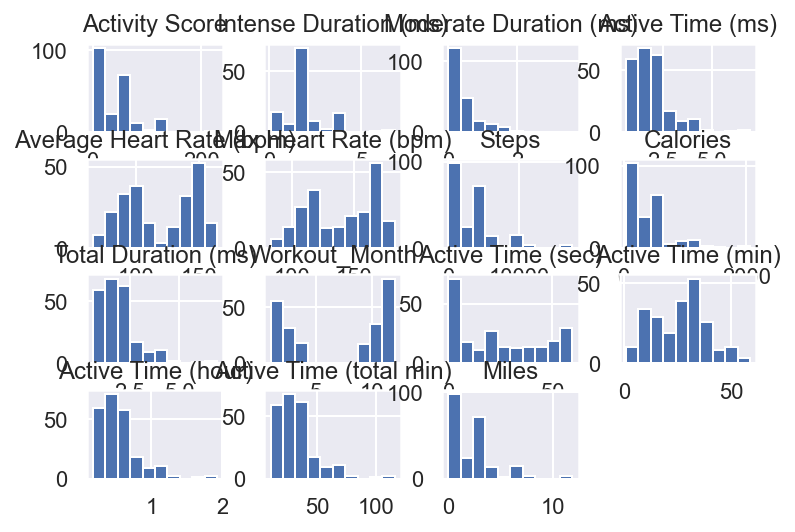

In [300]:
sns.set()
df.hist()

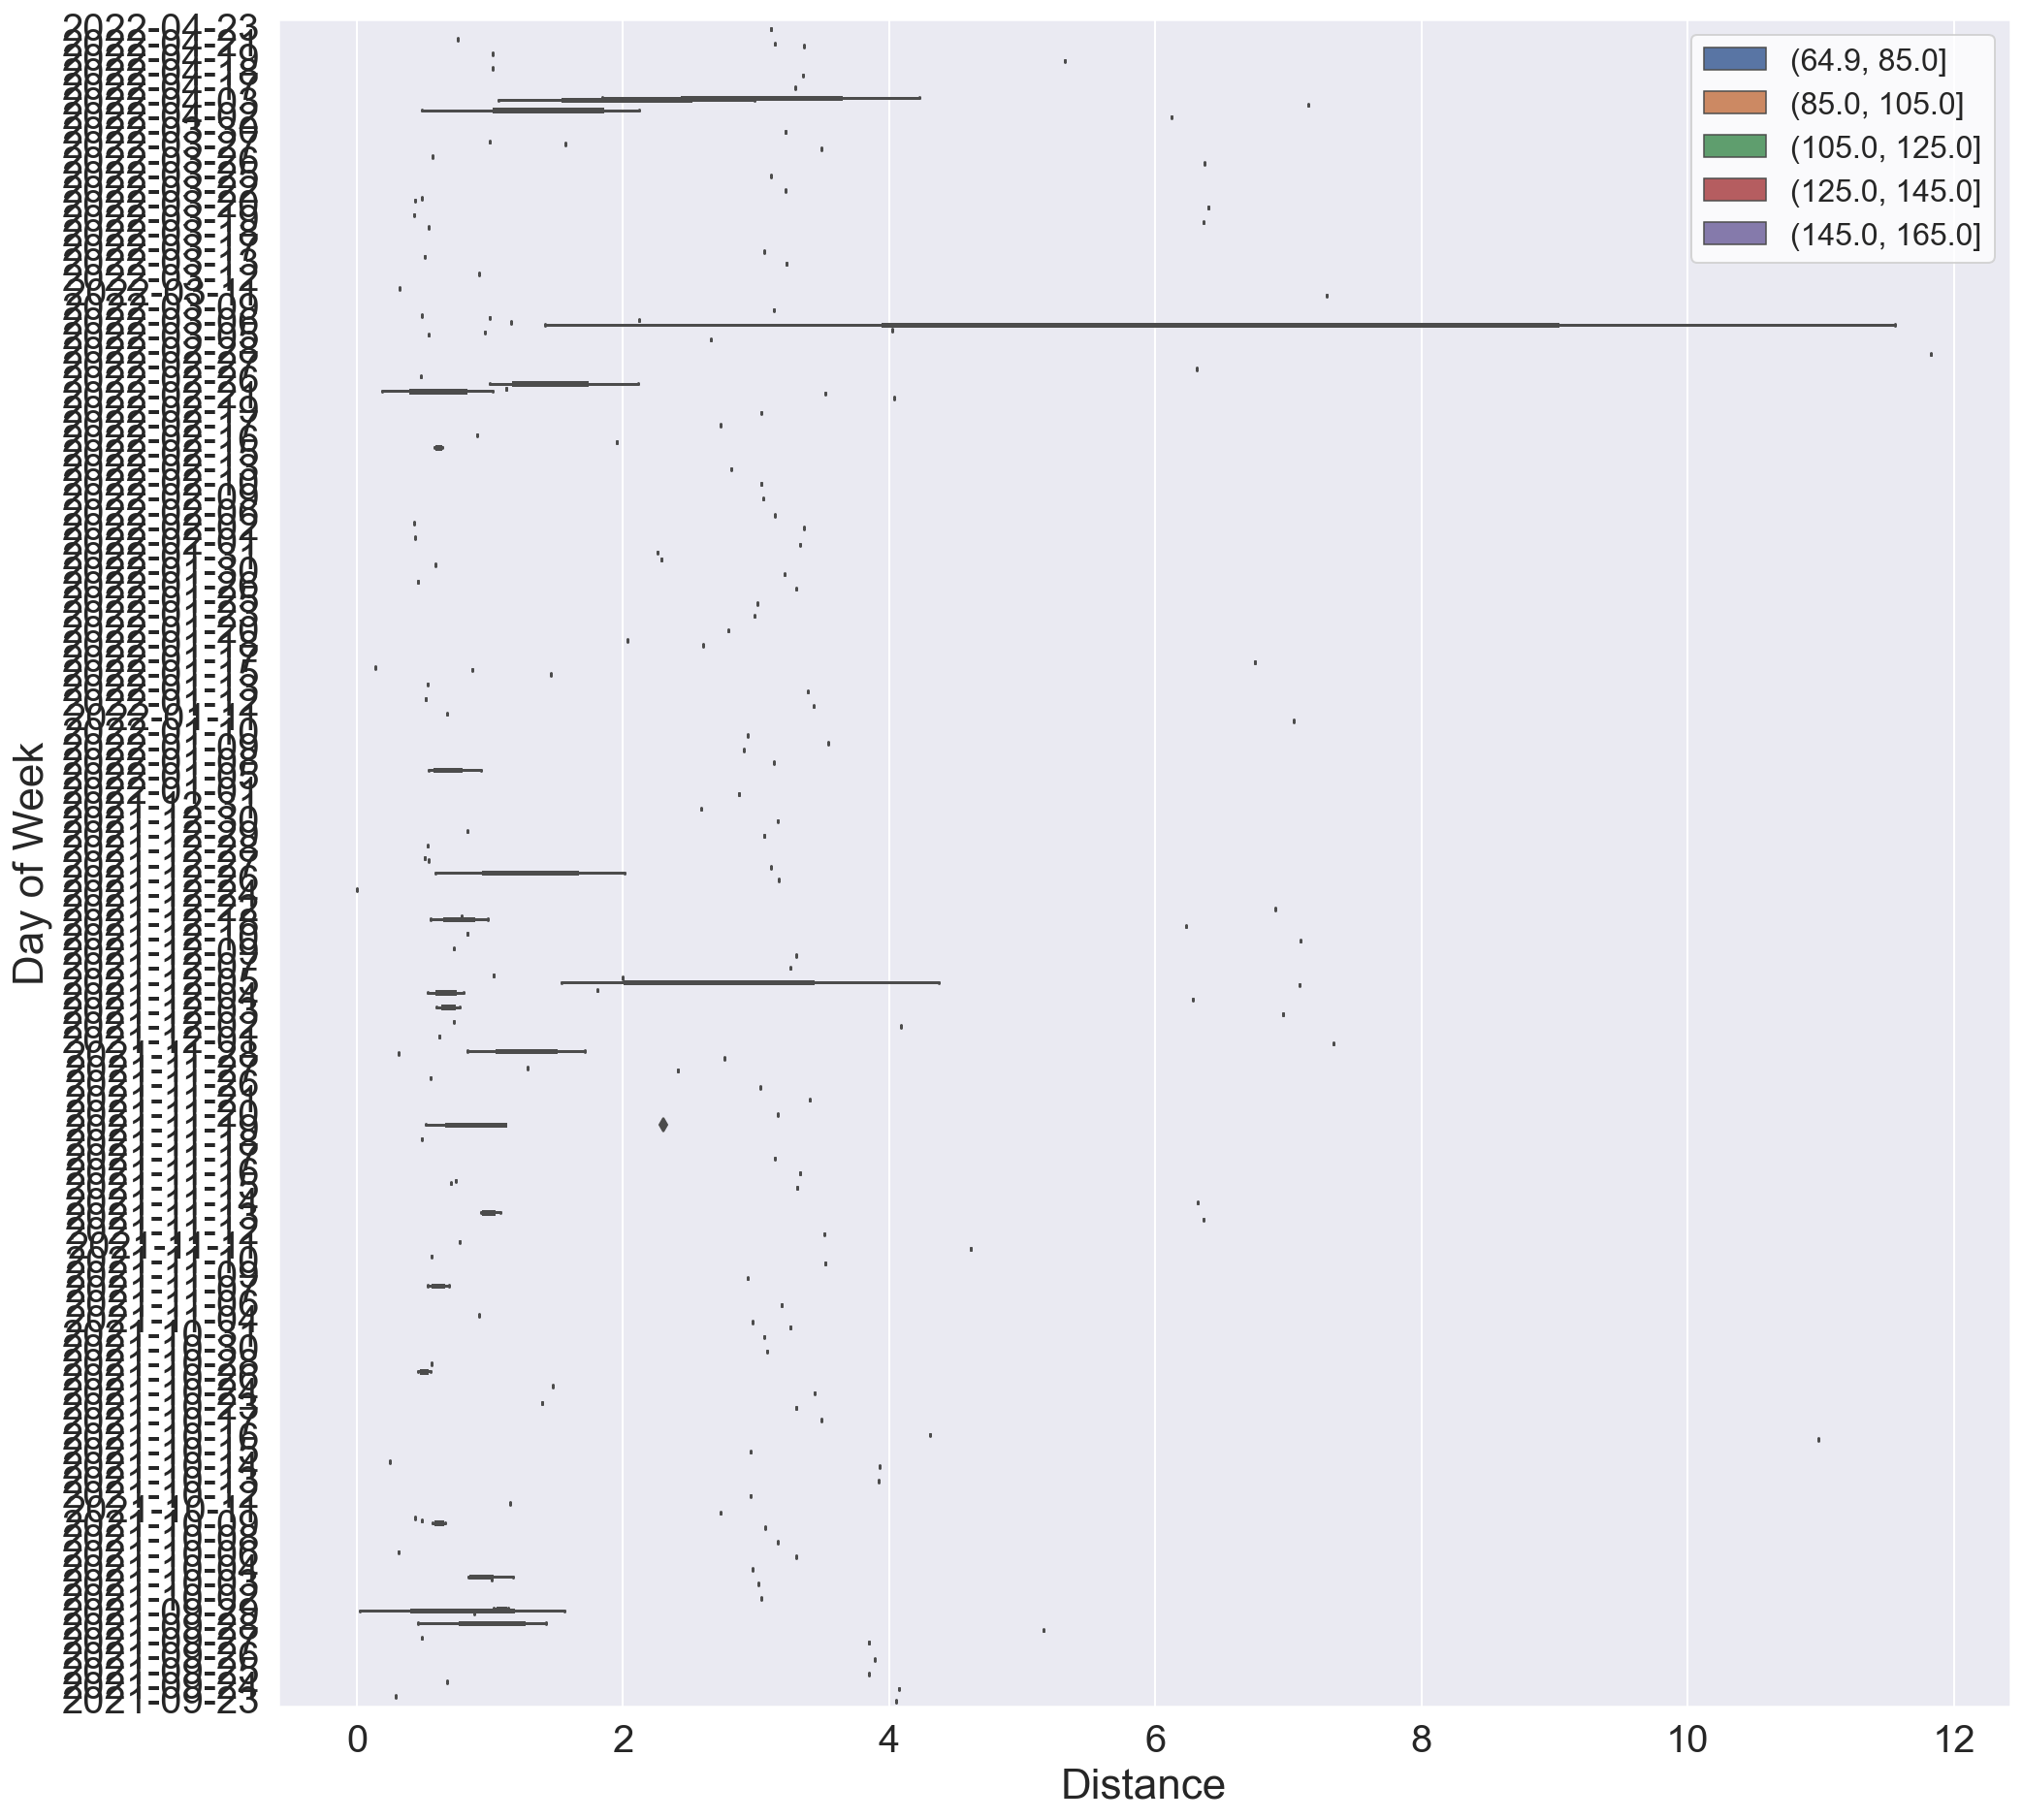

In [301]:
sns.set(rc={"figure.figsize":(16, 16)}) #width=8, height=4
jbox = sns.boxplot(x = 'Miles', y='Workout_Date', data=df, orient = 'h', hue = (pd.cut(df['Average Heart Rate (bpm)'], bins = 5)))
sns.set_theme(style="whitegrid")
plt.ylabel('Day of Week', fontsize=22)
plt.xlabel('Distance', fontsize=22)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend(fontsize = 16)

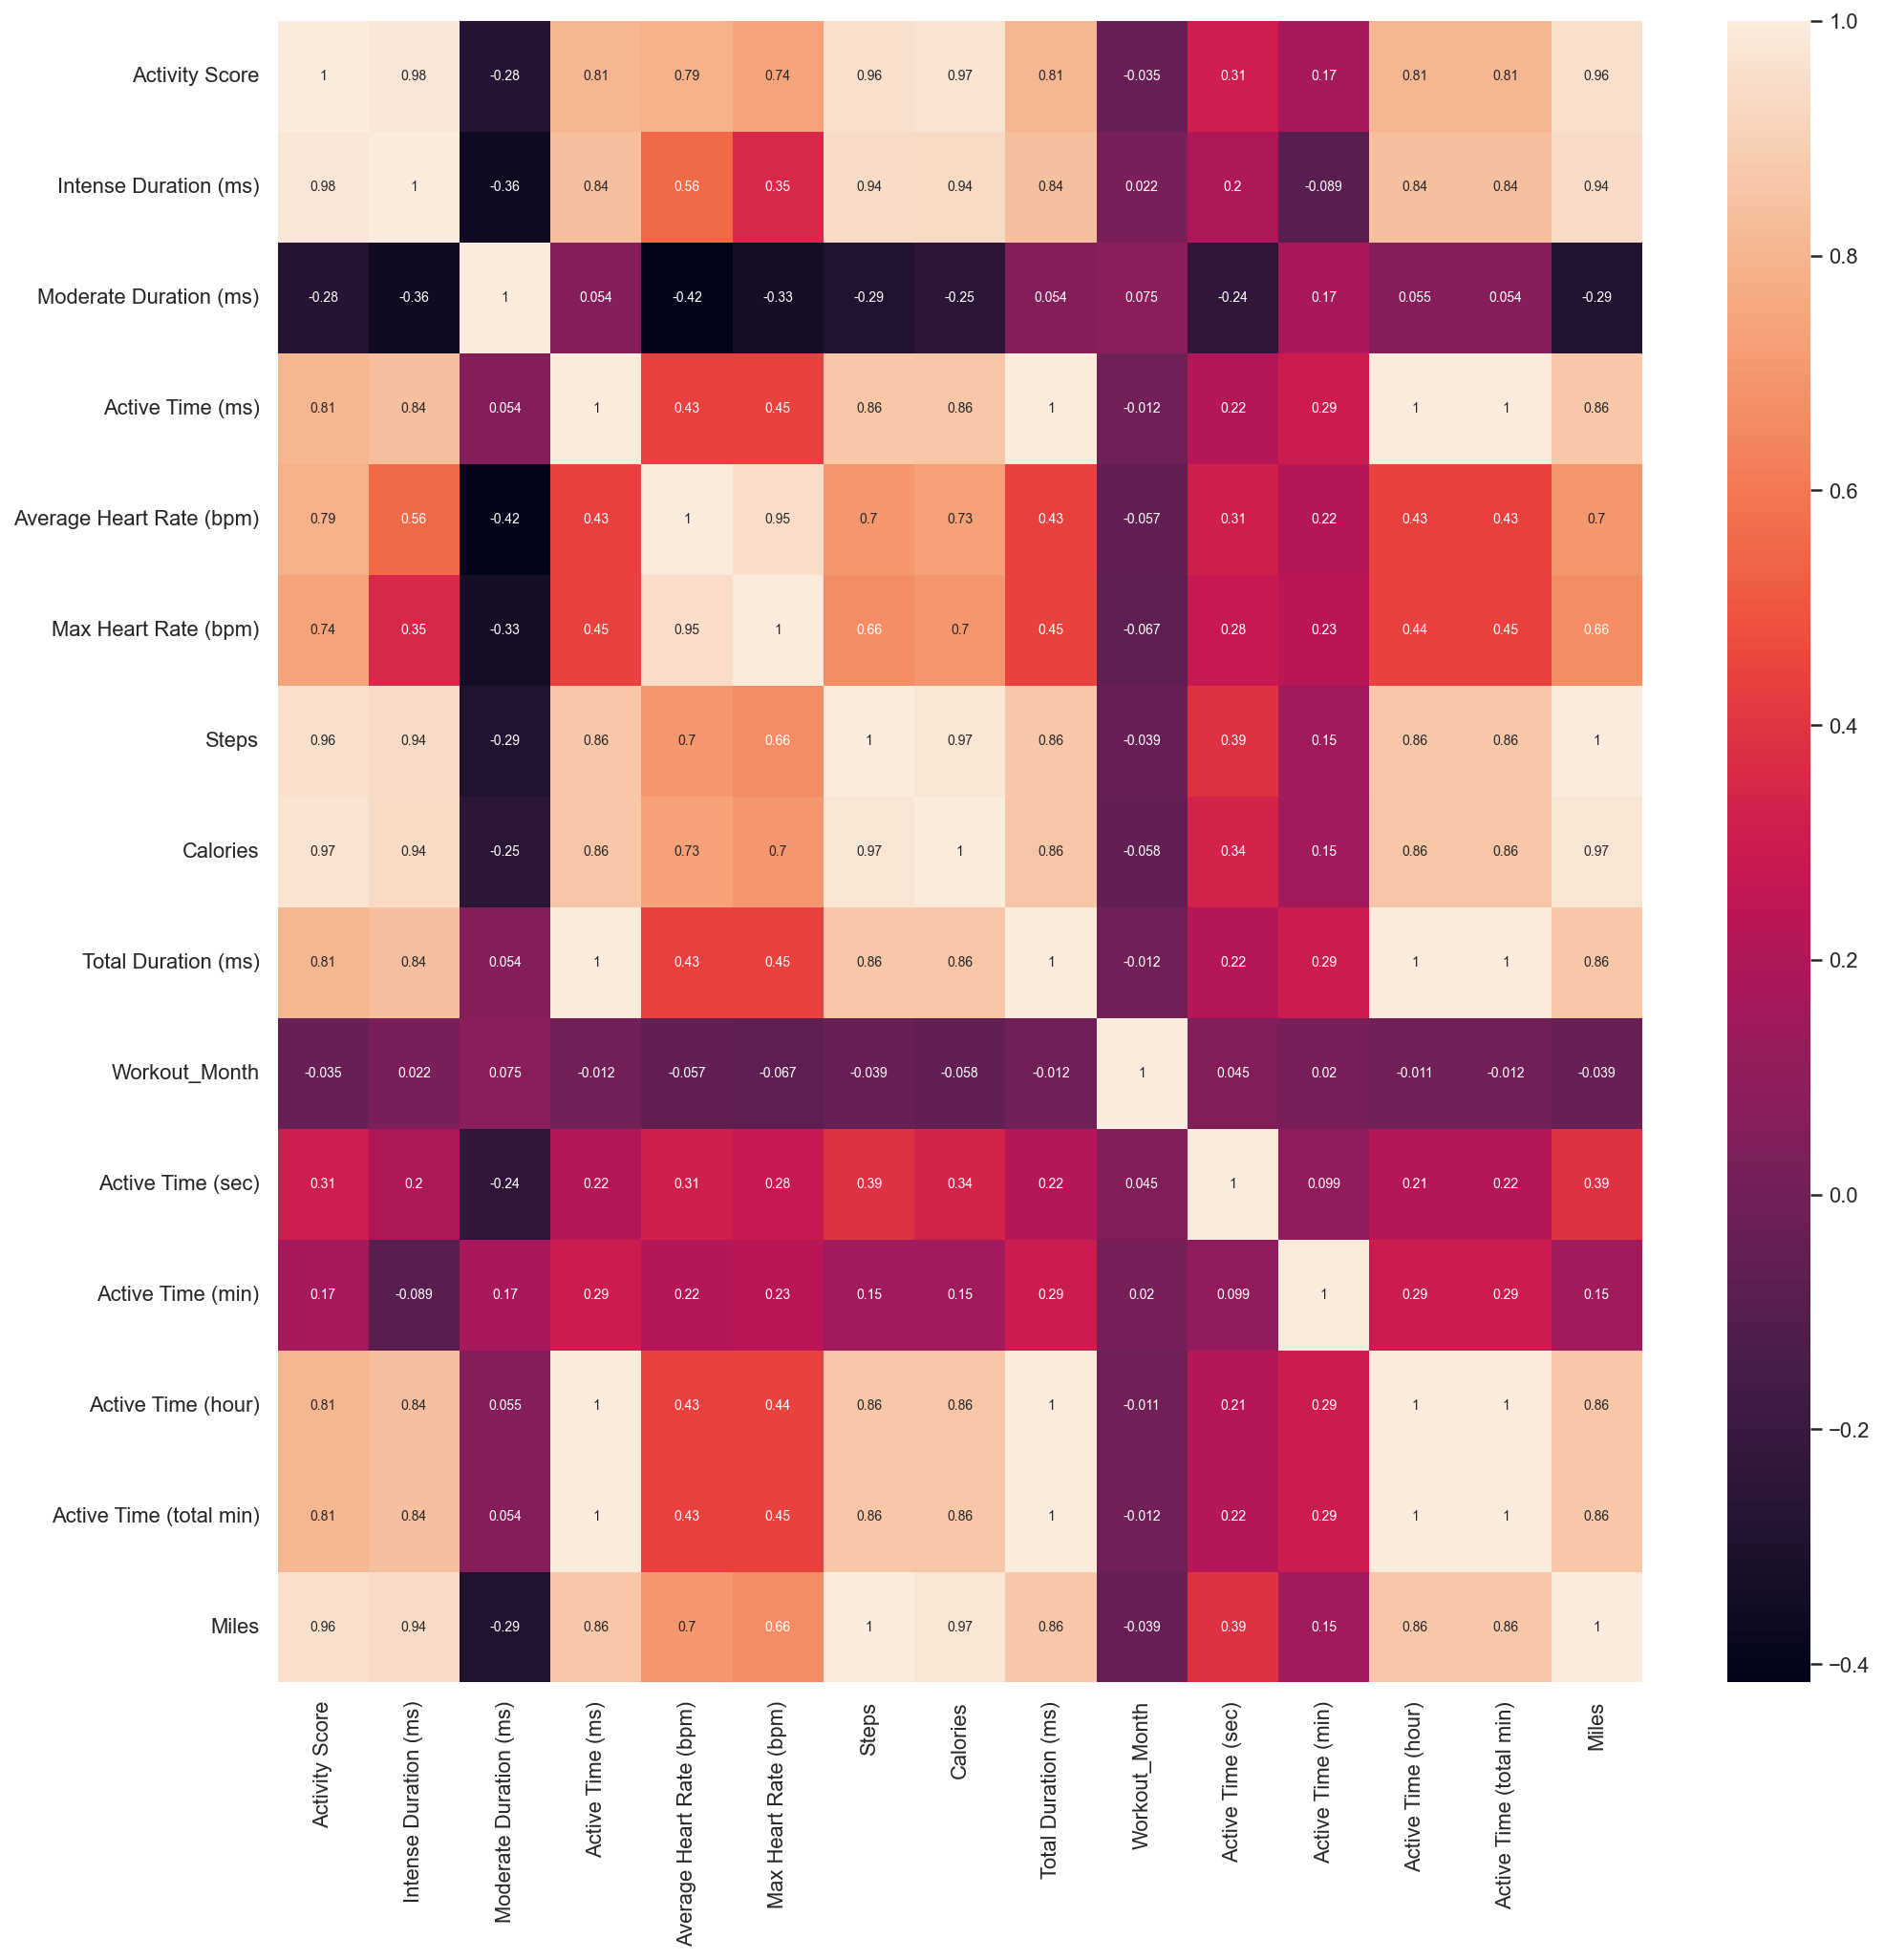

In [302]:
p1 = sns.heatmap(
    df
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)

In [303]:
# sns.set_context('talk')
# sns.pairplot(df, hue='Miles');

# Join Amazon Halo with Map My Run data

In [304]:
mmr_df = pd.read_csv('https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv')
mmr_df.info()
mmr_df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date Submitted          671 non-null    object 
 1   Workout Date            671 non-null    object 
 2   Activity Type           671 non-null    object 
 3   Calories Burned (kCal)  671 non-null    int64  
 4   Distance (mi)           671 non-null    float64
 5   Workout Time (seconds)  671 non-null    int64  
 6   Avg Pace (min/mi)       671 non-null    float64
 7   Max Pace                671 non-null    float64
 8   Avg Speed (mi/h)        671 non-null    float64
 9   Max Speed               671 non-null    float64
 10  Avg Heart Rate          442 non-null    float64
 11  Steps                   647 non-null    float64
 12  Notes                   671 non-null    object 
 13  Source                  671 non-null    object 
 14  Link                    671 non-null    ob

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link
0,"May 22, 2022","May 22, 2022",Run,420,3.1,1865,10.0269,0.0,5.98391,0.0,NaN,4936.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6595158784


In [305]:
mmr_df['Workout_Date'] = pd.to_datetime(mmr_df['Workout Date']).dt.date
mmr_df.head(1)

,Date Submitted,Workout Date,Activity Type,Calories Burned (kCal),Distance (mi),Workout Time (seconds),Avg Pace (min/mi),Max Pace,Avg Speed (mi/h),Max Speed,Avg Heart Rate,Steps,Notes,Source,Link,Workout_Date
0,"May 22, 2022","May 22, 2022",Run,420,3.1,1865,10.0269,0.0,5.98391,0.0,NaN,4936.0,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyfitness.com/workout/6595158784,2022-05-22


In [306]:
df.head(1)

,Workout_Date,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps,Calories,...,Start Time DTG,End Time DTG,day_of_week_start,Workout_Month,Workout_Month_Name,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Miles
0,2022-04-23,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,470.0,...,"Sat, Apr 23 2022 at 05:57:36 AM UTC","Sat, Apr 23 2022 at 06:29:02 AM UTC",Saturday,4,April,26.21,31.44,0.52,31.44,3.11


In [307]:
mdf = df.merge(mmr_df, on='Workout_Date', how='left')

In [308]:
mdf.info()
mdf.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 261
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              262 non-null    object 
 1   Session Subtype           262 non-null    object 
 2   Activity Score            261 non-null    float64
 3   Intense Duration (ms)     142 non-null    float64
 4   Moderate Duration (ms)    237 non-null    float64
 5   Active Time (ms)          262 non-null    float64
 6   Average Heart Rate (bpm)  262 non-null    float64
 7   Max Heart Rate (bpm)      262 non-null    float64
 8   Steps_x                   262 non-null    float64
 9   Calories                  262 non-null    float64
 10  Total Duration (ms)       262 non-null    float64
 11  Start Time DTG            262 non-null    object 
 12  End Time DTG              262 non-null    object 
 13  day_of_week_start         262 non-null    object 
 14  Workout_Mo

Index(['Workout_Date', 'Session Subtype', 'Activity Score',
       'Intense Duration (ms)', 'Moderate Duration (ms)', 'Active Time (ms)',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Total Duration (ms)', 'Start Time DTG', 'End Time DTG',
       'day_of_week_start', 'Workout_Month', 'Workout_Month_Name',
       'Active Time (sec)', 'Active Time (min)', 'Active Time (hour)',
       'Active Time (total min)', 'Miles', 'Date Submitted', 'Workout Date',
       'Activity Type', 'Calories Burned (kCal)', 'Distance (mi)',
       'Workout Time (seconds)', 'Avg Pace (min/mi)', 'Max Pace',
       'Avg Speed (mi/h)', 'Max Speed', 'Avg Heart Rate', 'Steps_y', 'Notes',
       'Source', 'Link'],
      dtype='object')

In [309]:
#I will make a trimmed version of my merged dataframe
mdft = mdf[['Workout_Date', 'Session Subtype', 'Activity Score',
       'Intense Duration (ms)', 'Moderate Duration (ms)', 'Active Time (ms)',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x', 'Steps_y',
       'Calories', 'Total Duration (ms)', 'Start Time DTG', 'End Time DTG',
       'day_of_week_start', 'Workout_Month', 'Workout_Month_Name',
       'Active Time (sec)', 'Active Time (min)', 'Active Time (hour)',
       'Active Time (total min)', 'Miles', 'Distance (mi)', ]]

In [310]:
mdft.head(1)

,Workout_Date,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps_x,Steps_y,...,End Time DTG,day_of_week_start,Workout_Month,Workout_Month_Name,Active Time (sec),Active Time (min),Active Time (hour),Active Time (total min),Miles,Distance (mi)
0,2022-04-23,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,4312.0,...,"Sat, Apr 23 2022 at 06:29:02 AM UTC",Saturday,4,April,26.21,31.44,0.52,31.44,3.11,3.1


## Cleaning

In [311]:
mdft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262 entries, 0 to 261
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              262 non-null    object 
 1   Session Subtype           262 non-null    object 
 2   Activity Score            261 non-null    float64
 3   Intense Duration (ms)     142 non-null    float64
 4   Moderate Duration (ms)    237 non-null    float64
 5   Active Time (ms)          262 non-null    float64
 6   Average Heart Rate (bpm)  262 non-null    float64
 7   Max Heart Rate (bpm)      262 non-null    float64
 8   Steps_x                   262 non-null    float64
 9   Steps_y                   201 non-null    float64
 10  Calories                  262 non-null    float64
 11  Total Duration (ms)       262 non-null    float64
 12  Start Time DTG            262 non-null    object 
 13  End Time DTG              262 non-null    object 
 14  day_of_wee

In [312]:
#check the percentage of empty values
for col in mdft.columns:
    pct_missing = np.mean(mdft[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Workout_Date - 0%
Session Subtype - 0%
Activity Score - 0%
Intense Duration (ms) - 46%
Moderate Duration (ms) - 10%
Active Time (ms) - 0%
Average Heart Rate (bpm) - 0%
Max Heart Rate (bpm) - 0%
Steps_x - 0%
Steps_y - 23%
Calories - 0%
Total Duration (ms) - 0%
Start Time DTG - 0%
End Time DTG - 0%
day_of_week_start - 0%
Workout_Month - 0%
Workout_Month_Name - 0%
Active Time (sec) - 0%
Active Time (min) - 0%
Active Time (hour) - 0%
Active Time (total min) - 0%
Miles - 0%
Distance (mi) - 23%


created missing indicator for: Activity Score
created missing indicator for: Intense Duration (ms)
created missing indicator for: Moderate Duration (ms)
created missing indicator for: Steps_y
created missing indicator for: Distance (mi)


,Workout_Date,Session Subtype,Activity Score,Intense Duration (ms),Moderate Duration (ms),Active Time (ms),Average Heart Rate (bpm),Max Heart Rate (bpm),Steps_x,Steps_y,...,Active Time (hour),Active Time (total min),Miles,Distance (mi),Activity Score_ismissing,Intense Duration (ms)_ismissing,Moderate Duration (ms)_ismissing,Steps_y_ismissing,Distance (mi)_ismissing,num_missing
0,2022-04-23,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,4312.0,...,0.52,31.44,3.11,3.10000,False,False,False,False,False,0
1,2022-04-23,RUNNING,58.06,1620000.0,242484.0,1886214.0,134.0,145.0,4585.0,4444.0,...,0.52,31.44,3.11,3.10000,False,False,False,False,False,0
2,2022-04-21,RUNNING,57.74,1620000.0,221491.0,1914907.0,130.0,144.0,4626.0,4639.0,...,0.53,31.92,3.14,3.10142,False,False,False,False,False,0
3,2022-04-21,OTHER,23.20,NaN,1380000.0,1680000.0,98.0,115.0,1124.0,4639.0,...,0.47,28.00,0.76,3.10142,False,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,2022-04-19,RUNNING,96.91,2866774.0,81040.0,2947814.0,151.0,168.0,7840.0,7656.0,...,0.82,49.13,5.32,5.01831,False,False,False,False,False,0
7,2022-04-18,OTHER,16.85,NaN,960000.0,1980000.0,96.0,117.0,1501.0,4696.0,...,0.55,33.00,1.02,3.09845,False,True,False,False,False,1
8,2022-04-18,RUNNING,62.48,1740000.0,266749.0,2049381.0,147.0,168.0,4948.0,4696.0,...,0.57,34.16,3.35,3.09845,False,False,False,False,False,0
9,2022-04-17,RUNNING,62.63,1740000.0,276214.0,2049326.0,131.0,148.0,4850.0,4781.0,...,0.57,34.16,3.29,3.10000,False,False,False,False,False,0


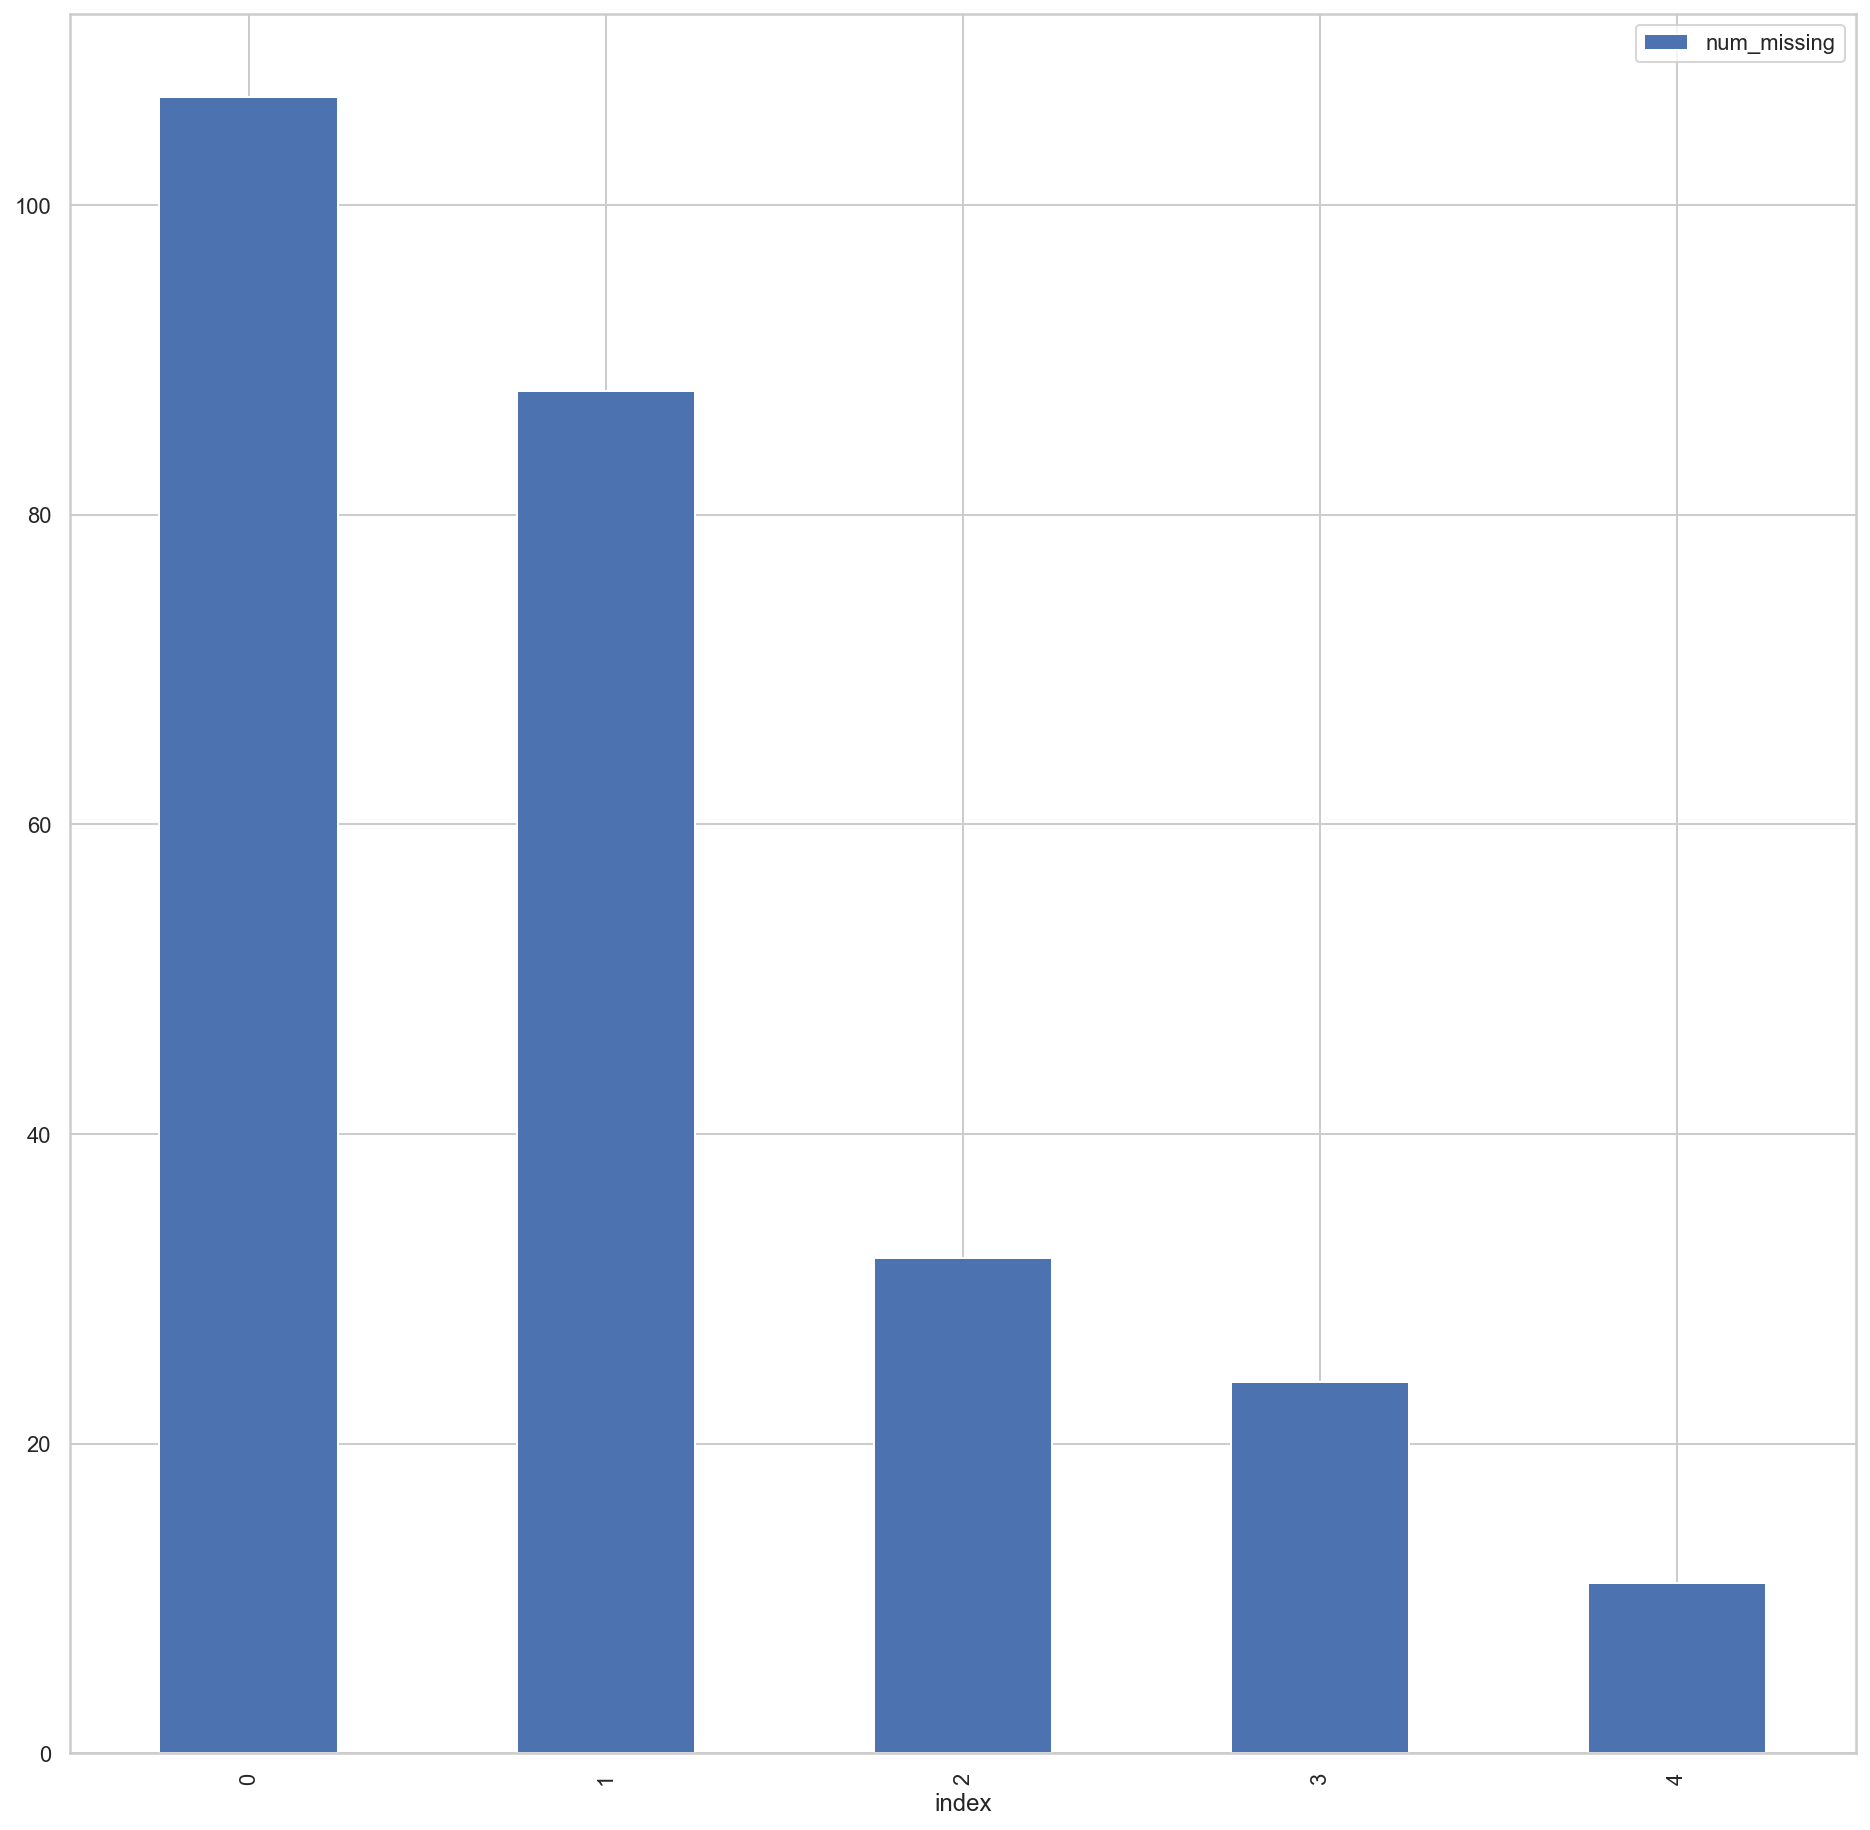

In [313]:
for col in mdft.columns:
    missing = mdft[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        mdft['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in mdft.columns if 'ismissing' in col]
mdft['num_missing'] = mdft[ismissing_cols].sum(axis=1)

mdft['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
mdft.head(10)

In [245]:
# drop rows with missing values.
ind_missing = mdft[mdft['Distance (mi)_ismissing'] == 1].index
mdft_lmr = mdft.drop(ind_missing, axis=0)

ind_missing2 = mdft[mdft['Activity Score_ismissing'] == 1].index
mdft_lmr2 = mdft_lmr.drop(ind_missing2, axis=0)


mdft_lmr2.columns

Index(['Workout_Date', 'Session Subtype', 'Activity Score',
       'Intense Duration (ms)', 'Moderate Duration (ms)', 'Active Time (ms)',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Steps_y', 'Calories', 'Total Duration (ms)', 'Start Time DTG',
       'End Time DTG', 'day_of_week_start', 'Workout_Month',
       'Workout_Month_Name', 'Active Time (sec)', 'Active Time (min)',
       'Active Time (hour)', 'Active Time (total min)', 'Miles',
       'Distance (mi)', 'Activity Score_ismissing',
       'Intense Duration (ms)_ismissing', 'Moderate Duration (ms)_ismissing',
       'Steps_y_ismissing', 'Distance (mi)_ismissing', 'num_missing'],
      dtype='object')

In [359]:
#I am going to shorten the name of the DF
df2 = mdft_lmr2[['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Active Time (total min)', 'day_of_week_start']]
df2.head(1)

,Workout_Date,Distance (mi),Session Subtype,Activity Score,Average Heart Rate (bpm),Max Heart Rate (bpm),Steps_x,Calories,Active Time (total min),day_of_week_start
0,2022-04-23,3.1,RUNNING,58.06,134.0,145.0,4585.0,470.0,31.44,Saturday


In [360]:
rdf2 = df2[df2['Session Subtype'] == "RUNNING"]
rdf2.head(2)

,Workout_Date,Distance (mi),Session Subtype,Activity Score,Average Heart Rate (bpm),Max Heart Rate (bpm),Steps_x,Calories,Active Time (total min),day_of_week_start
0,2022-04-23,3.1,RUNNING,58.06,134.0,145.0,4585.0,470.0,31.44,Saturday
1,2022-04-23,3.1,RUNNING,58.06,134.0,145.0,4585.0,470.0,31.44,Saturday


<AxesSubplot:>

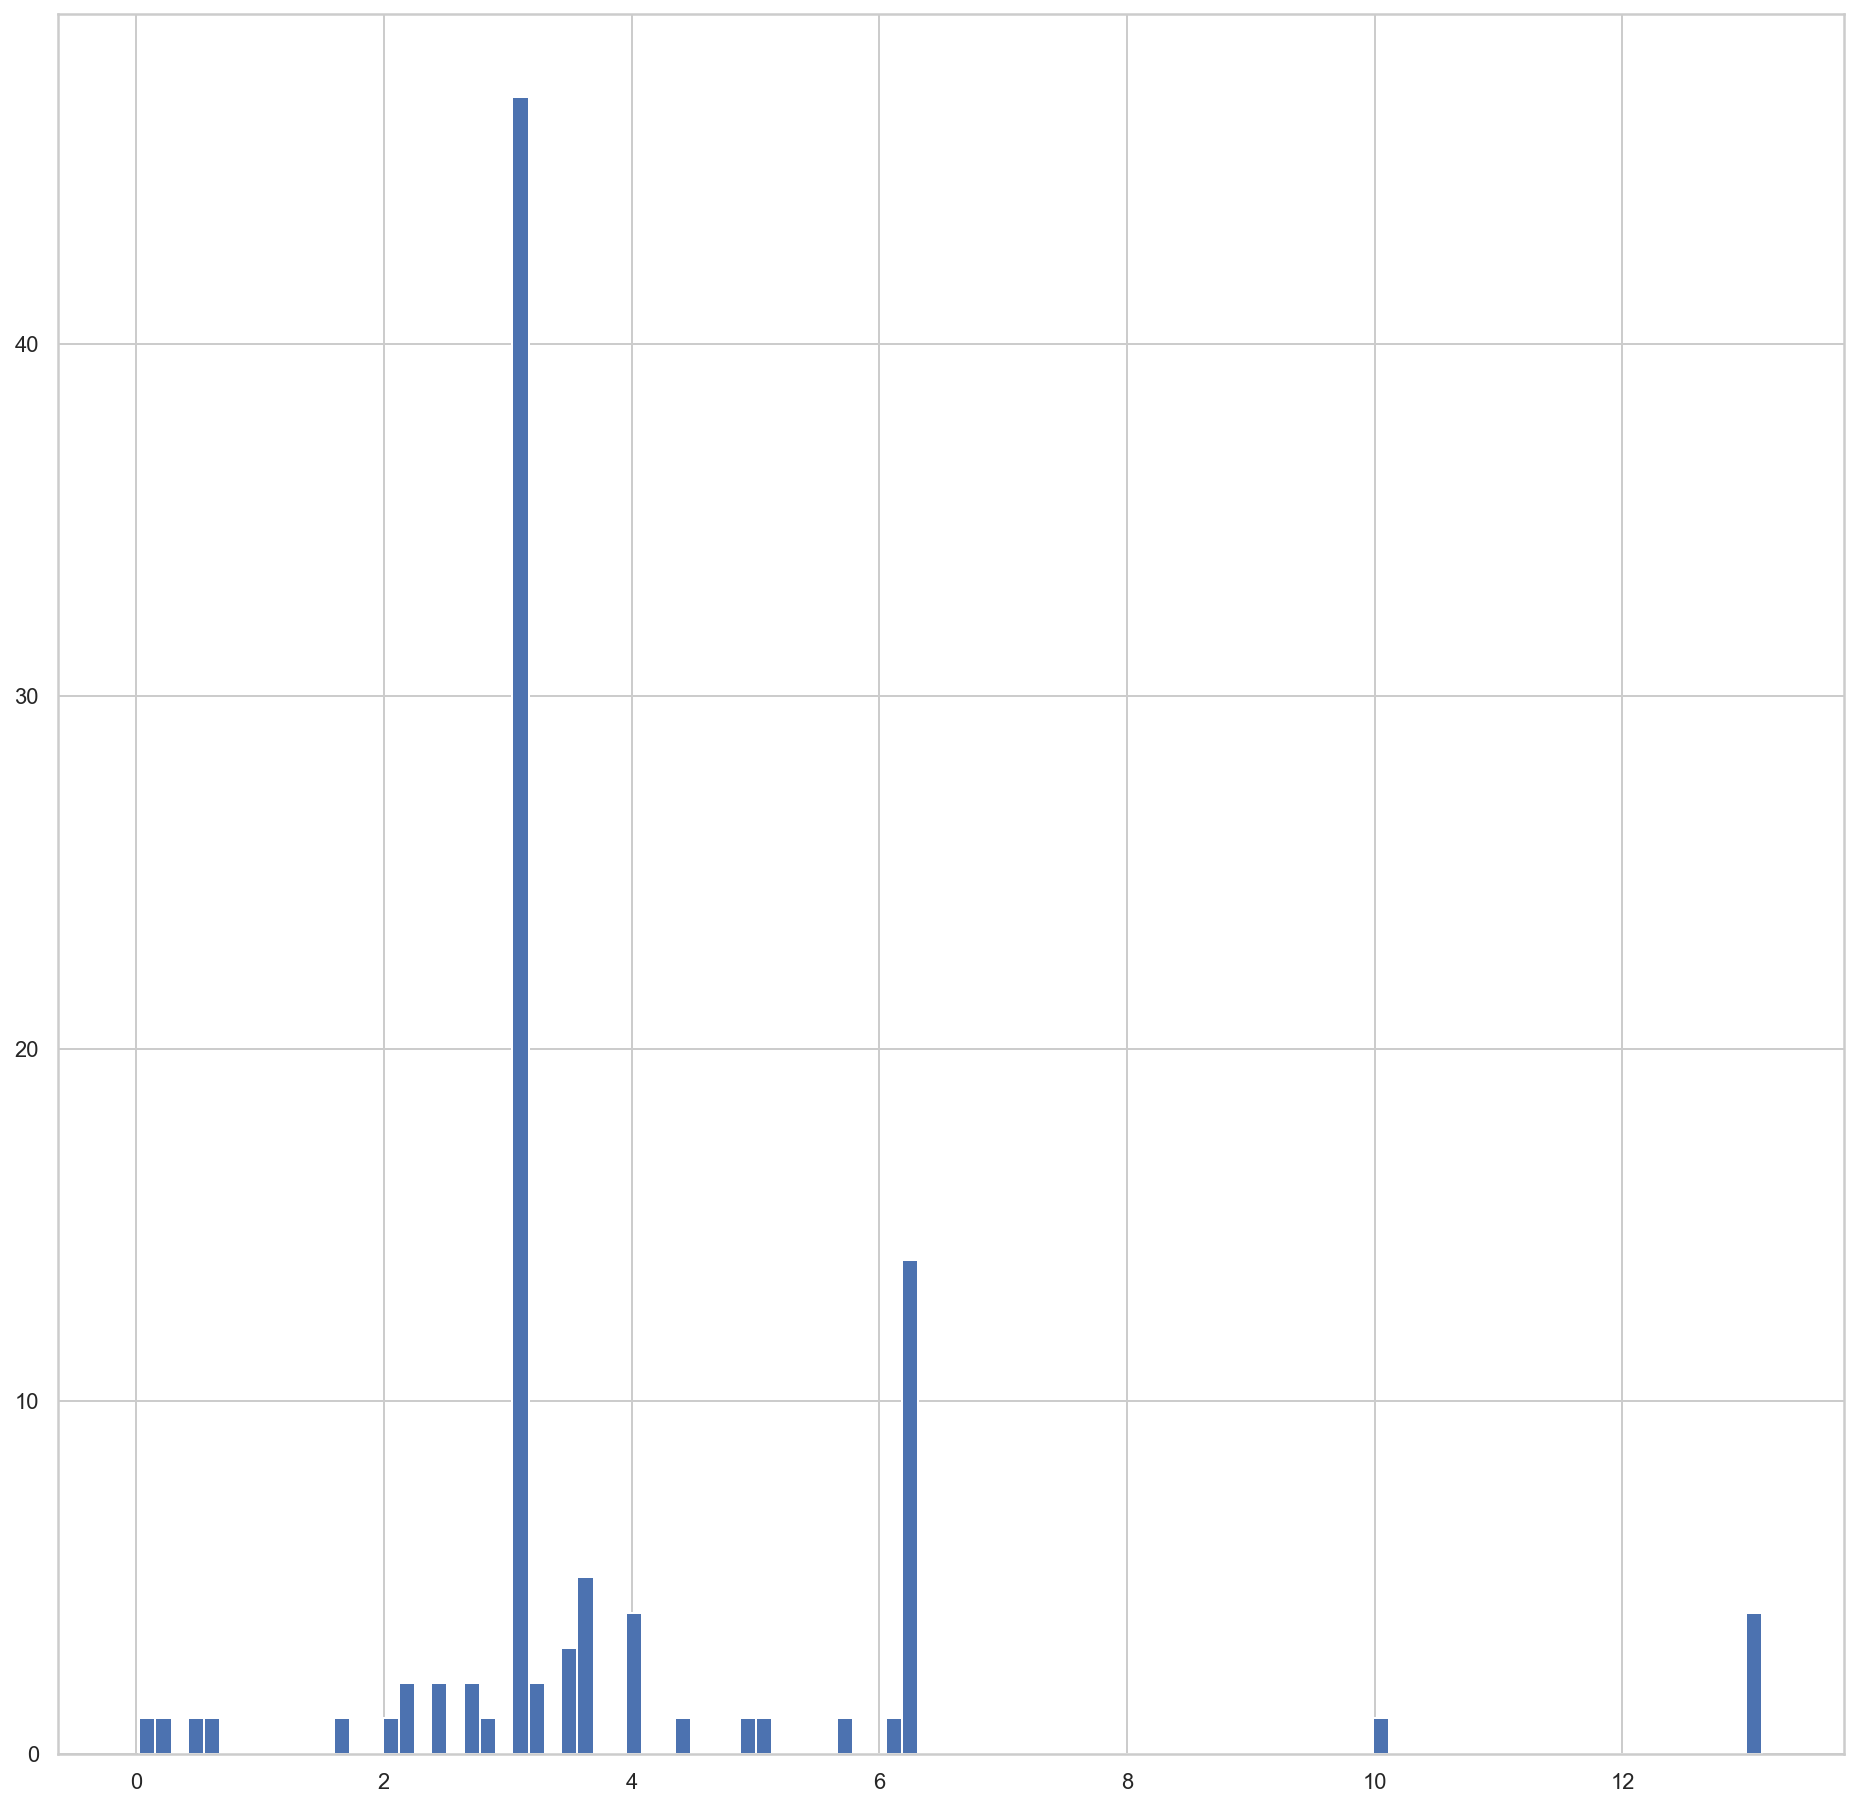

In [361]:
rdf2['Distance (mi)'].hist(bins=100)

In [362]:
#I noticed too many half-marathons in this dataset, so I will visually inspect the DF
pd.set_option('display.max_rows', 8)
rdf2.sort_values(by='Distance (mi)', ascending = False)

,Workout_Date,Distance (mi),Session Subtype,Activity Score,Average Heart Rate (bpm),Max Heart Rate (bpm),Steps_x,Calories,Active Time (total min),day_of_week_start
157,2021-12-05,13.130000,RUNNING,79.44,145.0,162.0,6448.0,749.0,47.22,Sunday
159,2021-12-05,13.130000,RUNNING,133.30,153.0,165.0,10440.0,1161.0,68.38,Sunday
52,2022-03-06,13.100000,RUNNING,225.86,159.0,173.0,17055.0,2060.0,113.93,Sunday
51,2022-03-06,13.100000,RUNNING,27.58,148.0,167.0,2075.0,263.0,15.79,Sunday
...,...,...,...,...,...,...,...,...,...,...
29,2022-03-27,0.662913,RUNNING,62.92,150.0,170.0,5142.0,538.0,33.87,Sunday
98,2022-01-31,0.440799,RUNNING,44.01,149.0,172.0,3382.0,387.0,24.92,Monday
18,2022-04-03,0.251156,RUNNING,132.54,159.0,174.0,10553.0,1317.0,68.54,Sunday
93,2022-02-02,0.024211,RUNNING,61.03,140.0,160.0,4961.0,530.0,36.09,Wednesday


In [363]:
rdf2.drop_duplicates(subset ="Workout_Date",
                     keep = False, inplace = True)
rdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 6 to 261
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Workout_Date              62 non-null     object 
 1   Distance (mi)             62 non-null     float64
 2   Session Subtype           62 non-null     object 
 3   Activity Score            62 non-null     float64
 4   Average Heart Rate (bpm)  62 non-null     float64
 5   Max Heart Rate (bpm)      62 non-null     float64
 6   Steps_x                   62 non-null     float64
 7   Calories                  62 non-null     float64
 8   Active Time (total min)   62 non-null     float64
 9   day_of_week_start         62 non-null     object 
dtypes: float64(7), object(3)
memory usage: 5.3+ KB


<AxesSubplot:>

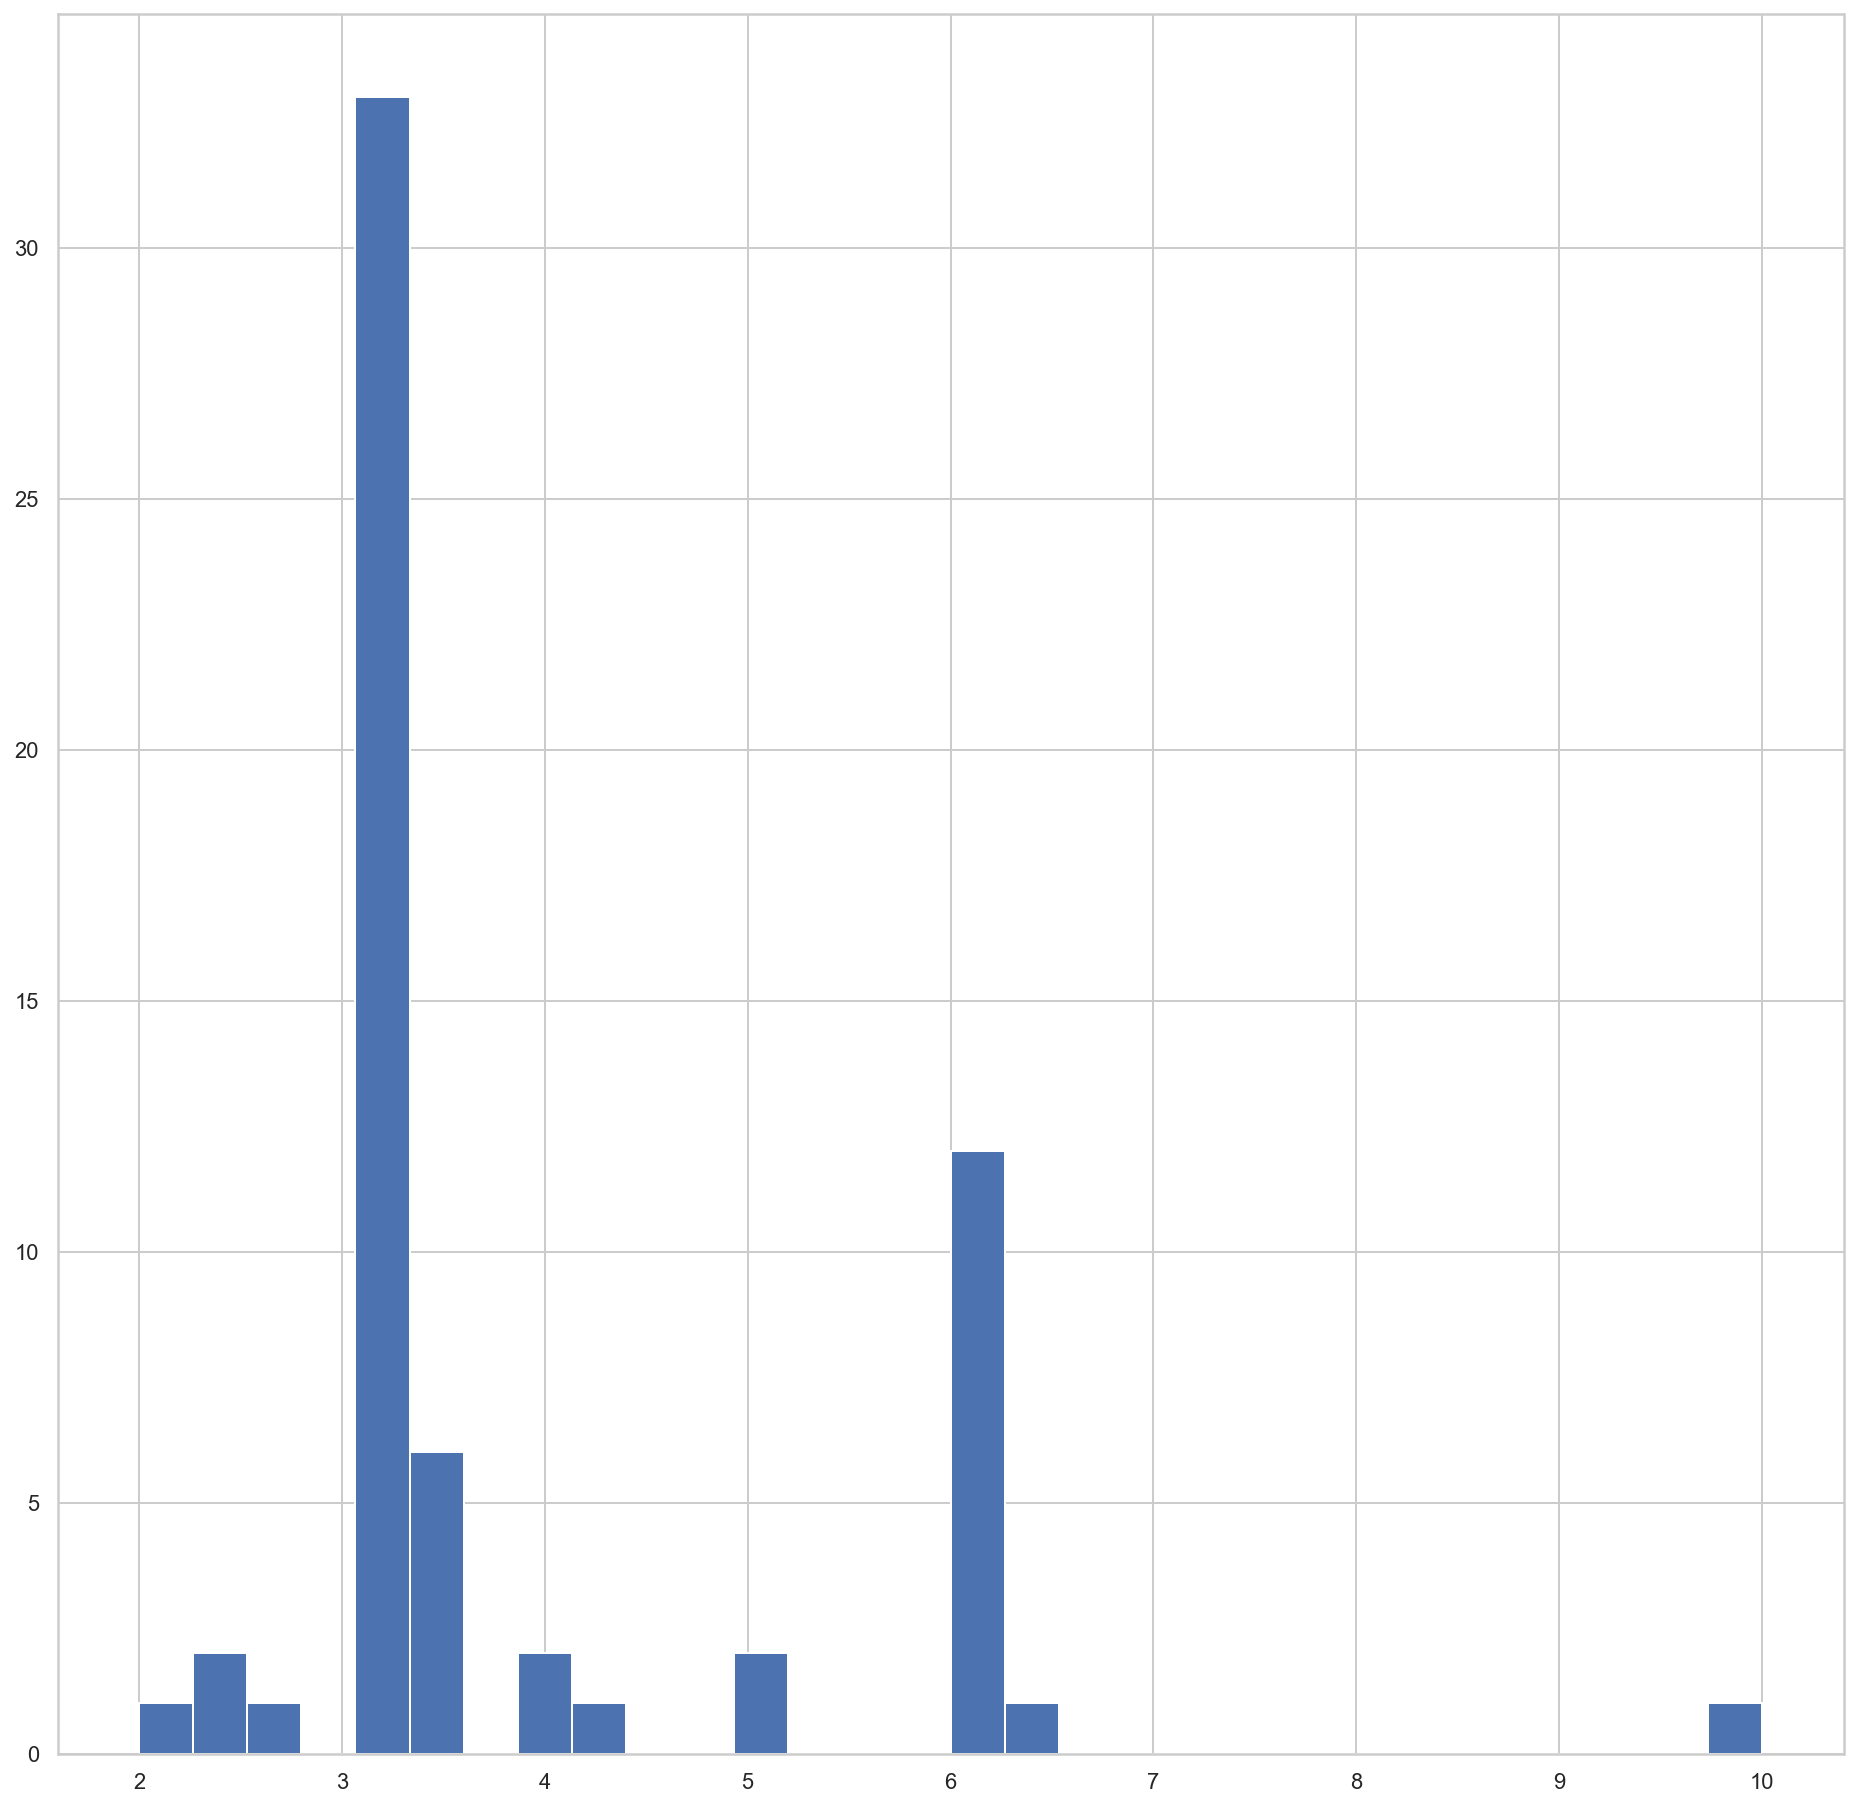

In [364]:
rdf2['Distance (mi)'].hist(bins=30)

## Double Checking my Join

In [365]:
# merged = pd.merge(df,mmr_df,on=['Workout_Date'], how='outer').drop_duplicates()
# merged.info()
# merged.columns

In [366]:
# merged2 = merged[['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
#        'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
#        'Calories', 'day_of_week_start', 'Local Start Time DTG',
#        'Local End Time DTG', 'Local Start Time', 'Local End Time',
#        'Active Time (total min)']]

In [367]:
# merged2.info()
# merged2.sort_values(by='Workout_Date', ascending = False)


In [368]:
# mrg3 = merged2.drop_duplicates()
# mrg4 = mrg3.dropna()
# mrg4.info()

## EDA

Now that I have cleaned and merged my dataframes, I will explore the data

In [369]:
df2.columns

Index(['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Active Time (total min)', 'day_of_week_start'],
      dtype='object')

<AxesSubplot:xlabel='Workout_Date'>

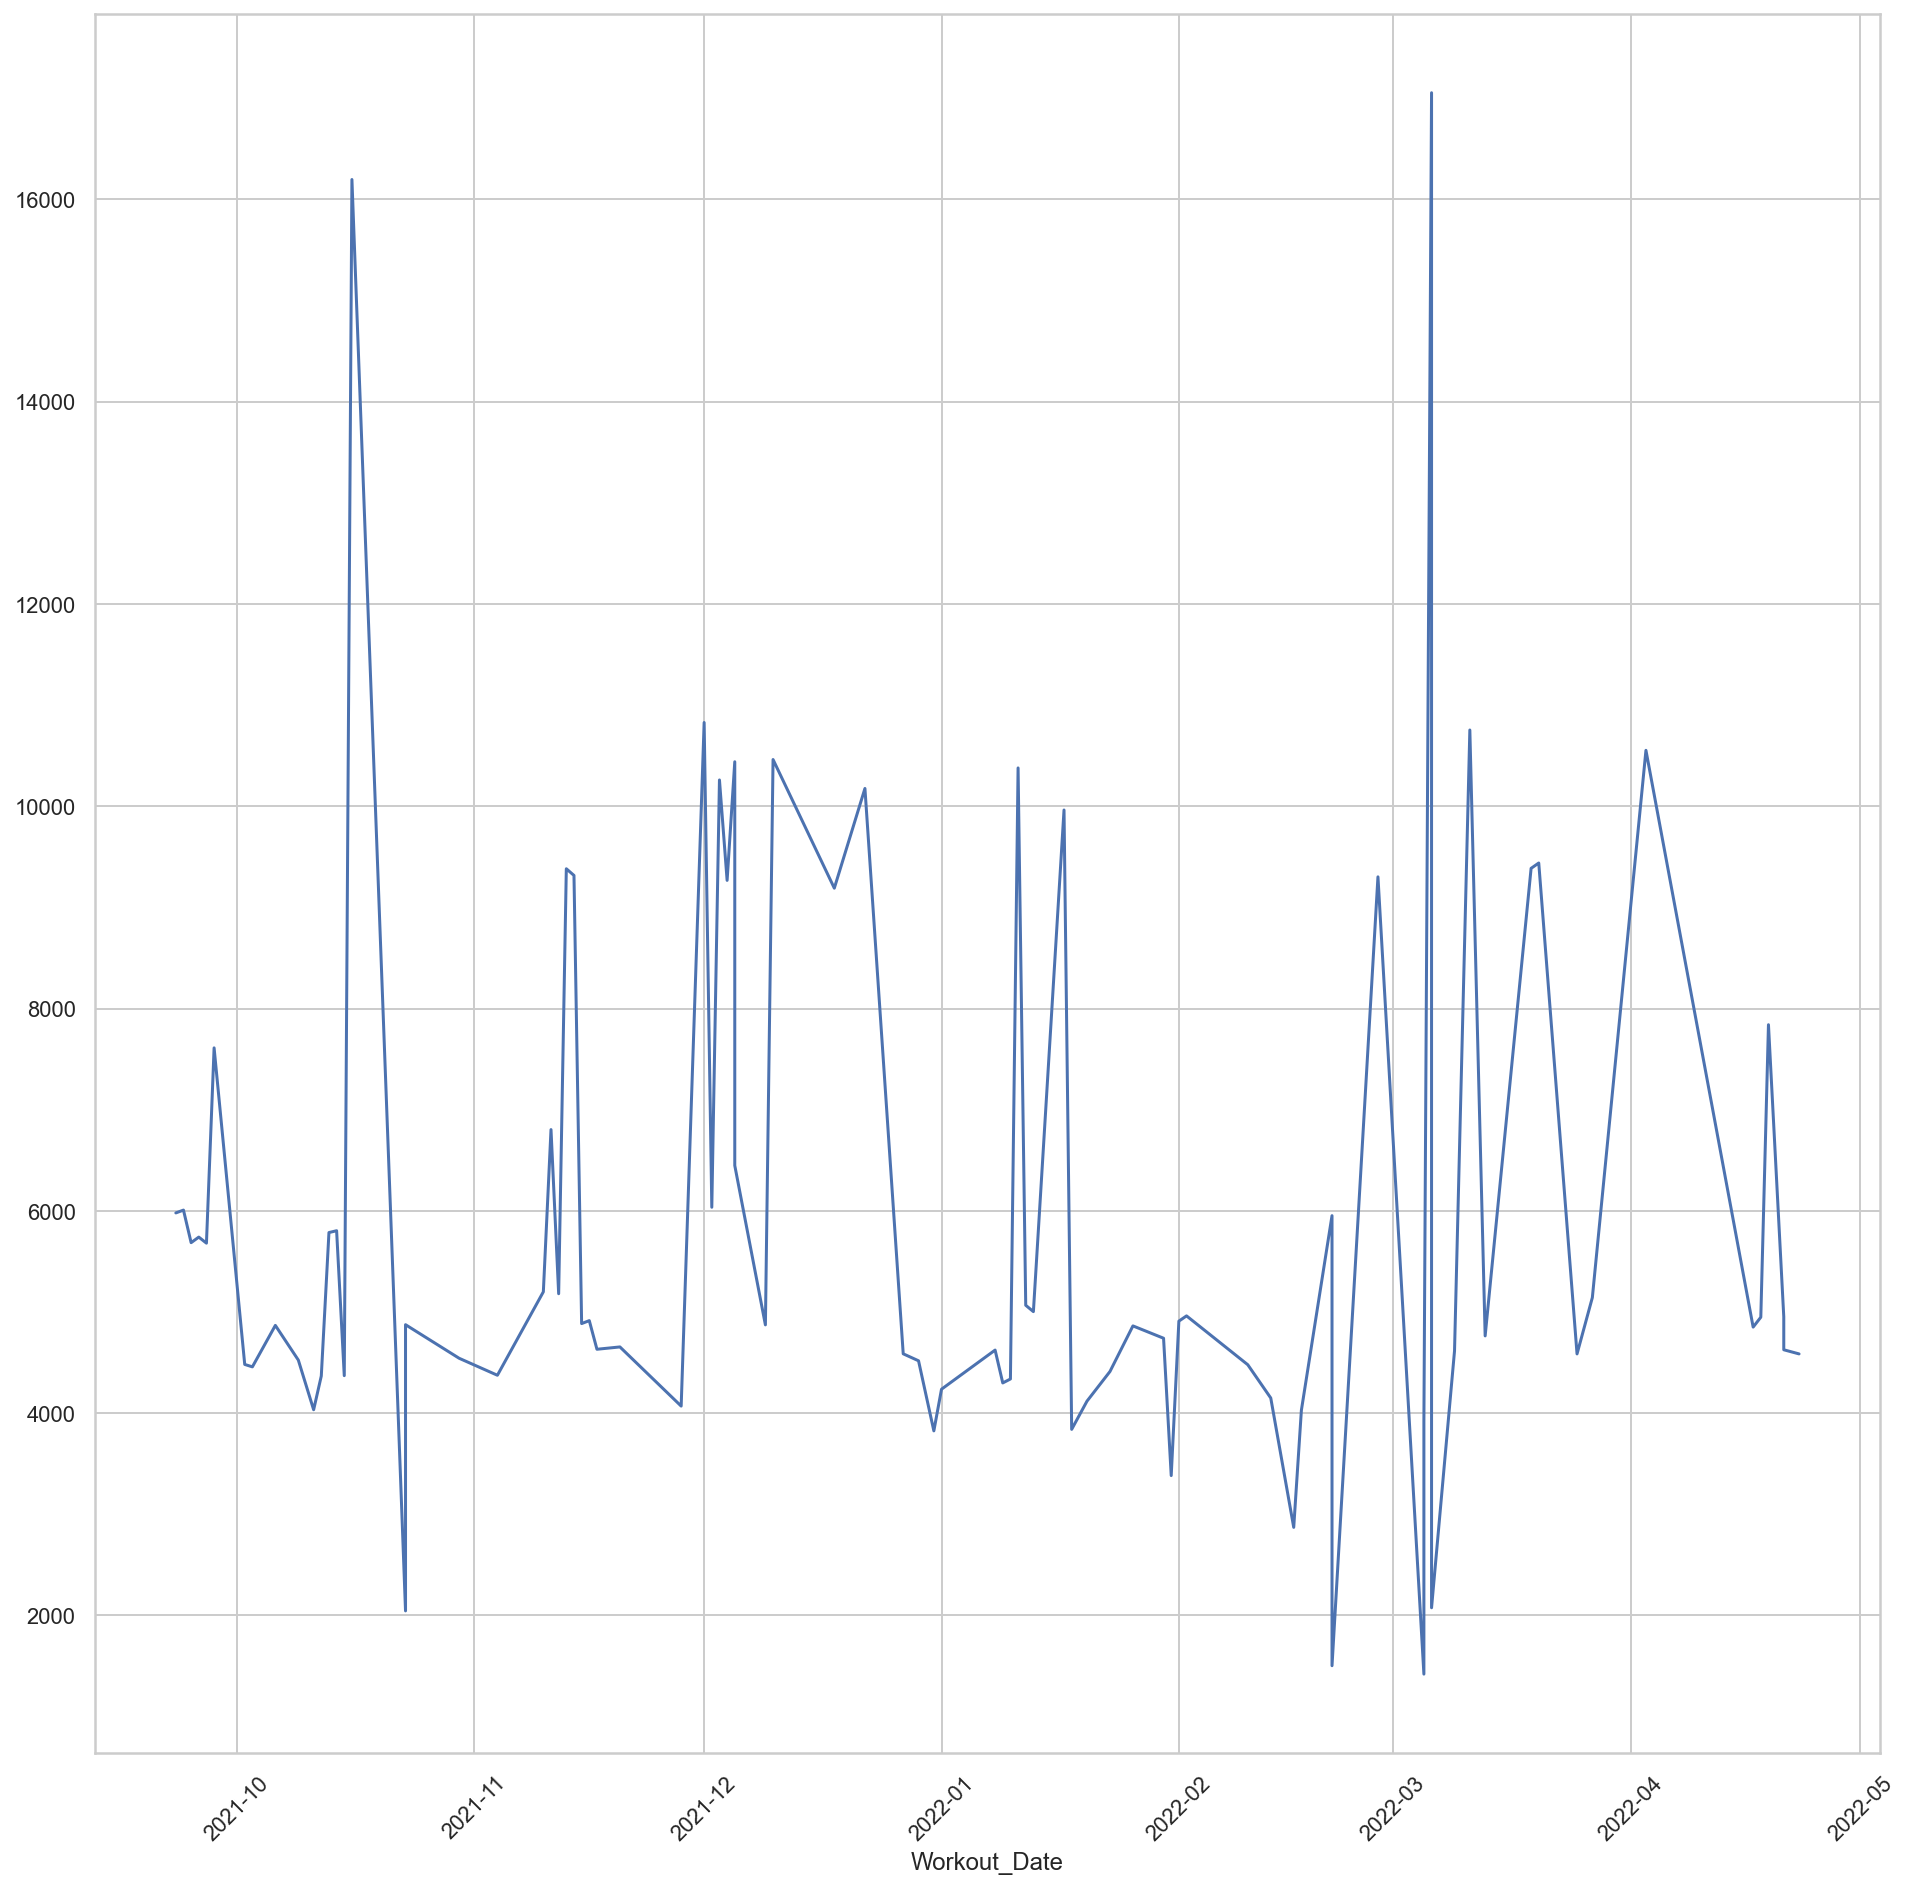

In [370]:
# show data with a mask filter (running only)
mask1 = df2['Session Subtype'] == 'RUNNING'
(
    df2[mask1]
    .set_index('Workout_Date')
    ['Steps_x']
    .plot(rot = 45)
)

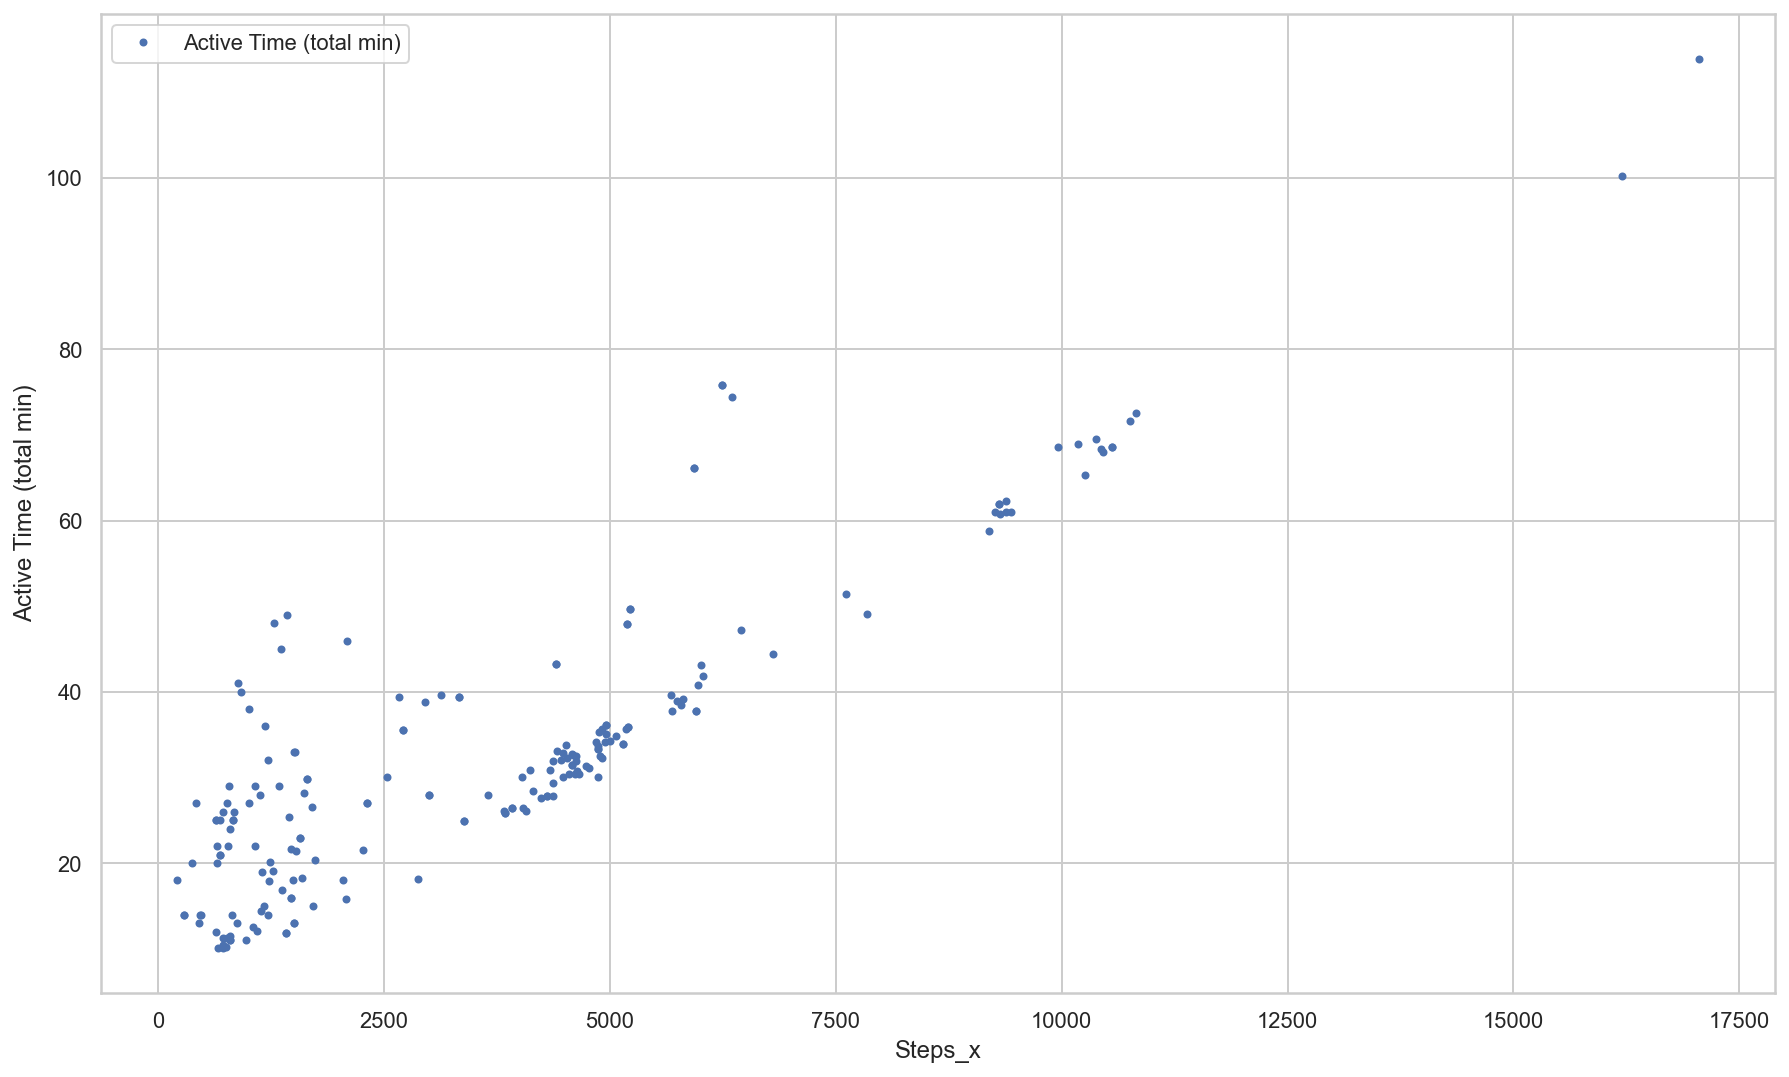

In [371]:
#scatter plotting my steps against my total minutes
axes = df2.plot(x='Steps_x', y='Active Time (total min)', style='.',figsize=(15,9))
y_label = axes.set_ylabel('Active Time (total min)')

In [372]:
df2.corr()

,Distance (mi),Activity Score,Average Heart Rate (bpm),Max Heart Rate (bpm),Steps_x,Calories,Active Time (total min)
Distance (mi),1.000000,0.190975,0.033018,0.034029,0.202666,0.228542,0.245528
Activity Score,0.190975,1.000000,0.806039,0.737296,0.952501,0.960247,0.785162
Average Heart Rate (bpm),0.033018,0.806039,1.000000,0.919624,0.721798,0.739502,0.432904
Max Heart Rate (bpm),0.034029,0.737296,0.919624,1.000000,0.689160,0.696078,0.456758
Steps_x,0.202666,0.952501,0.721798,0.689160,1.000000,0.976647,0.870842
Calories,0.228542,0.960247,0.739502,0.696078,0.976647,1.000000,0.862402
Active Time (total min),0.245528,0.785162,0.432904,0.456758,0.870842,0.862402,1.000000


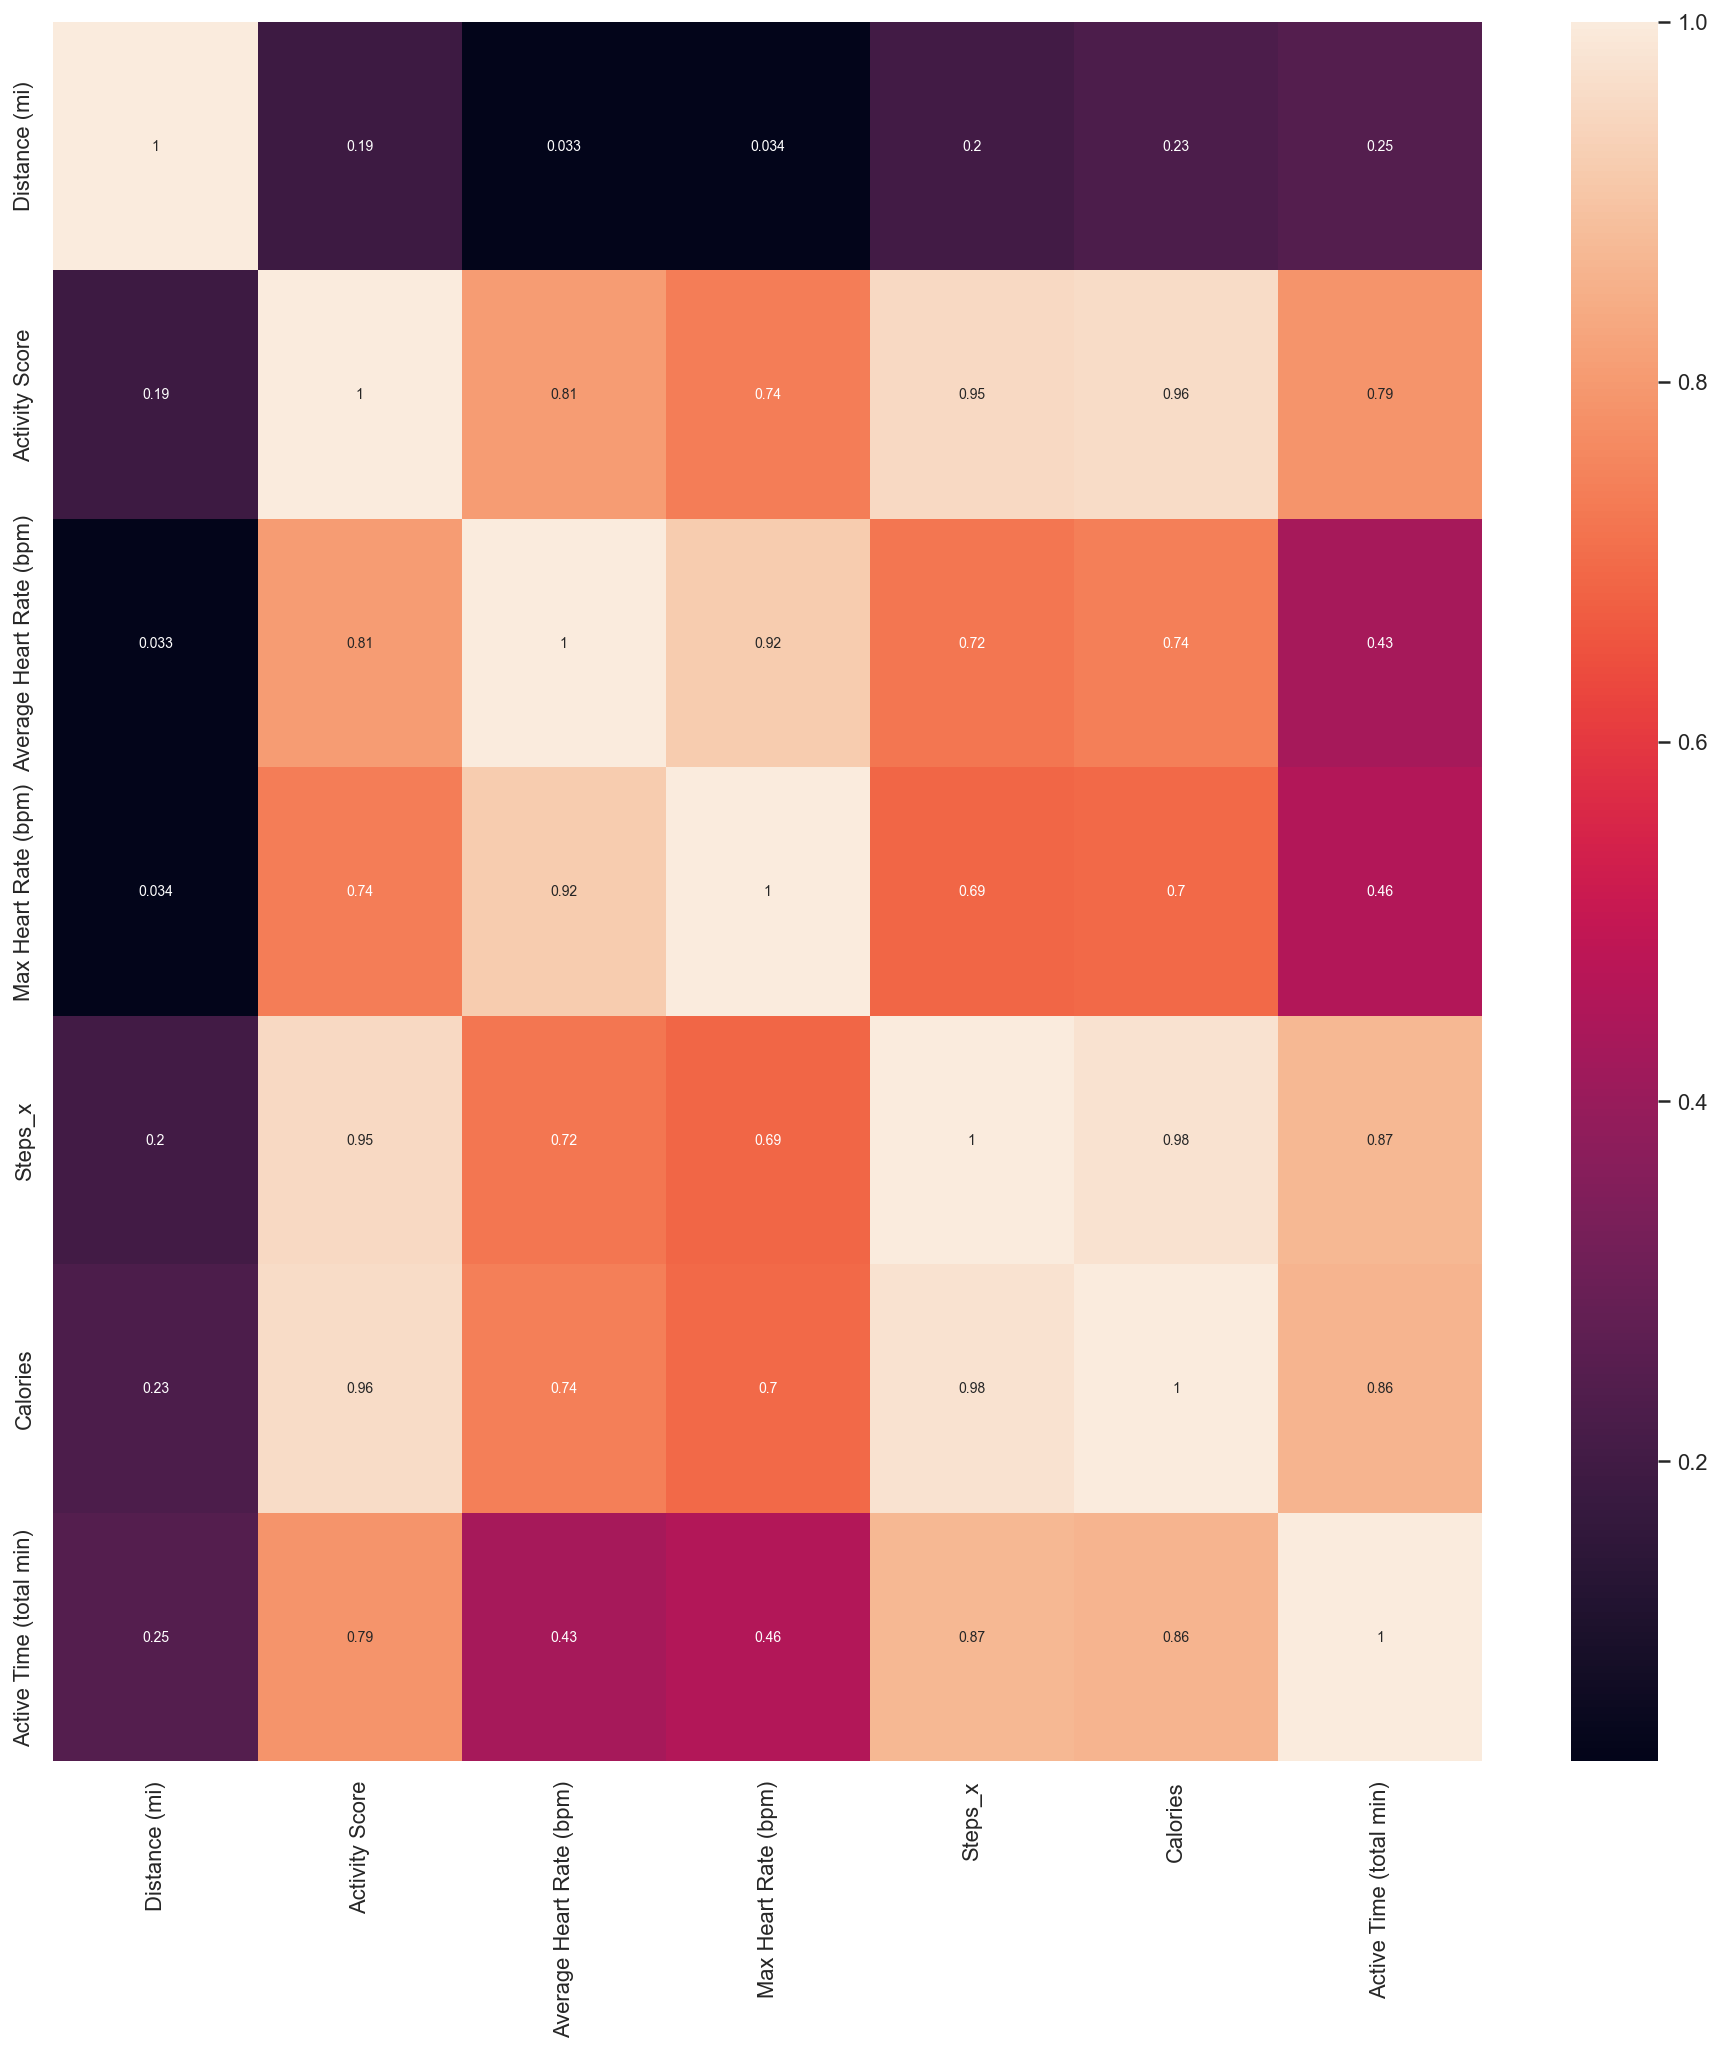

In [373]:
p1 = sns.heatmap(
    df2
    .corr(),
    annot=True,
    annot_kws={"size": 7}
)


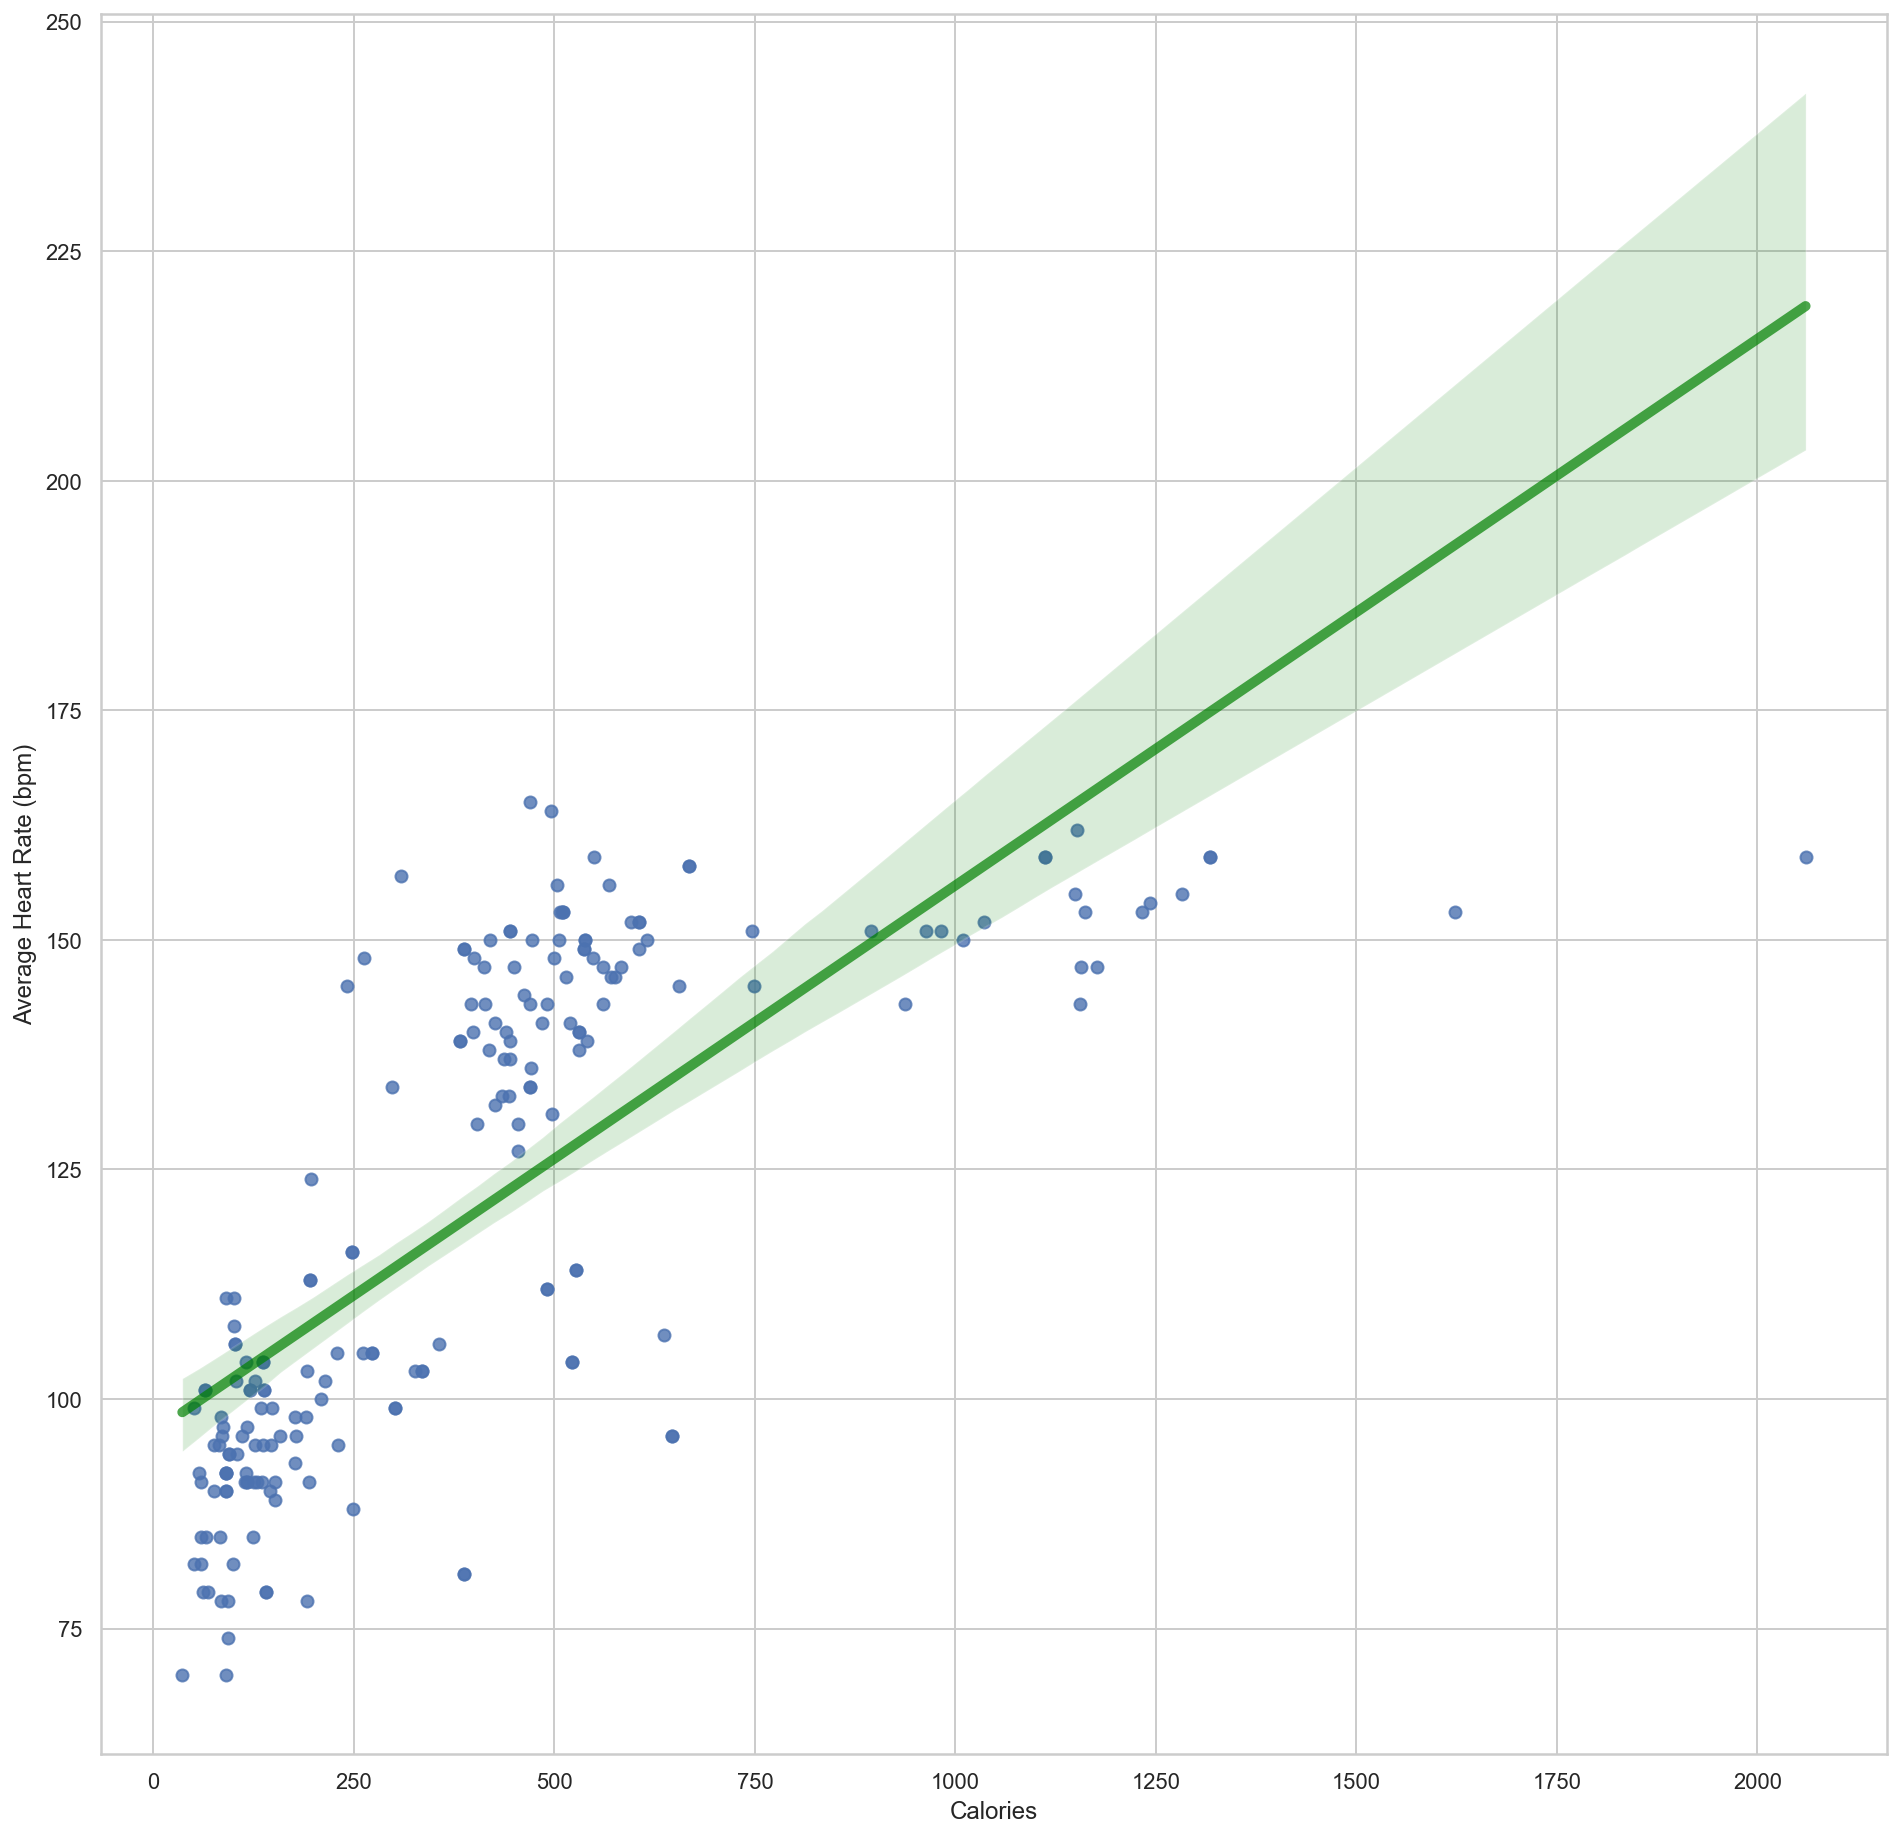

In [374]:
# Calories & Heart Rate
sns.regplot(x=df2["Calories"], y=df2["Average Heart Rate (bpm)"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

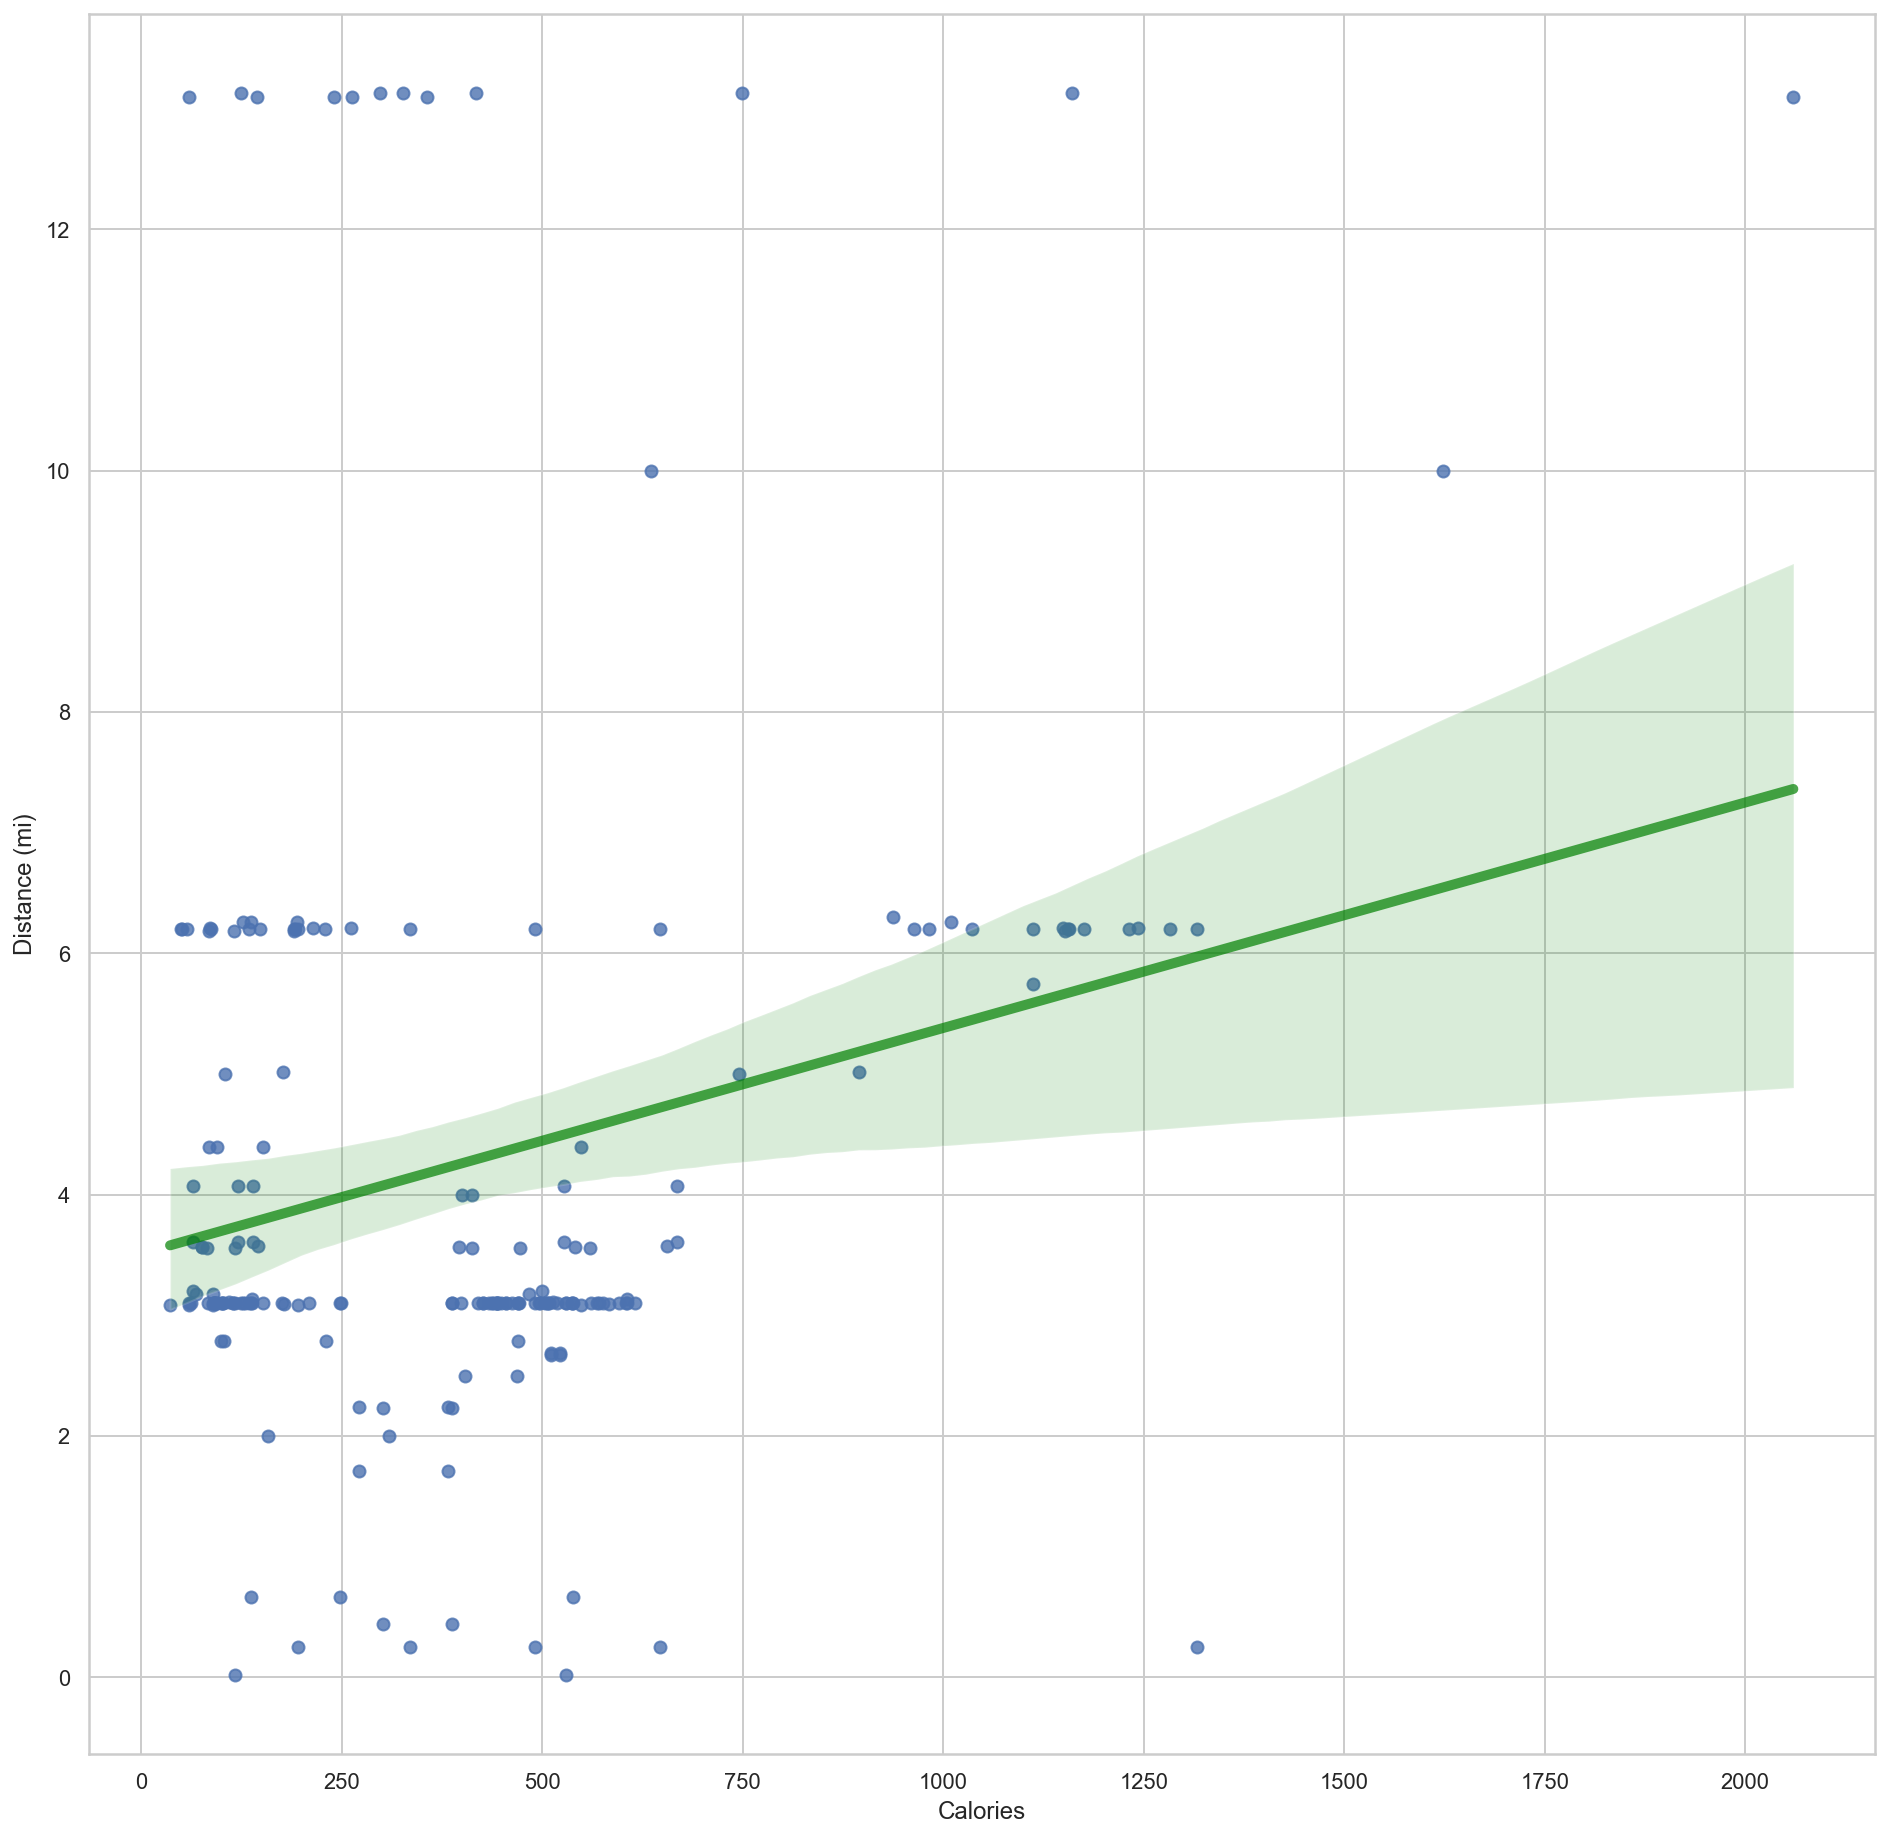

In [375]:
#Calories & Distance
sns.regplot(x=df2["Calories"], y=df2["Distance (mi)"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

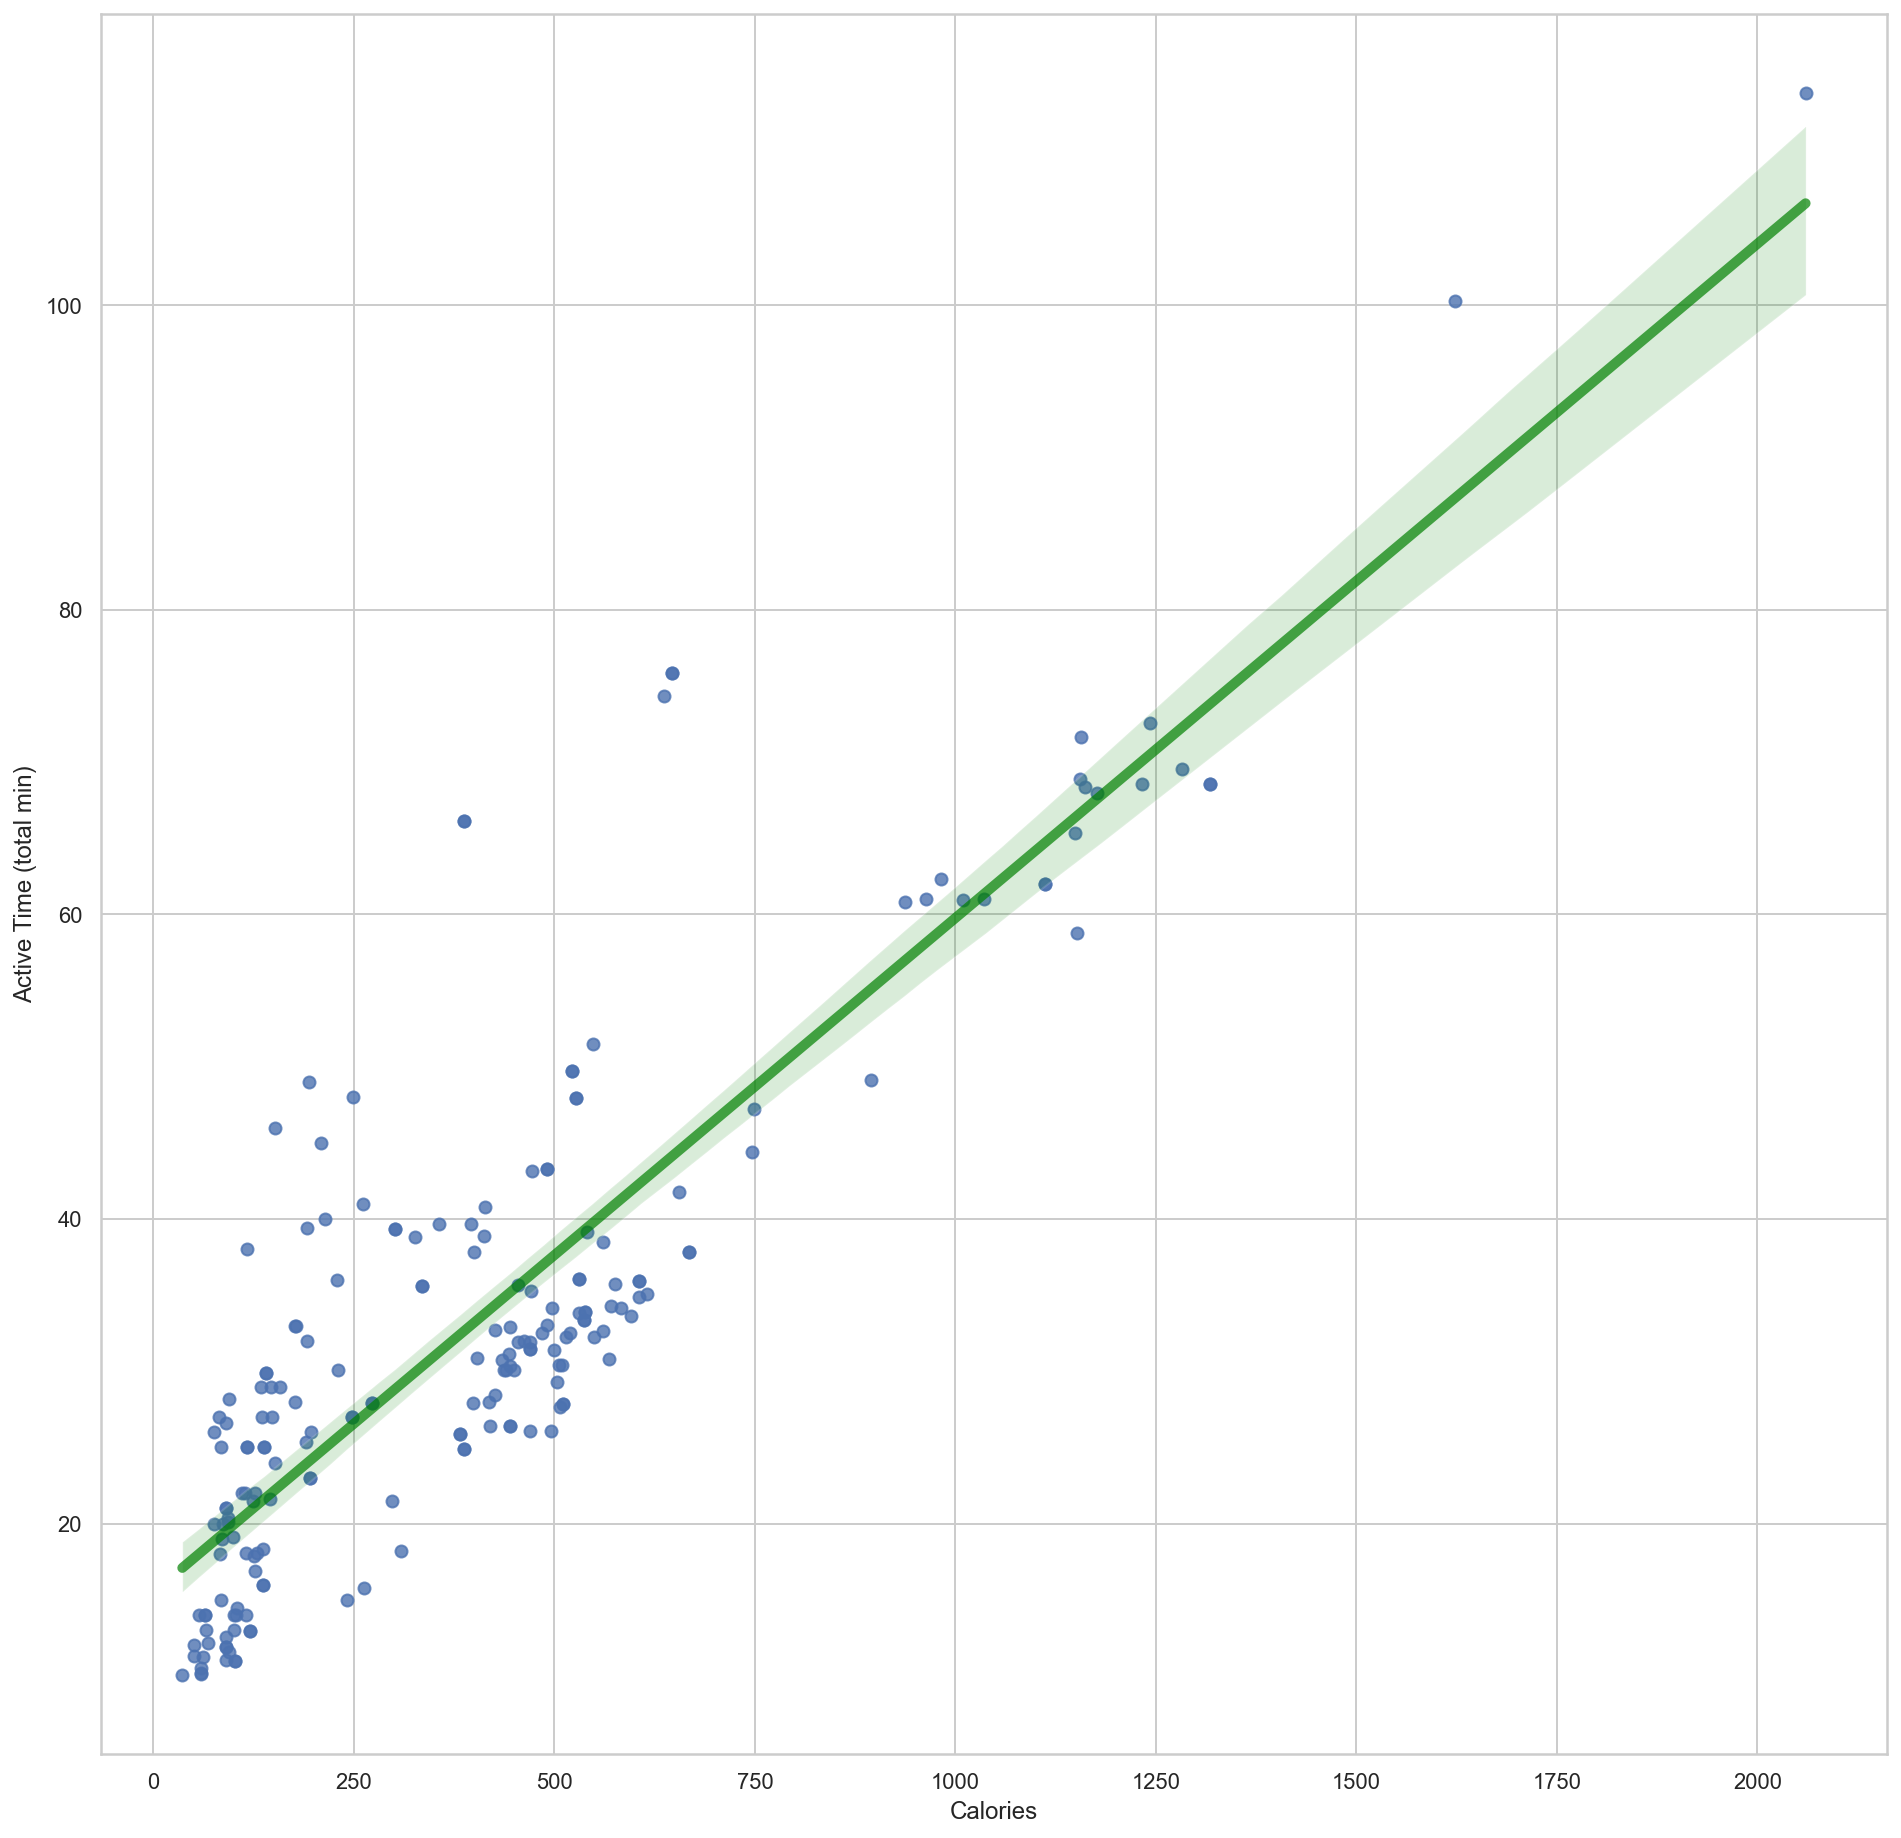

In [376]:
#Minutes & Steps
sns.regplot(x=df2["Calories"], y=df2["Active Time (total min)"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

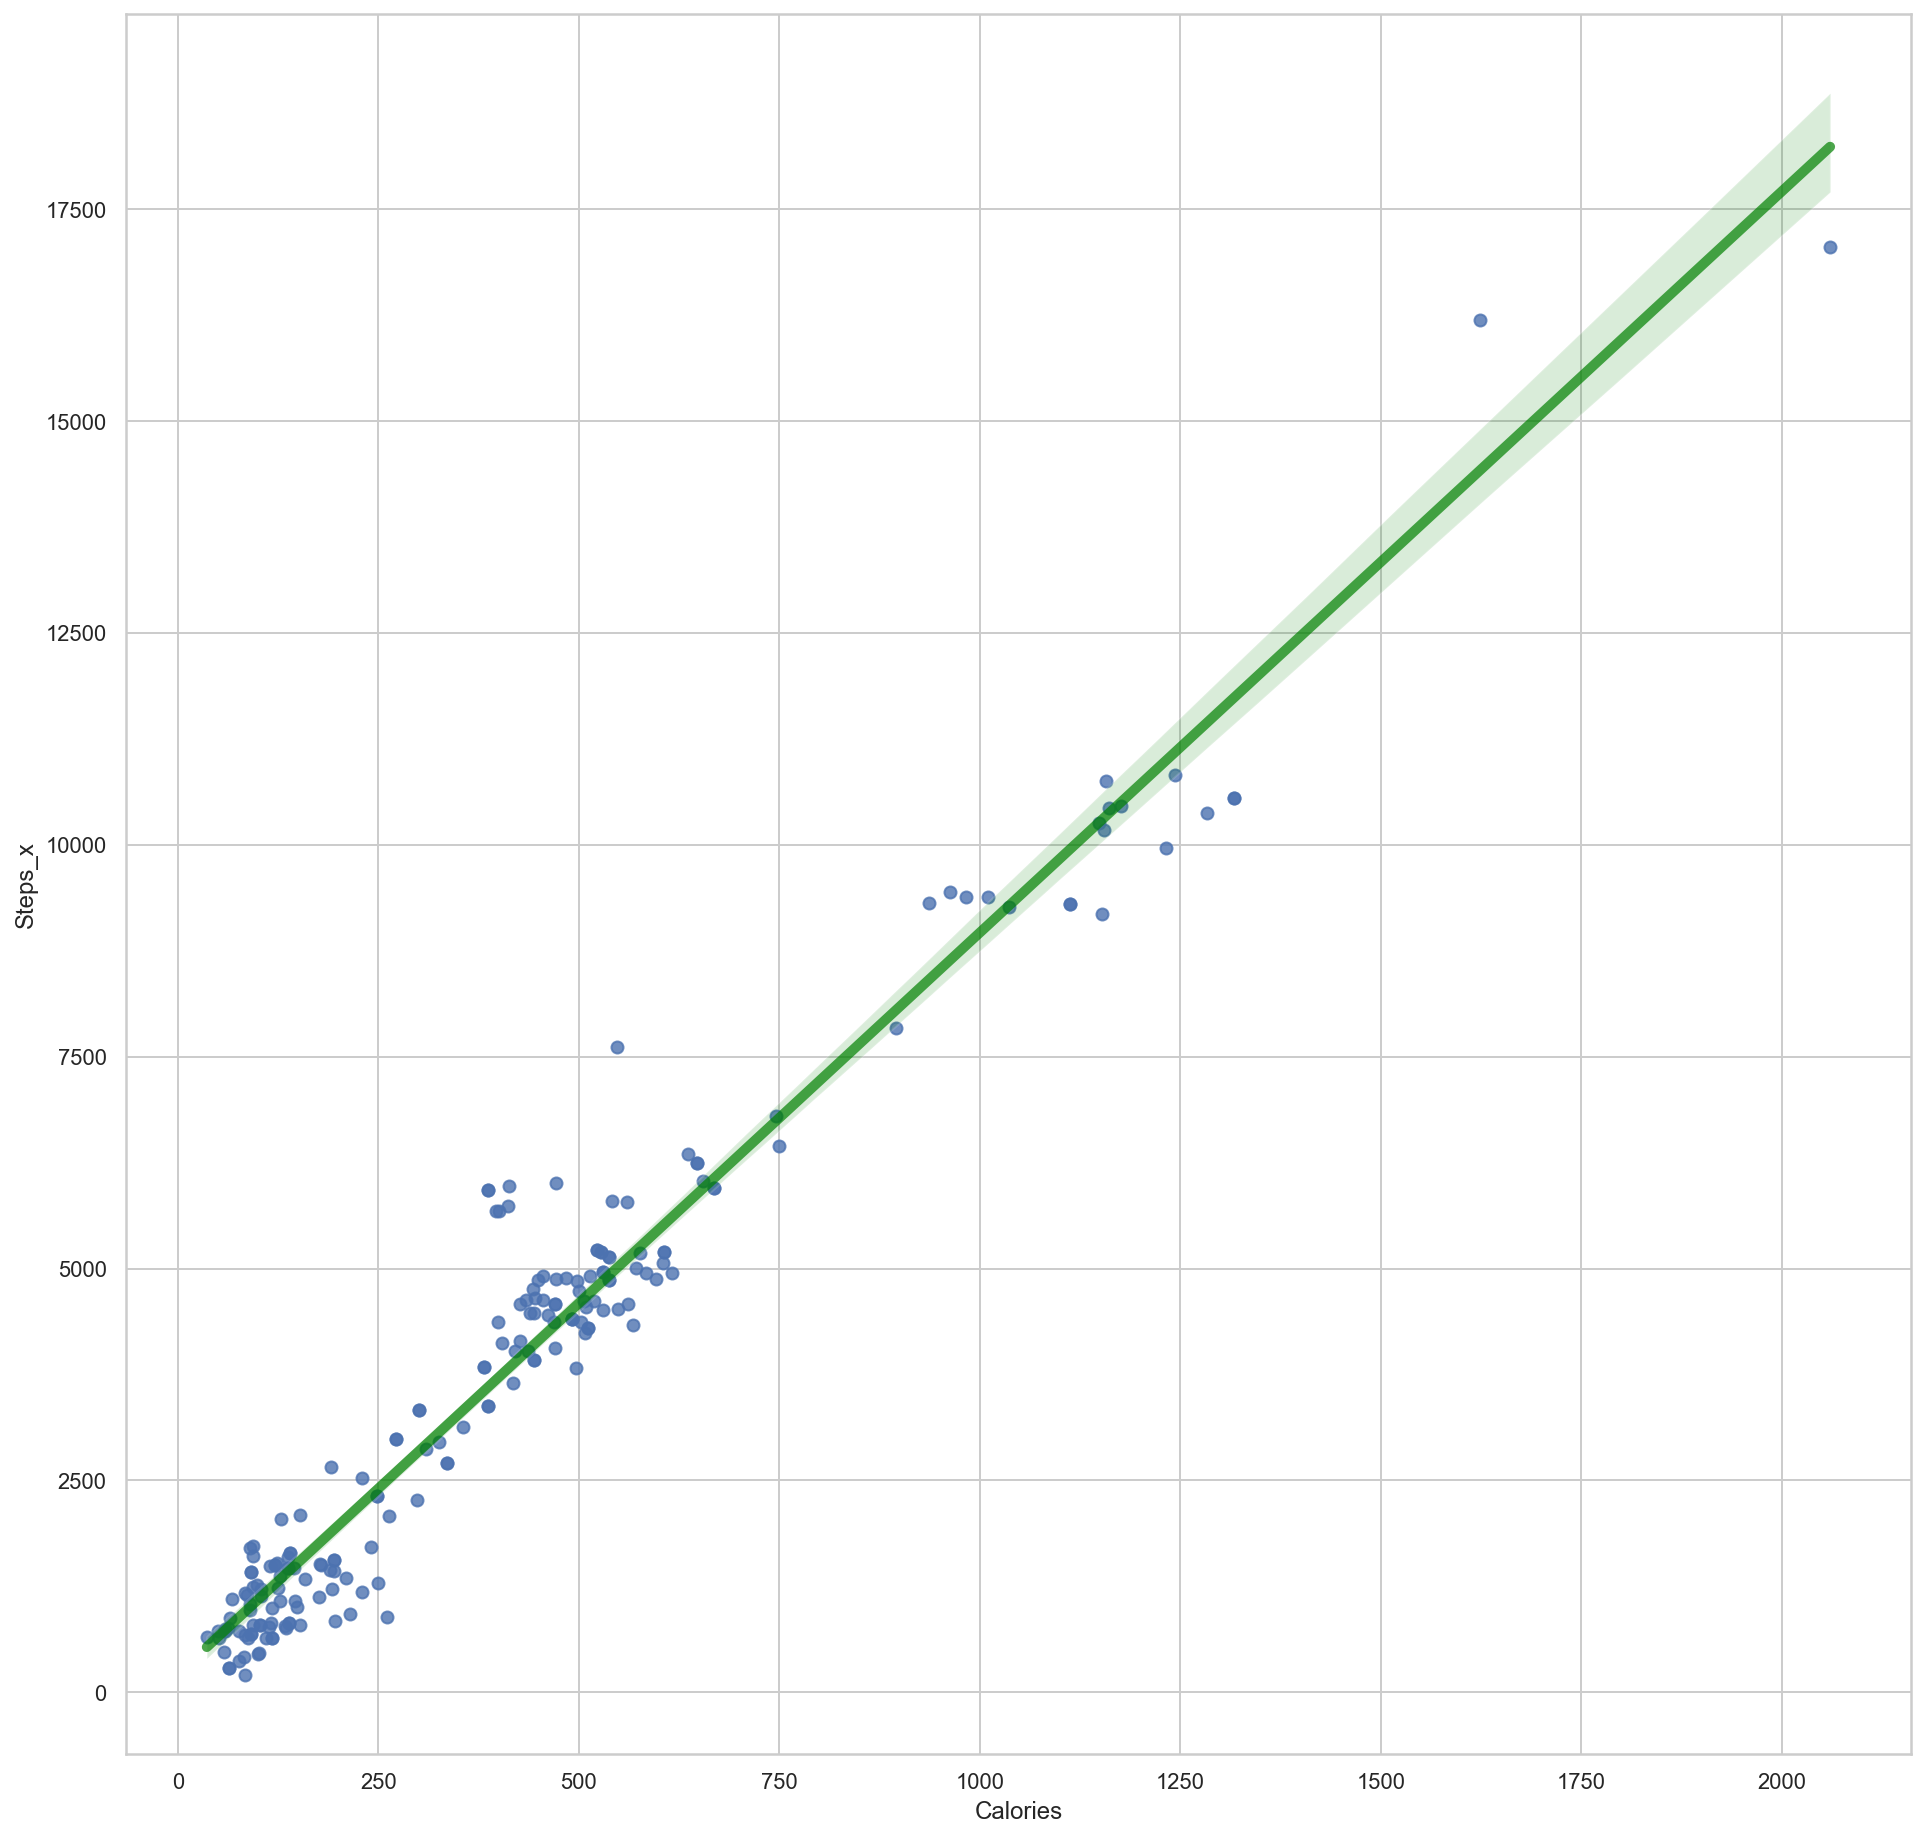

In [377]:
#Calories & Steps
sns.regplot(x=df2["Calories"], y=df2["Steps_x"],
            line_kws={"color": "green", "alpha": 0.7, "lw": 5})
plt.show()

In [378]:
df2.columns

Index(['Workout_Date', 'Distance (mi)', 'Session Subtype', 'Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories', 'Active Time (total min)', 'day_of_week_start'],
      dtype='object')

In [379]:
df_num = df2.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['Calories'][:-1] # -1 means that the latest row is Active Time (total min)
top_features = df_num_corr[abs(df_num_corr) > 0.3].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There are {} strongly correlated values with Distance:\n{}".format(len(top_features), top_features))

There are 5 strongly correlated values with Distance:
Calories                    1.000000
Steps_x                     0.976647
Activity Score              0.960247
Average Heart Rate (bpm)    0.739502
Max Heart Rate (bpm)        0.696078
Name: Calories, dtype: float64


<AxesSubplot:>

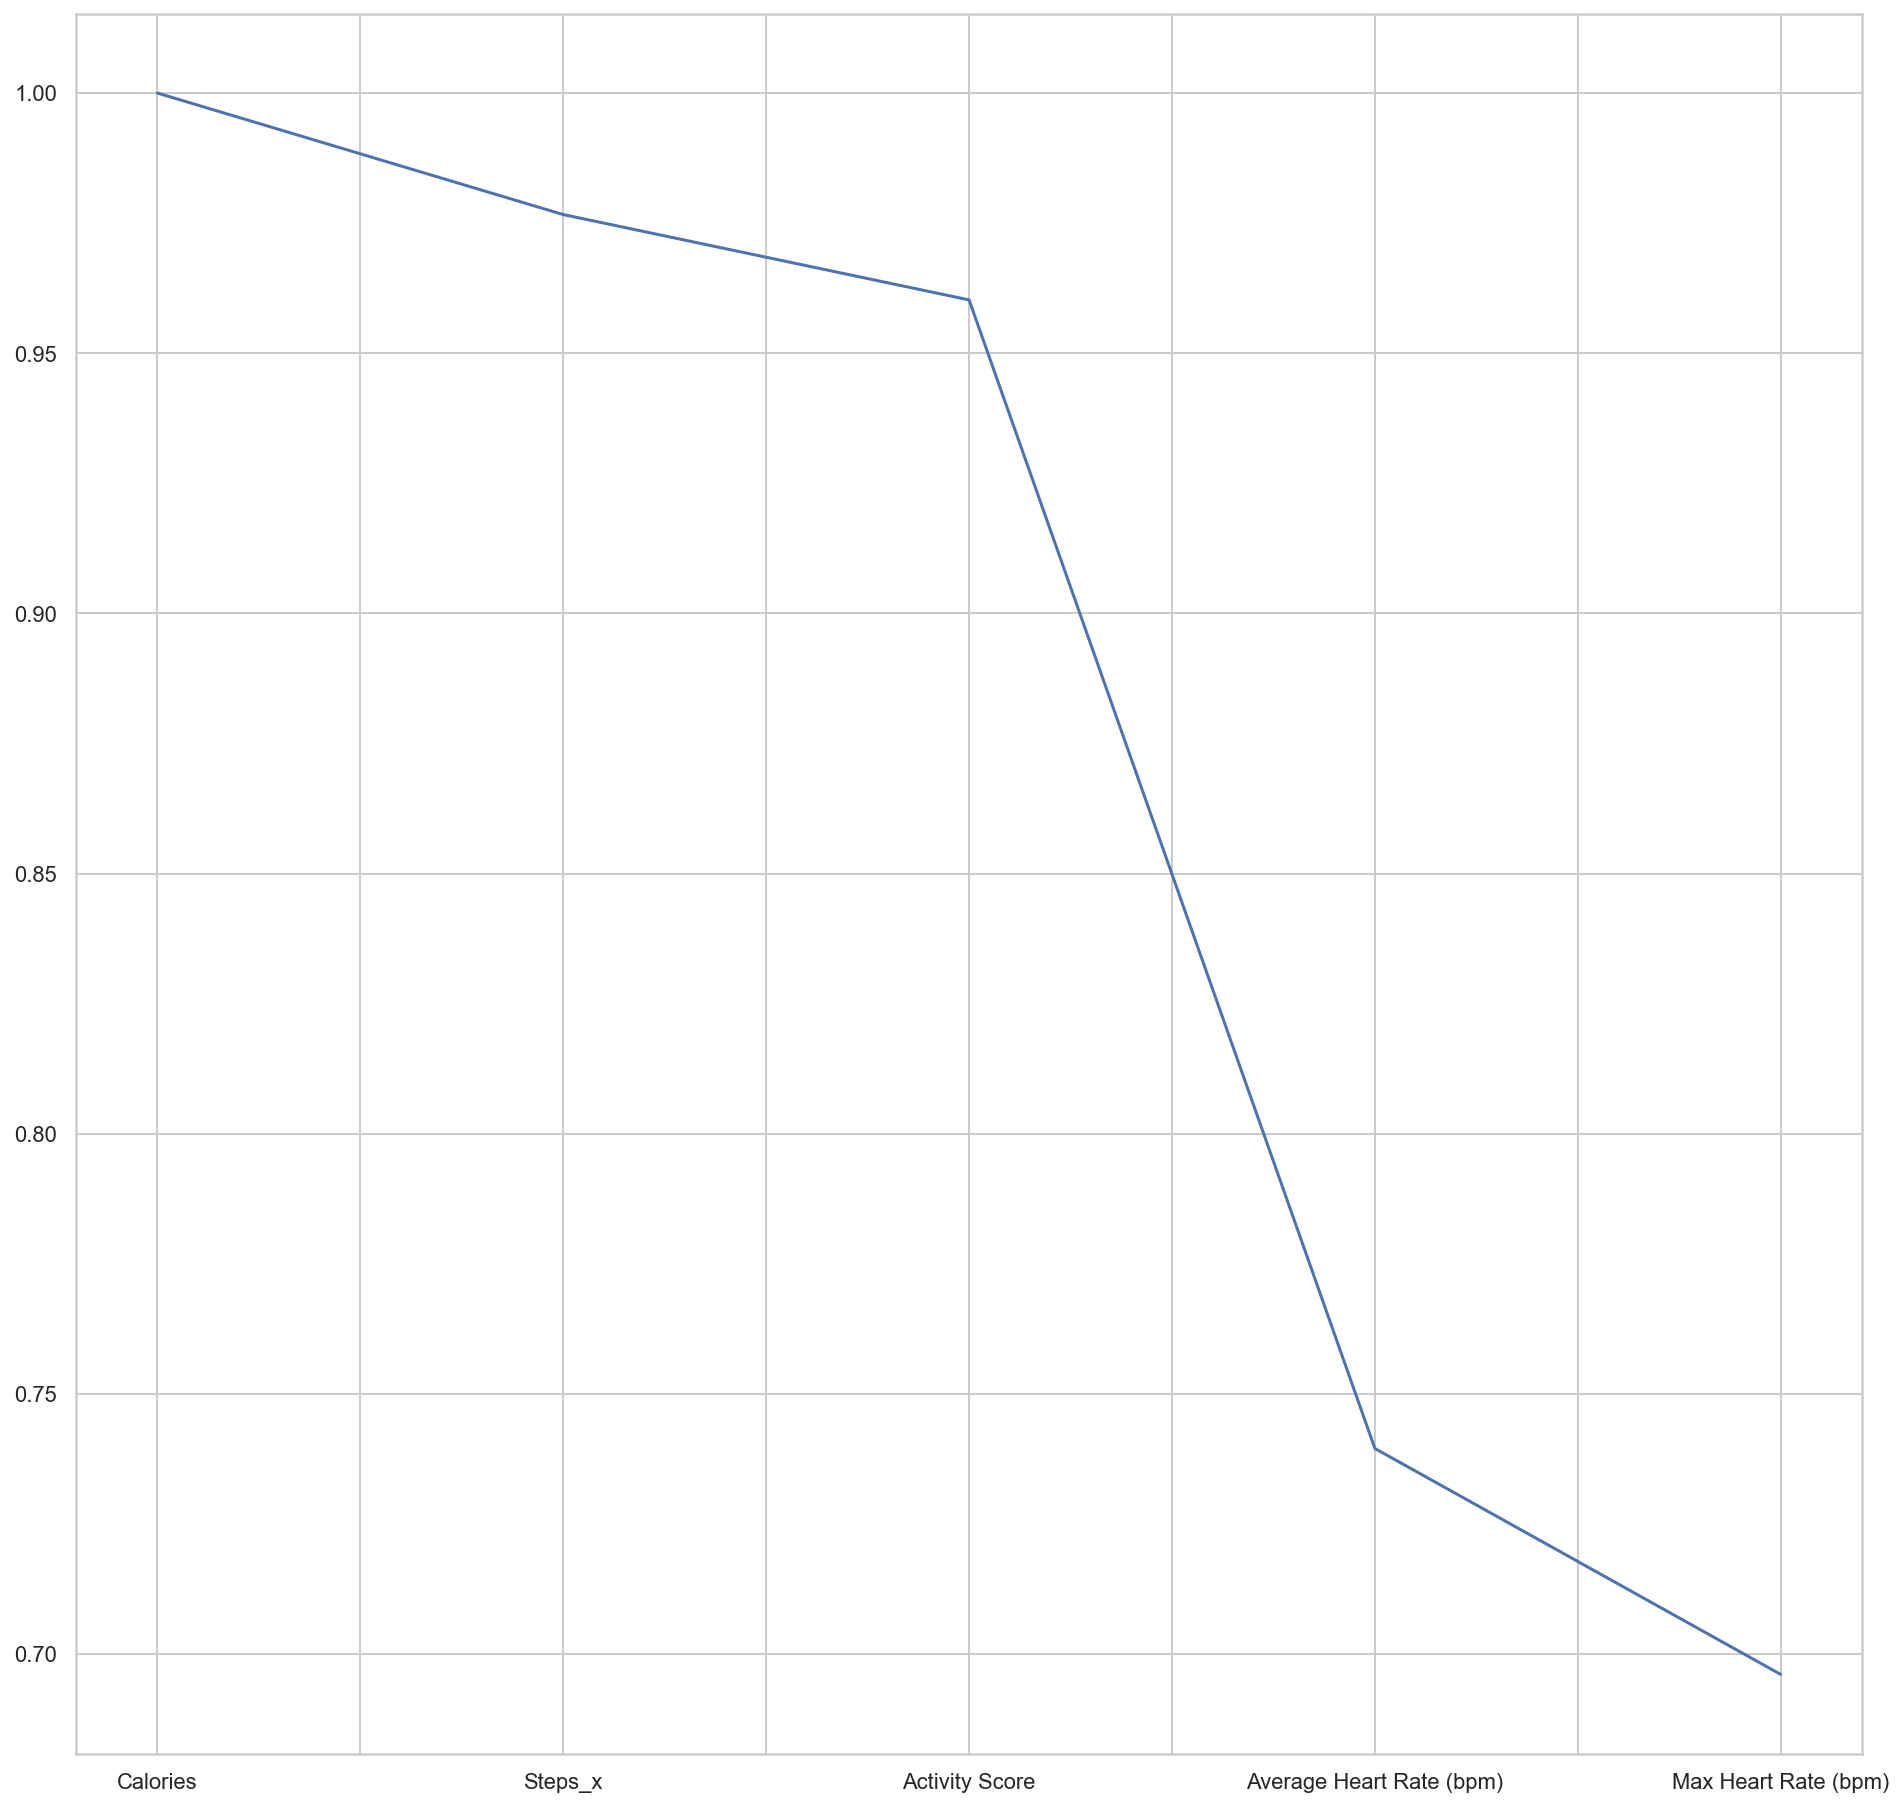

In [380]:
top_features.plot()

Generate pair plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns sns.pairplot() function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.

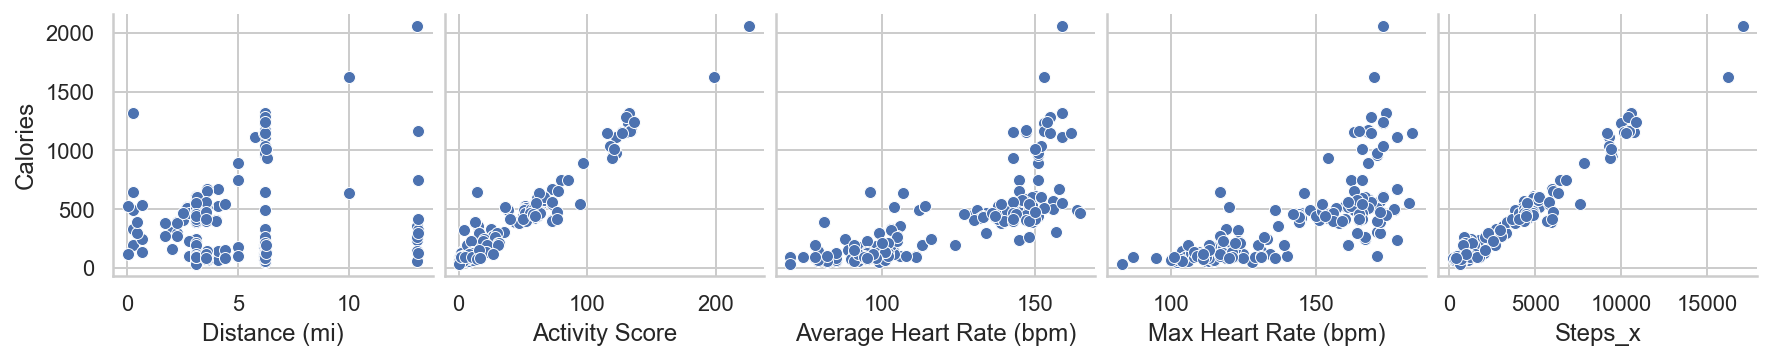

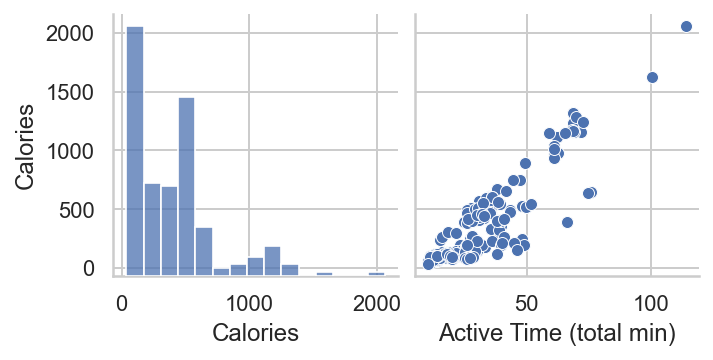

In [381]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Calories'])

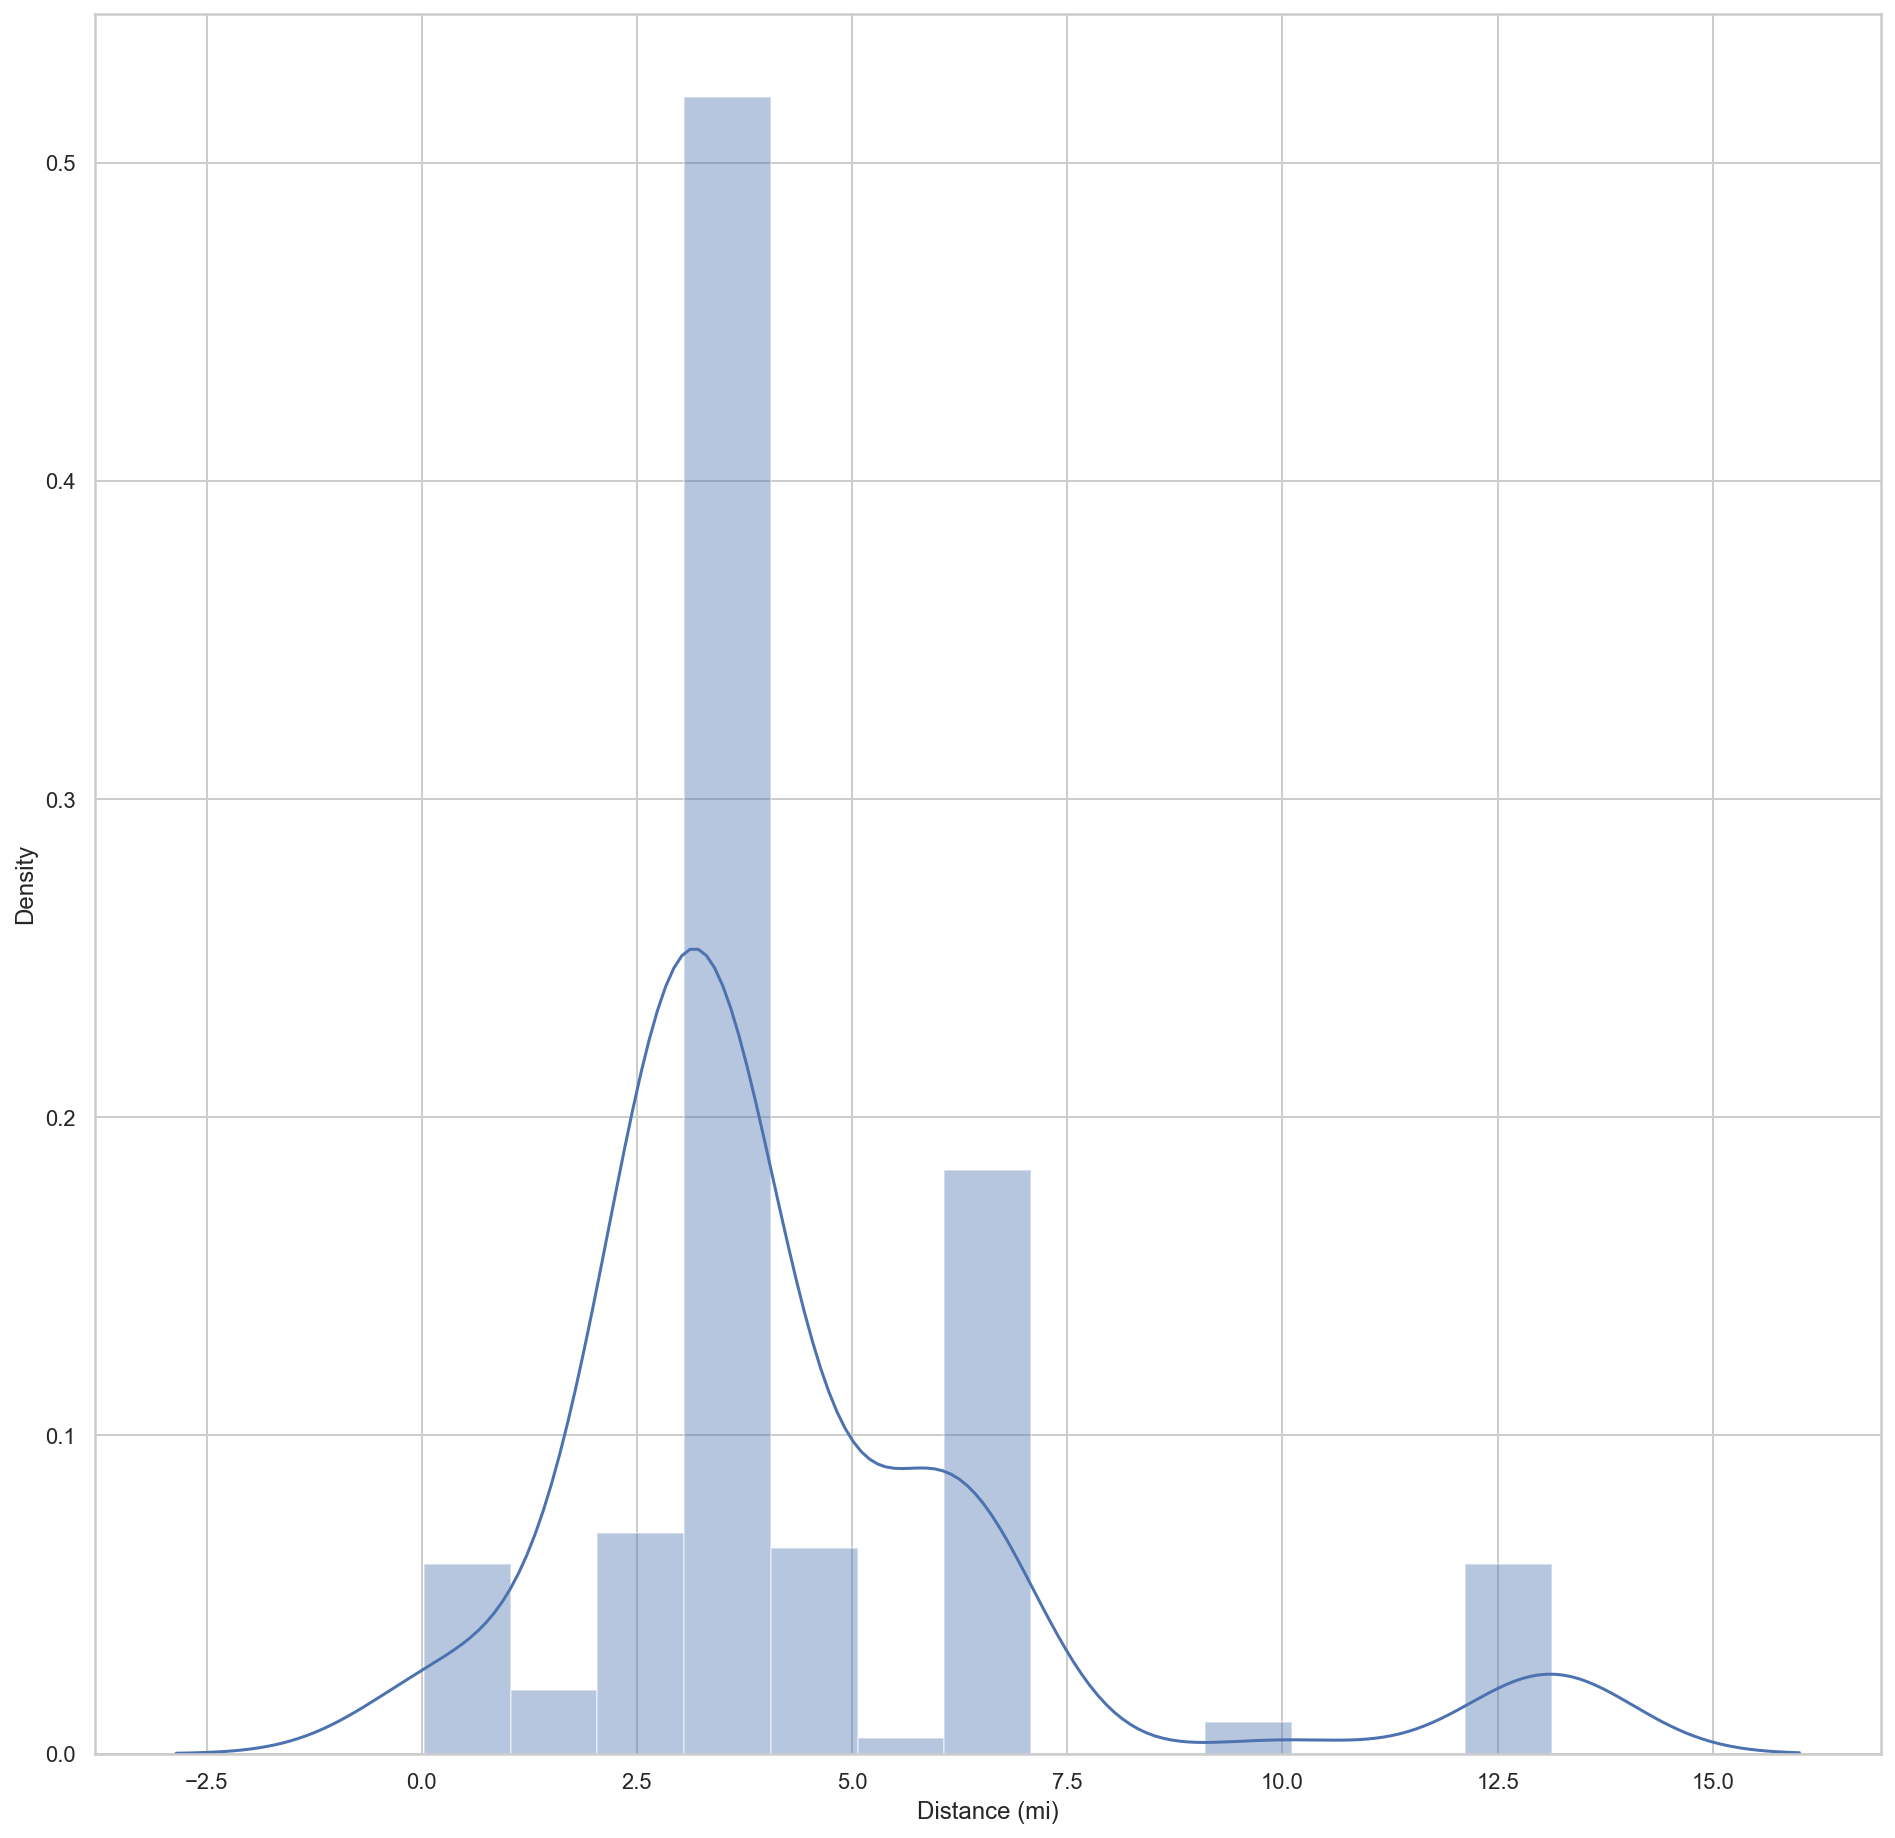

In [382]:
df_untransformed = sns.distplot(df2['Distance (mi)'])

In [383]:
print("Skewness: %f" % df2['Distance (mi)'].skew())

Skewness: 1.905101


In [384]:
log_transformed = np.log(df2['Distance (mi)'])

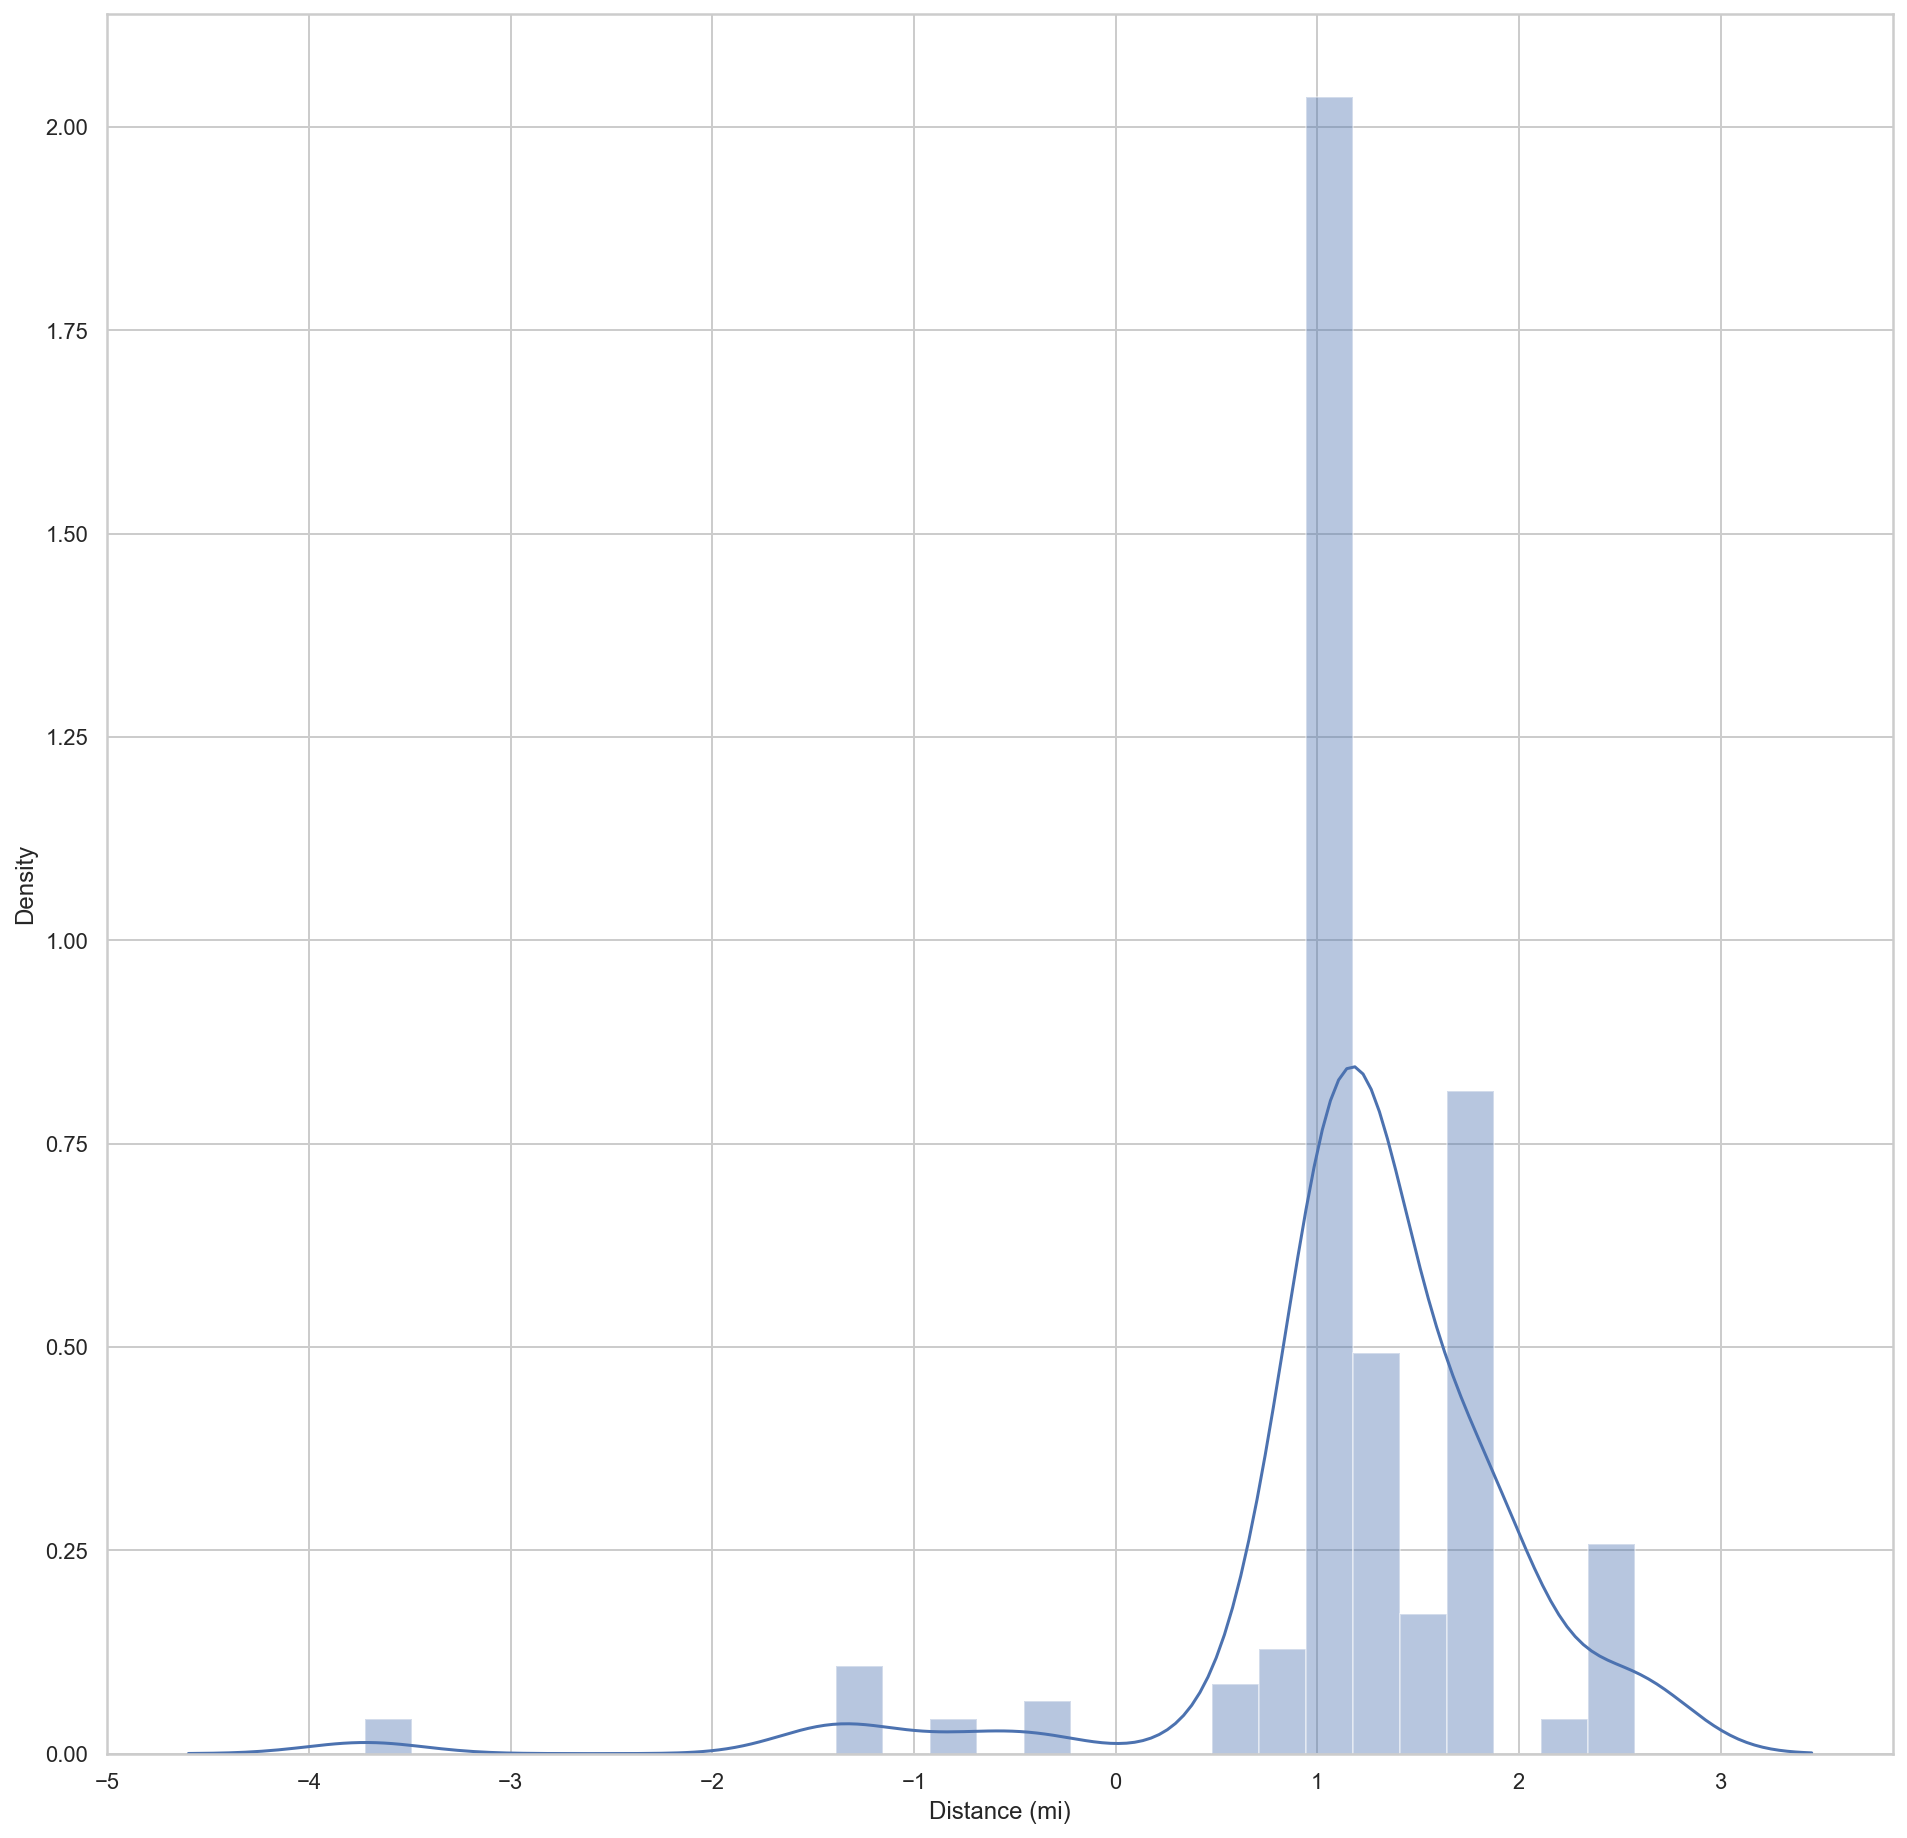

In [385]:
df_transformed = sns.distplot(log_transformed)

In [386]:
print("Skewness: %f" % (log_transformed).skew())

Skewness: -2.705033


In [387]:
norm_data = MinMaxScaler().fit_transform(df_num)
norm_data

array([[0.23468932, 0.25561175, 0.67368421, ..., 0.25972099, 0.21442688,
        0.20560478],
       [0.23468932, 0.25561175, 0.67368421, ..., 0.25972099, 0.21442688,
        0.20560478],
       [0.23479767, 0.25419217, 0.63157895, ..., 0.26215494, 0.20701581,
        0.21022727],
       ...,
       [0.26951744, 0.33648301, 0.84210526, ..., 0.34413773, 0.21541502,
        0.31818182],
       [0.26951286, 0.07057936, 0.26315789, ..., 0.01252597, 0.02272727,
        0.16284669],
       [0.26951286, 0.33745897, 0.76842105, ..., 0.34247551, 0.18626482,
        0.29574345]])

In [388]:
scaled_data = StandardScaler().fit_transform(df_num)
scaled_data

array([[-0.42339292,  0.35748499,  0.49792168, ...,  0.27483933,
         0.19533147, -0.11225901],
       [-0.42339292,  0.35748499,  0.49792168, ...,  0.27483933,
         0.19533147, -0.11225901],
       [-0.42287855,  0.34938742,  0.35071646, ...,  0.28839744,
         0.1509043 , -0.08456495],
       ...,
       [-0.25805192,  0.8187935 ,  1.0867426 , ...,  0.74507411,
         0.2012551 ,  0.56220664],
       [-0.25807366, -0.6979828 , -0.93732929, ..., -1.10213508,
        -0.95385142, -0.36842902],
       [-0.25807366,  0.82436058,  0.82913345, ...,  0.73581492,
         0.02650821,  0.42777508]])

<AxesSubplot:xlabel='Distance (mi)'>

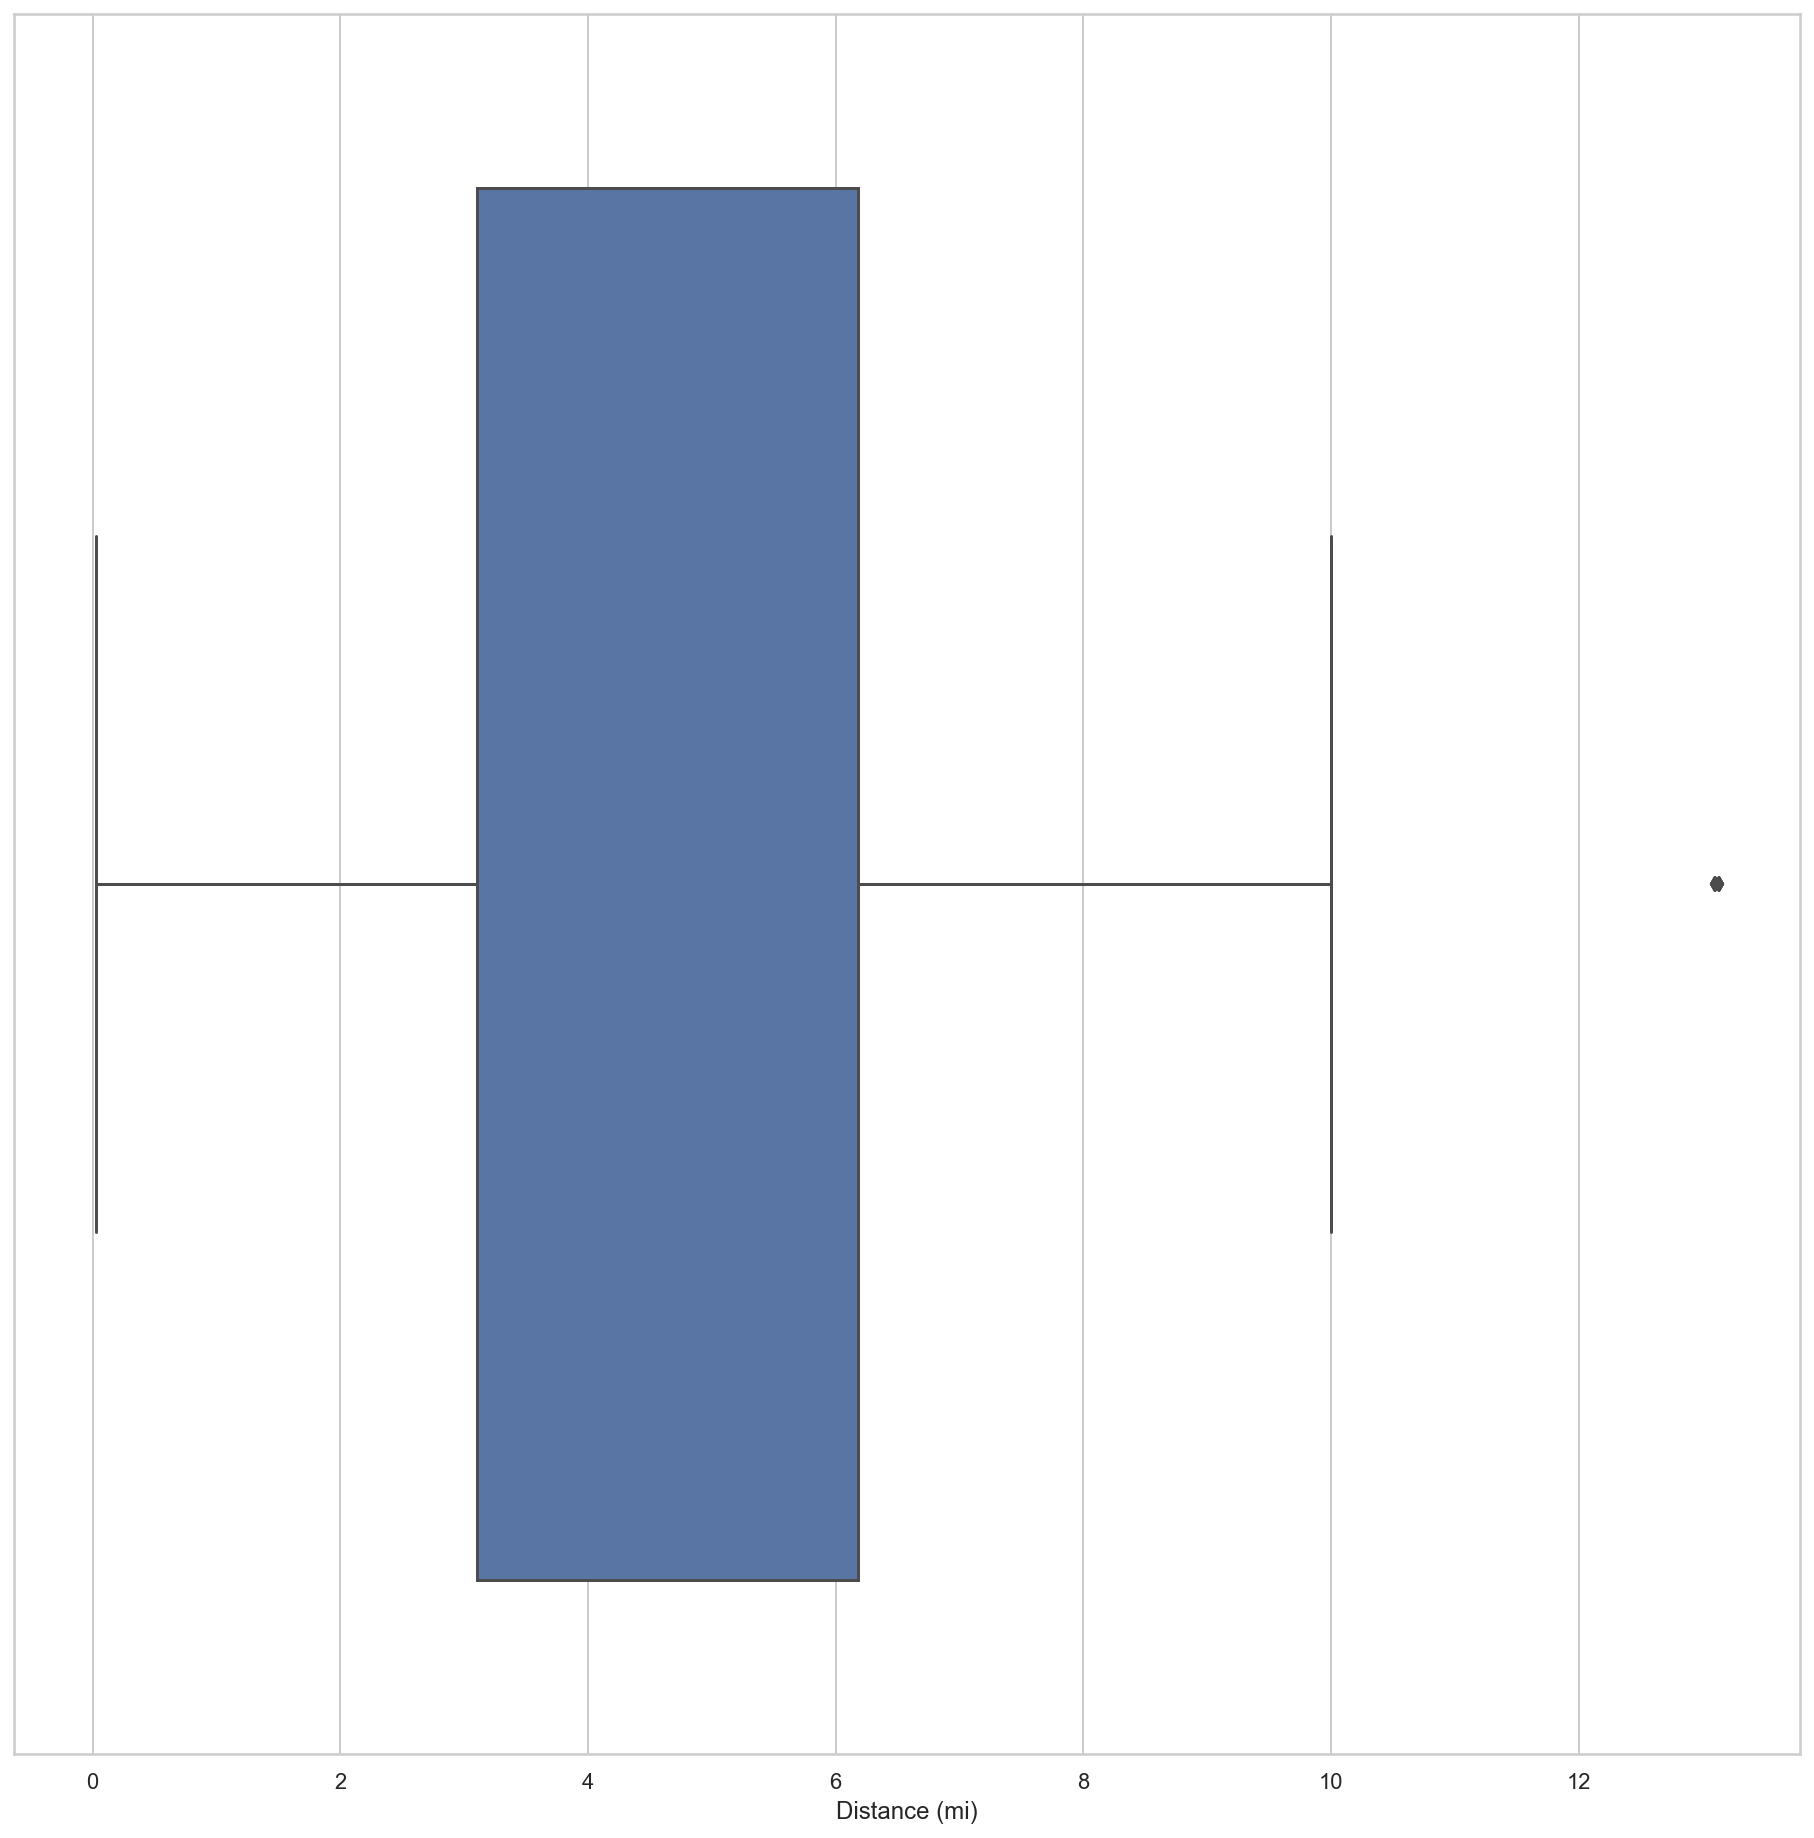

In [389]:
sns.boxplot(x=df2['Distance (mi)'])

<AxesSubplot:xlabel='Steps_x'>

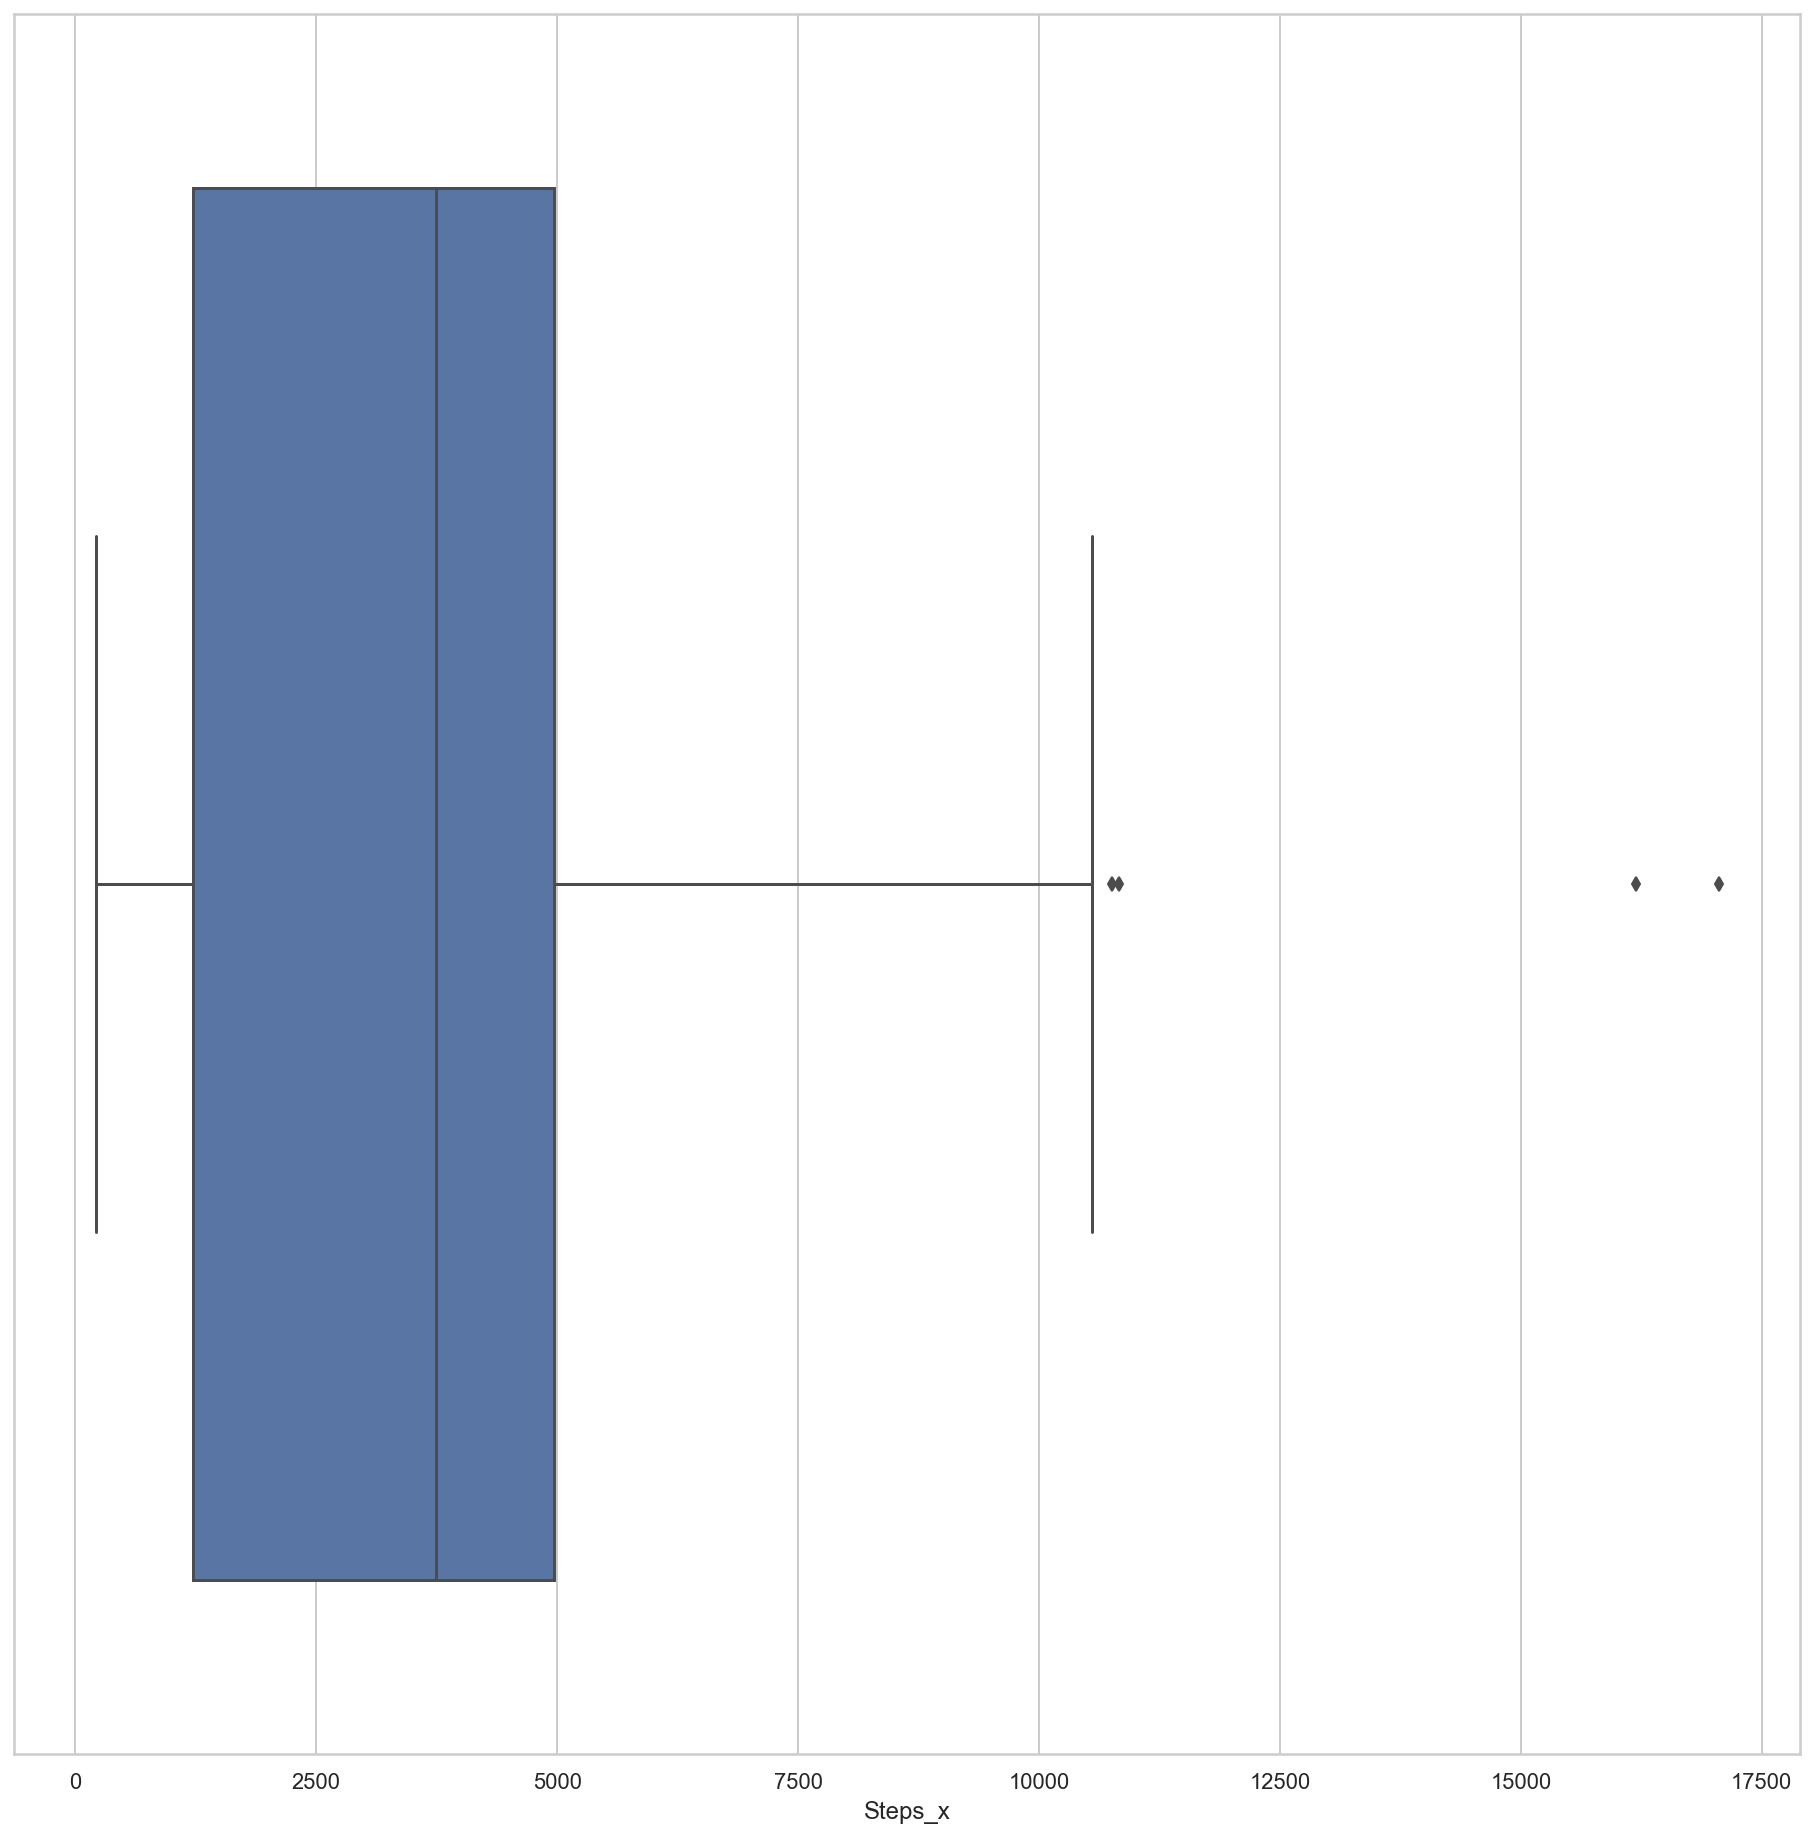

In [390]:
sns.boxplot(x=df2['Steps_x'])

<AxesSubplot:xlabel='Average Heart Rate (bpm)'>

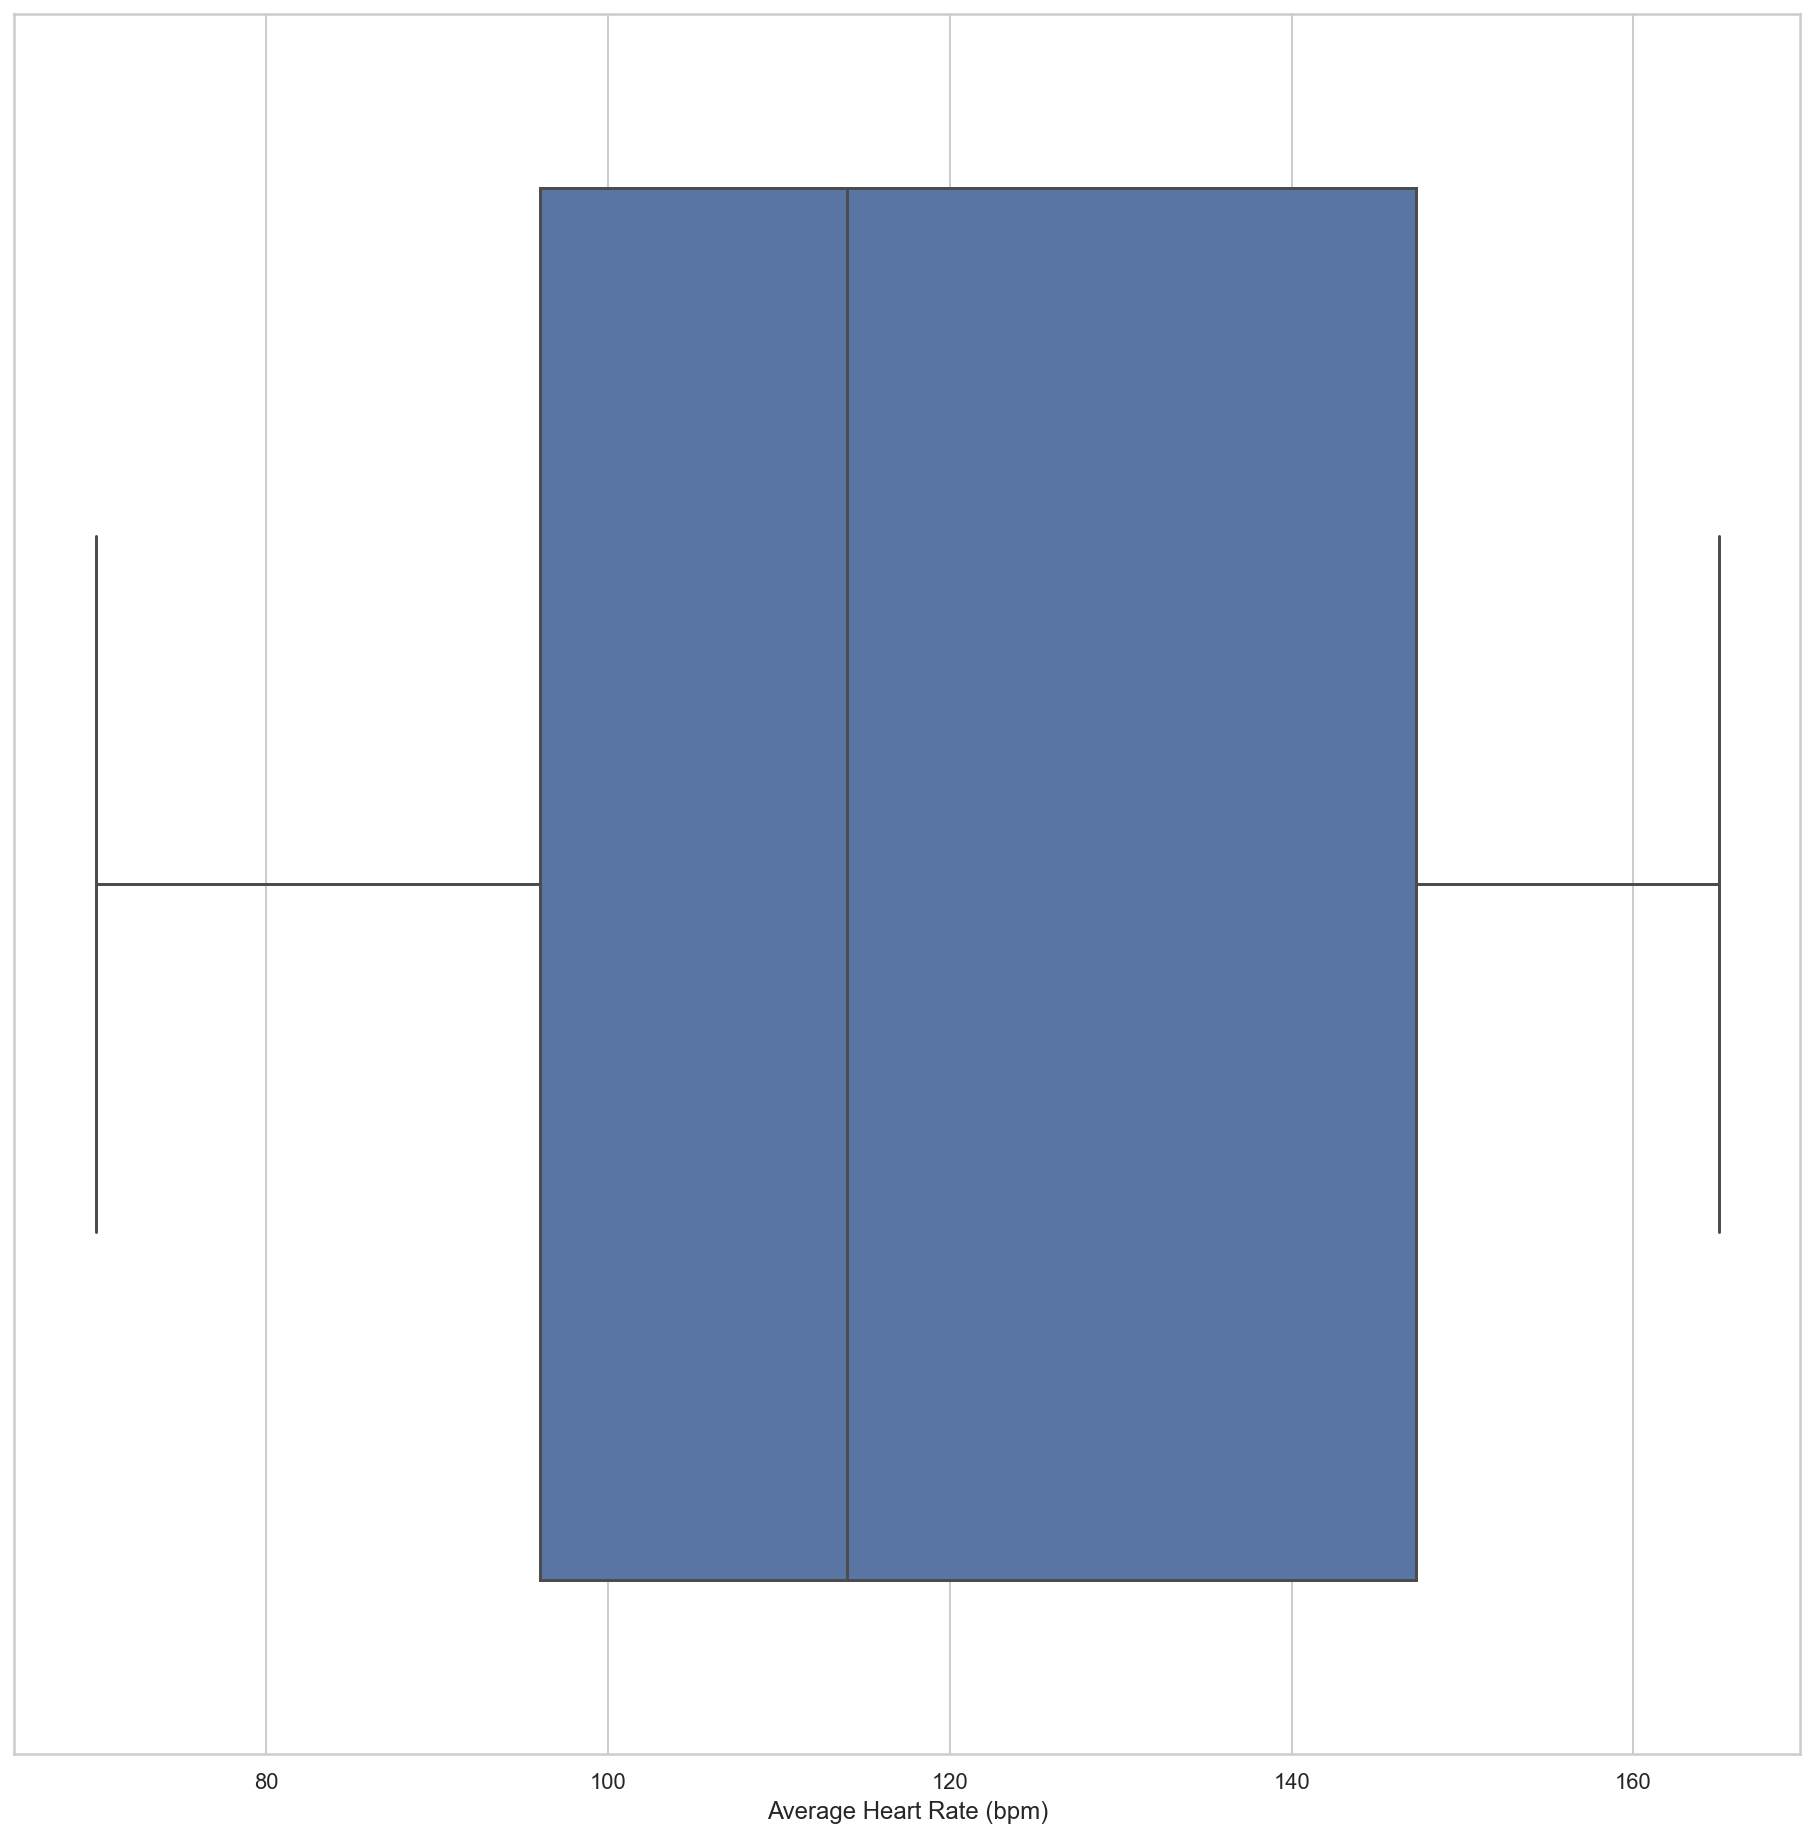

In [391]:
sns.boxplot(x=df2['Average Heart Rate (bpm)'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


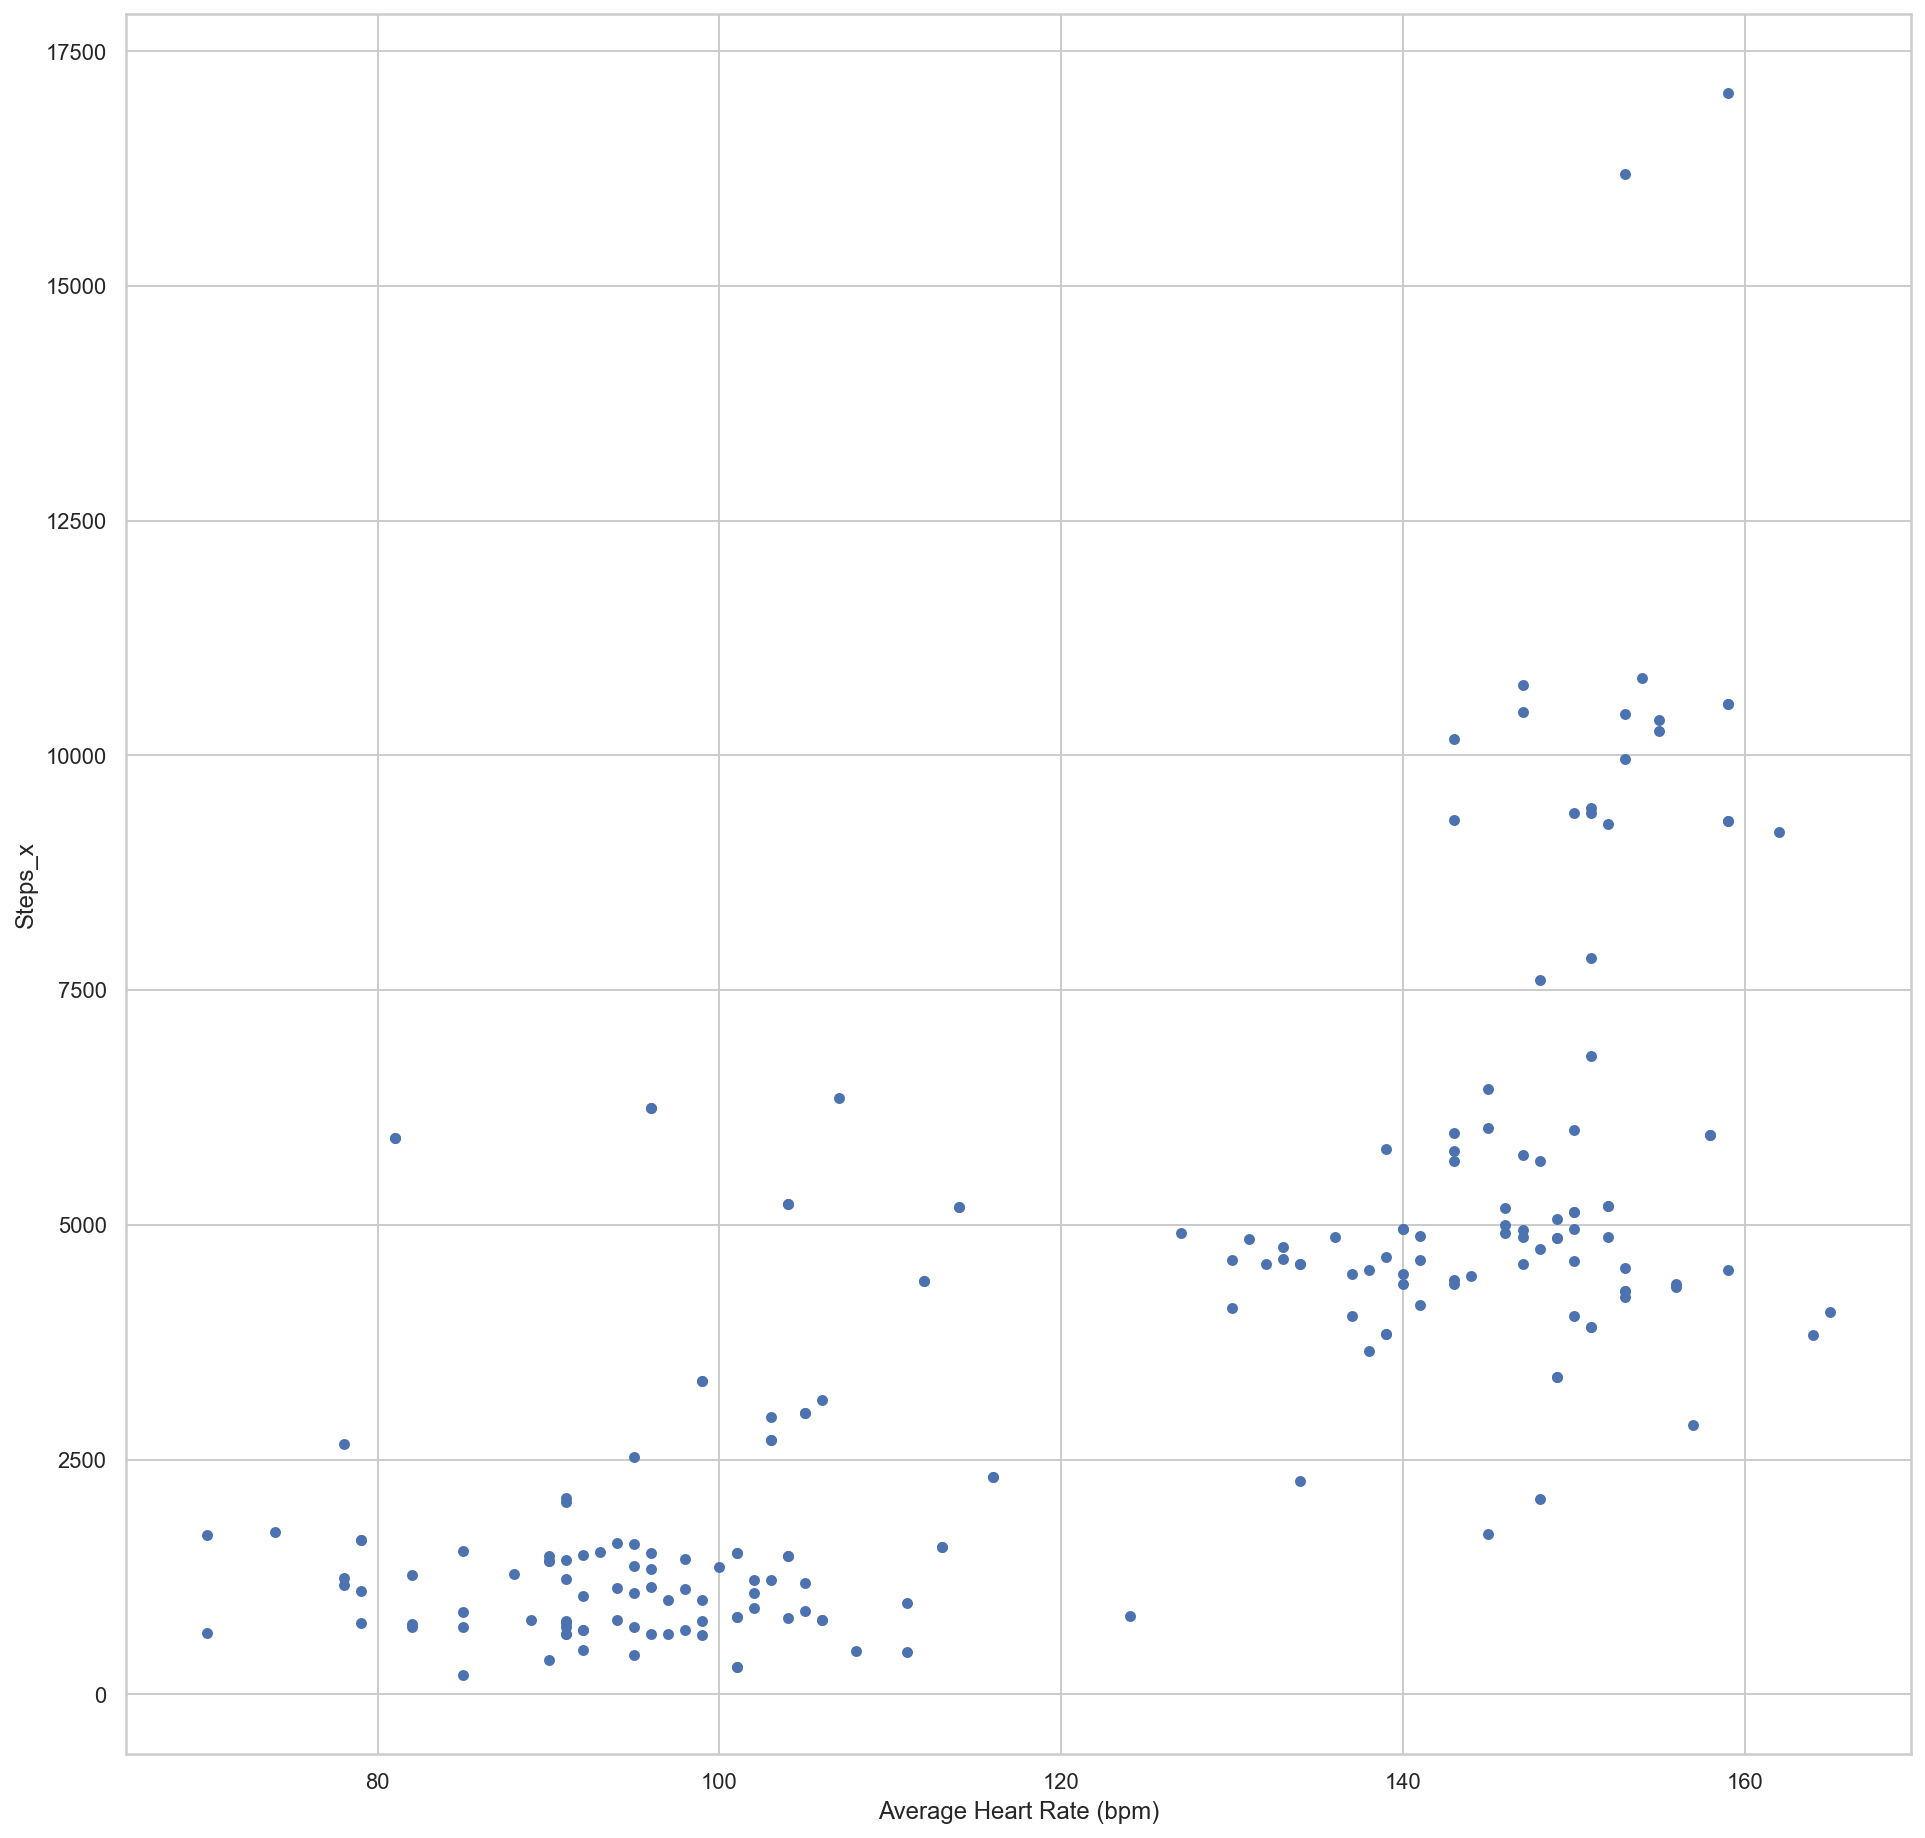

In [392]:
scat_area = df2.plot.scatter(x='Average Heart Rate (bpm)',
                      y='Steps_x')

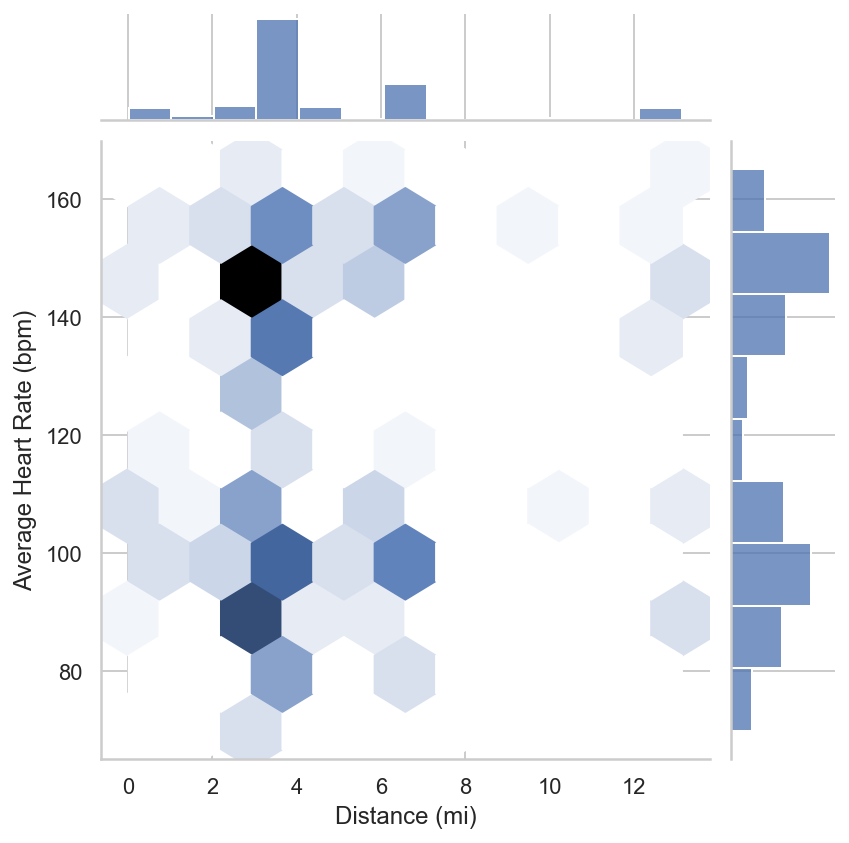

In [393]:
sns.jointplot(x=df2['Distance (mi)'],
y=df2['Average Heart Rate (bpm)'], kind='hex')

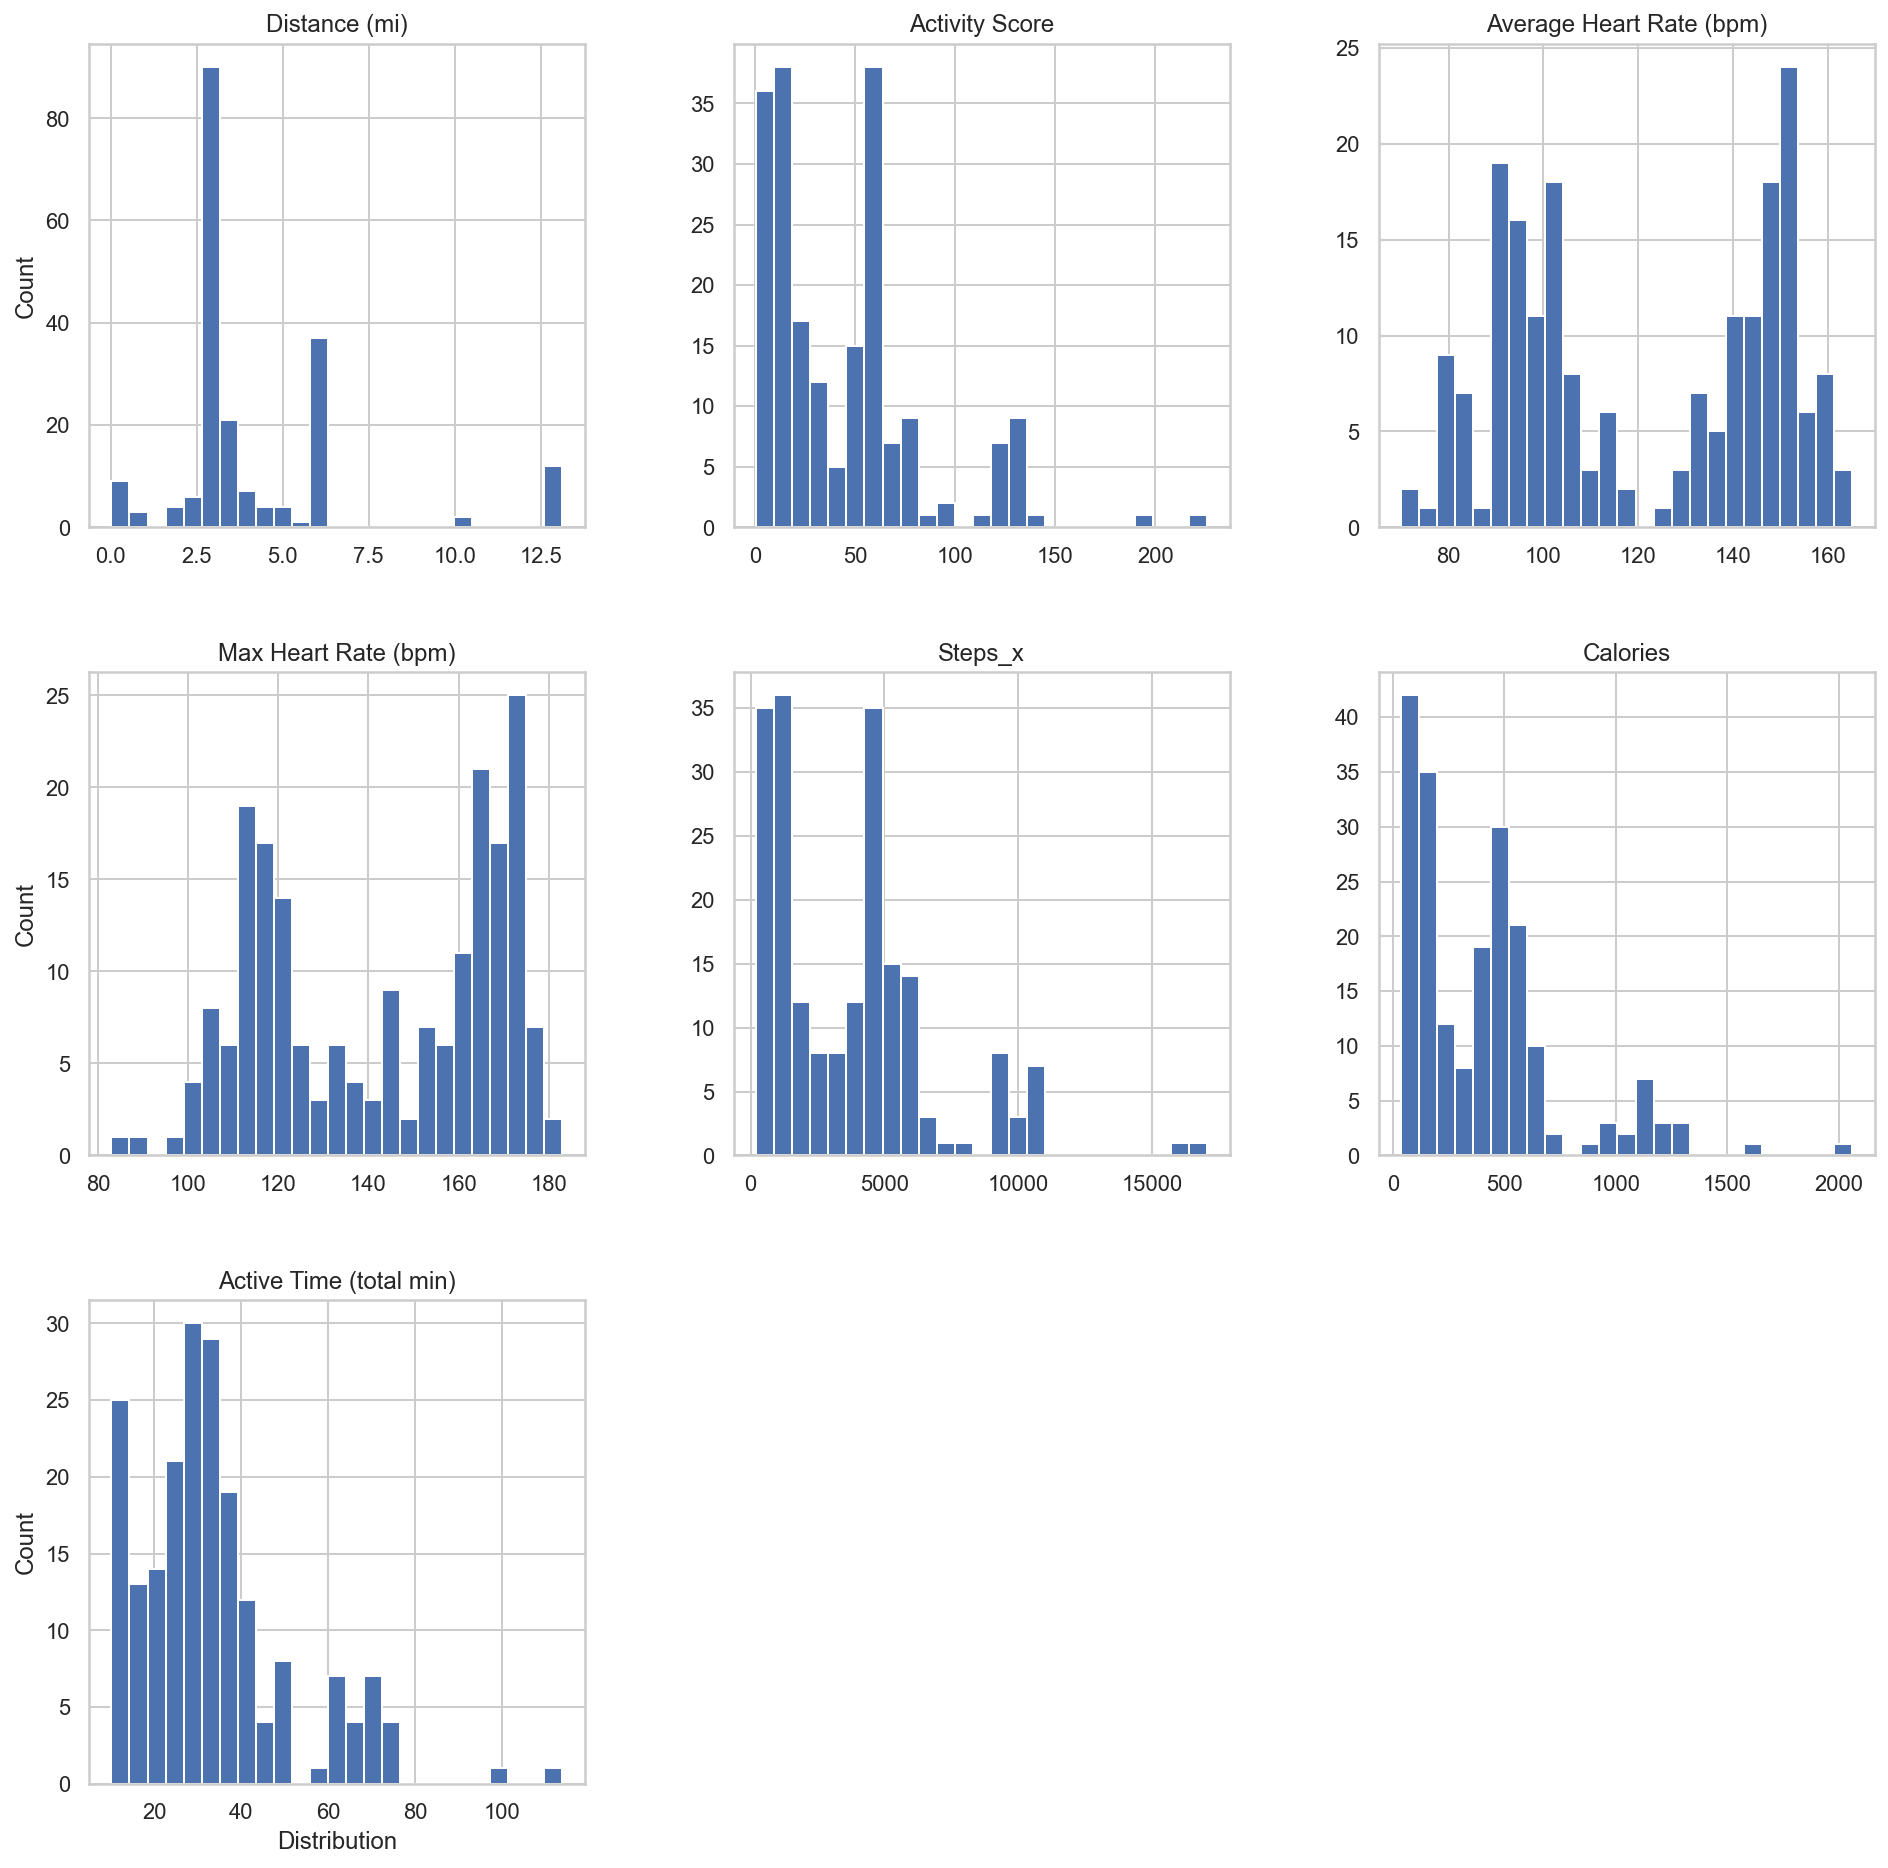

In [394]:
axList = df2.hist(bins=25)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Distribution')
        
    if ax.is_first_col():
        ax.set_ylabel('Count')

Text(0.5, 1.0, 'Category Histogram')

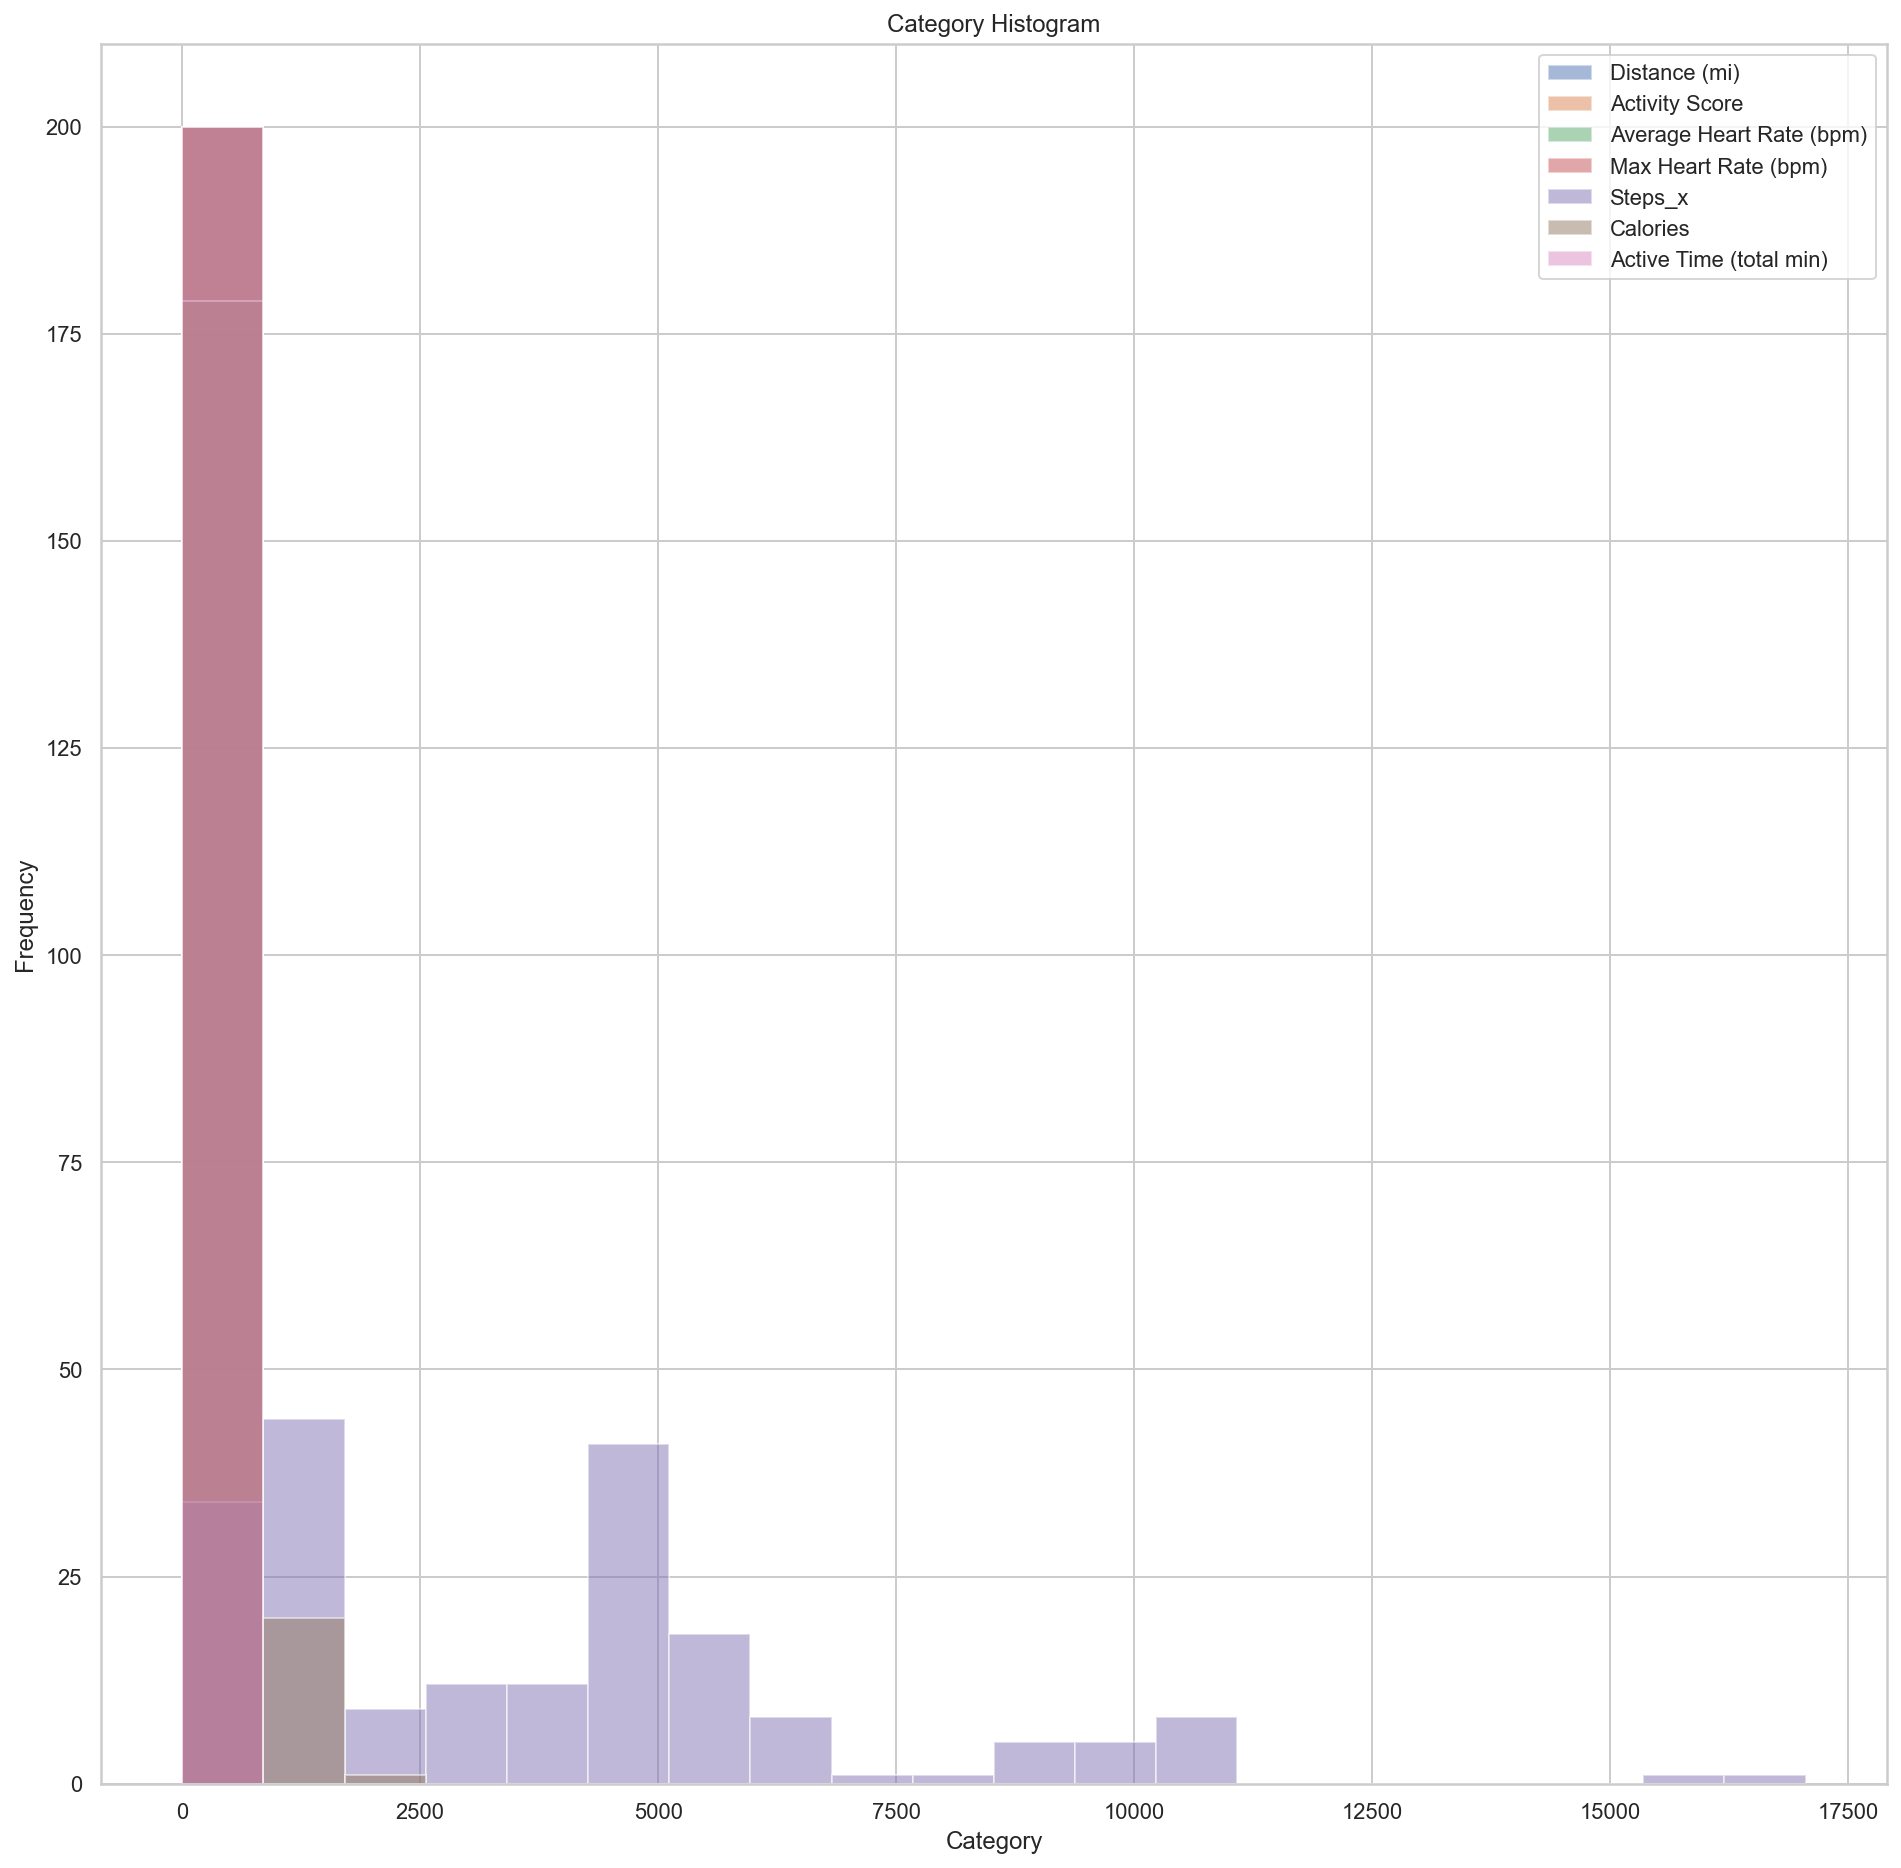

In [395]:
import seaborn as sns
sns.set_context('notebook')
# This uses the `.plot.hist` method
ax = df2.plot.hist(bins=20, alpha=0.5)
ax.set_xlabel('Category');
plt.title('Category Histogram')

Text(0.5, 1.0, 'Avg_Distance by Day')

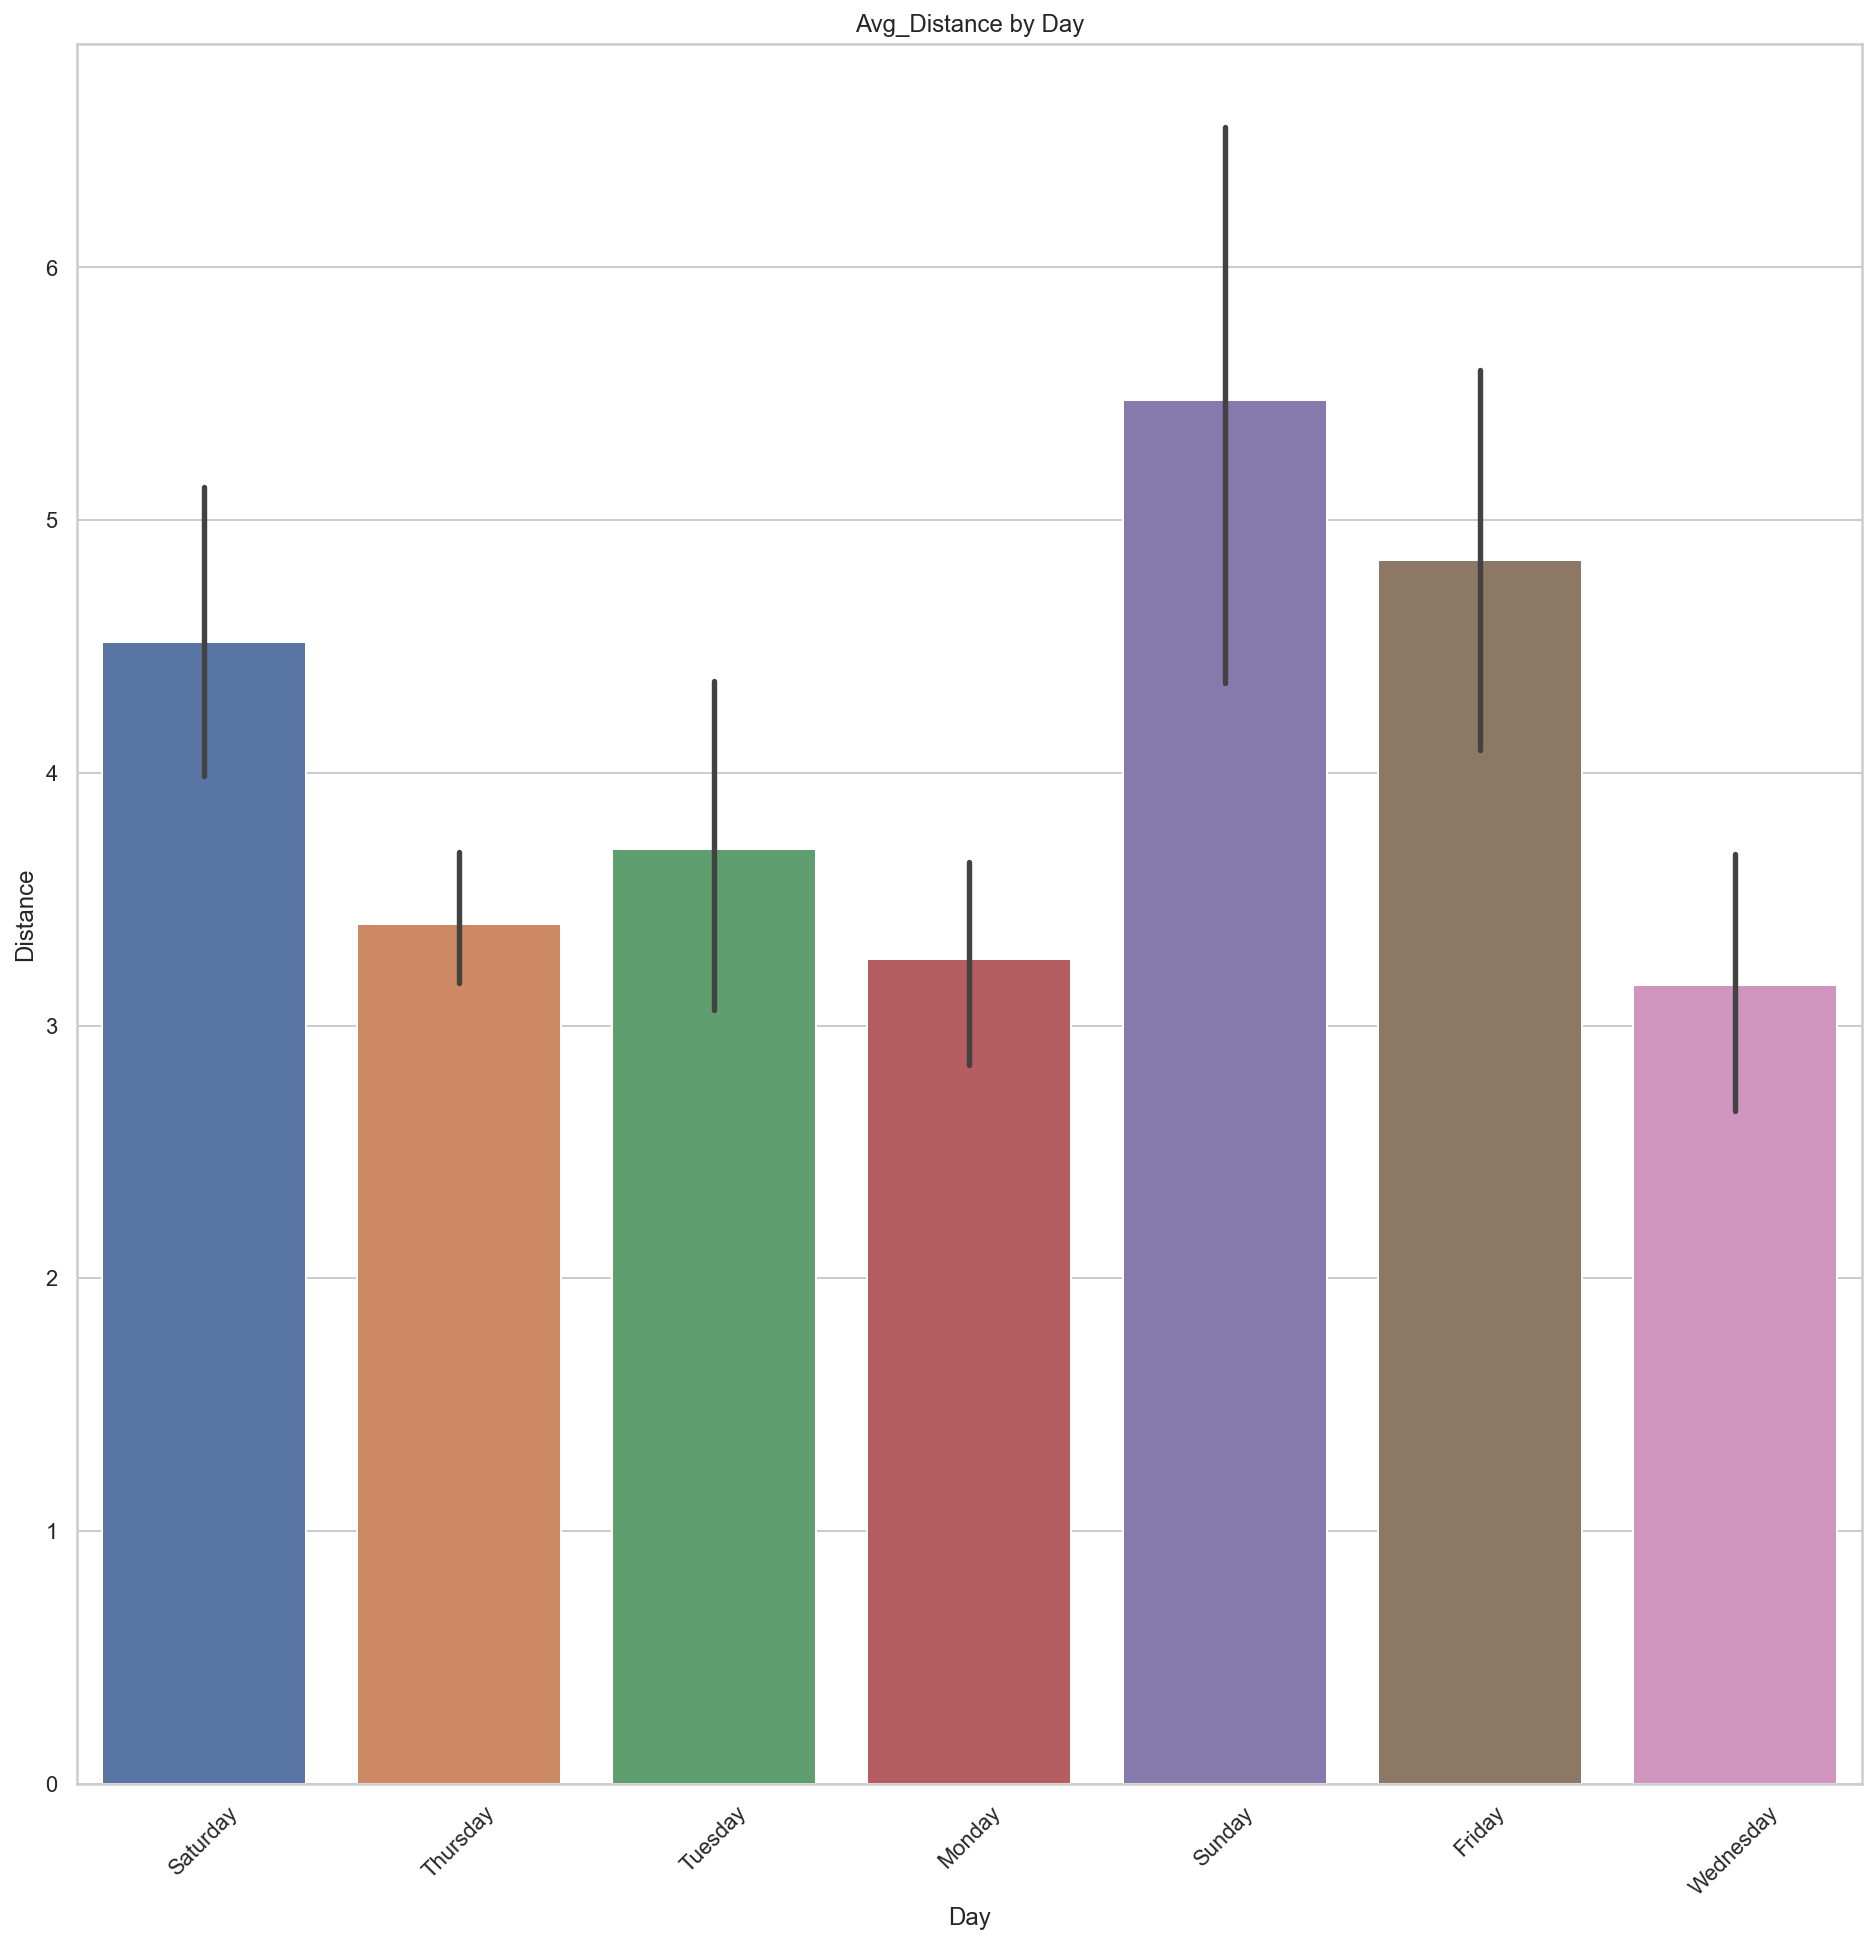

In [397]:
days = sns.barplot(x='day_of_week_start',y='Distance (mi)', data=df2)
plt.ylabel('Distance')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.title('Avg_Distance by Day')

## Train / Test Models

In [ ]:
df4 = df2[['Distance (mi)','Activity Score',
       'Average Heart Rate (bpm)', 'Max Heart Rate (bpm)', 'Steps_x',
       'Calories']]

In [ ]:
mask = df4.dtypes == np.object
categorical_cols = df4.columns[mask]

In [ ]:
import numpy as np
num_ohc_cols = (df4[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))


# No need to encode if there is only one value
small_num_ohc_cols = num_ohc_cols.loc[num_ohc_cols>1]

# Number of one-hot columns is one less than the number of categories
small_num_ohc_cols -= 1

# This is 215 columns, assuming the original ones are dropped. 
# This is quite a few extra columns!
small_num_ohc_cols.sum()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Copy of the data
data_ohc = df4

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [ ]:
data_ohc.shape[1] - df2.shape[1]
df4 = df4

In [ ]:
from sklearn.model_selection import train_test_split

y_col = 'Distance (mi)'

# Split the data that is not one-hot encoded
feature_cols = [x for x in df4.columns if x != y_col]
X_data = df4[feature_cols]
y_data = df4[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)
# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [ ]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()
df4.columns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

error_df.append(pd.Series({'train': mean_squared_error(y_train, y_train_pred),
                           'test' : mean_squared_error(y_test,  y_test_pred)},
                           name='no enc'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'train': mean_squared_error(y_train_ohc, y_train_ohc_pred),
                           'test' : mean_squared_error(y_test_ohc,  y_test_ohc_pred)},
                          name='one-hot enc'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

In [ ]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train, y_train, X_test, y_test),
    'one_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == np.float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label + 'scaling'
        errors[key] = mean_squared_error(_y_test, predictions)

errors = pd.Series(errors)
print(errors.to_string())
print('-' * 80)
for key, error_val in errors.items():
    print(key, error_val)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
# we are going to use y_test, y_test_pred
ax.scatter(y_test, y_test_pred, alpha=.5)

ax.set(xlabel='Distance', 
       ylabel='Predictions',
       title='Predictions vs Distance, using Linear Regression');

# Machine Learning Foundation

## Section 2, Part c: Cross Validation 

In [ ]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
# verify the shape of the array (rows by a single column)
X = df4.drop('Distance (mi)', axis=1)
y = df4['Distance (mi)']

In [ ]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)

In [ ]:
for train_index, test_index in kf.split(X):
    print("Train index:", train_index[:10], len(train_index))
    print("Test index:",test_index[:10], len(test_index))
    print('')

In [ ]:
s = StandardScaler()
lr = LinearRegression()

In [ ]:
estimator = Pipeline([("scaler", s),
                      ("regression", lr)])

In [ ]:
kf

In [ ]:
predictions = cross_val_predict(estimator, X, y, cv=kf)

In [ ]:
r2_score(y, predictions)

In [ ]:
alphas = np.geomspace(1e-9, 1e0, num=10)
alphas

In [ ]:
scores = []
coefs = []
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)

In [ ]:
list(zip(alphas,scores))

In [ ]:
np.mean(scores) # difference of .08

In [ ]:
Lasso(alpha=1e-6).fit(X, y).coef_

In [ ]:
Lasso(alpha=1.0).fit(X, y).coef_

In [ ]:
plt.figure(figsize=(10,6))
plt.semilogx(alphas, scores, '-o')
plt.xlabel('$\\alpha$')
plt.ylabel('$R^2$');

In [ ]:
pf = PolynomialFeatures(degree=3)

scores = []
alphas = np.geomspace(0.06, 6.0, 20)
for alpha in alphas:
    las = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("make_higher_degree", pf),
        ("lasso_regression", las)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    
    score = r2_score(y, predictions)
    
    scores.append(score)
    

In [ ]:
plt.semilogx(alphas, scores);

In [ ]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

In [ ]:
pf = PolynomialFeatures(degree=2)
alphas = np.geomspace(4, 20, 20)
scores=[]
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000)

    estimator = Pipeline([
        ("scaler", s),
        ("polynomial_features", pf),
        ("ridge_regression", ridge)])

    predictions = cross_val_predict(estimator, X, y, cv = kf)
    score = r2_score(y, predictions)
    scores.append(score)

plt.plot(alphas, scores)

In [ ]:
# Once we have found the hyperparameter (alpha~1e-2=0.01)
# make the model and train it on ALL the data
# Then release it into the wild .....
best_estimator = Pipeline([
                    ("scaler", s),
                    ("make_higher_degree", PolynomialFeatures(degree=2)),
                    ("lasso_regression", Lasso(alpha=0.03))])

best_estimator.fit(X, y)
best_estimator.score(X, y)

In [ ]:
df_importances = pd.DataFrame(zip(best_estimator.named_steps["make_higher_degree"].get_feature_names(),
                 best_estimator.named_steps["lasso_regression"].coef_,
))

In [ ]:
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))

In [ ]:
col_names_dict

In [ ]:
df_importances.sort_values(by=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [ ]:
grid.fit(X, y)

In [ ]:
grid.best_score_, grid.best_params_

In [ ]:
y_predict = grid.predict(X)

In [ ]:
# This includes both in-sample and out-of-sample
r2_score(y, y_predict)

In [ ]:
# Notice that "grid" is a fit object!
# We can use grid.predict(X_test) to get brand new predictions!
grid.best_estimator_.named_steps['ridge_regression'].coef_

In [ ]:
grid.cv_results_

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = df4[['Distance (mi)']]
Y_data = df4['Steps_x']

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
plt.plot(X_data, Y_data, marker='o', ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');


In [ ]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

# The ridge regression model
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [ ]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

In [ ]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25
            )

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

In [ ]:
from sklearn.metrics import mean_squared_error


def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [ ]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

In [ ]:
from sklearn.linear_model import LinearRegression

linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

In [ ]:
from sklearn.linear_model import RidgeCV

alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

In [ ]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=5e4,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

In [ ]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

In [ ]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

In [ ]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Distance', 
       ylabel='Predicted Distance', 
       title='Linear Regression Results');

In [ ]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

In [ ]:
# Import SGDRegressor and prepare the parameters

from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': 'none'},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(eta0=1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

In [ ]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = df4.columns[:-1]
corr_values = df4[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [ ]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df4['Distance (mi)'] = le.fit_transform(df4['Distance (mi)'])
df4['Distance (mi)'].sample(5)
### END SOLUTION

In [ ]:
### BEGIN SOLUTION
# Calculate the correlation values
feature_cols = df4.columns[:-1]
corr_values = df4[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [ ]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [ ]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')
### END SOLUTION